In [13]:
import pandas as pd
import re

In [14]:
# @title Test Data


data = """

    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 58.3727
    Execution time: 0.00416 ms.
    Path Size: 3
    Graph size: 2255
    Euclidien Distance: 117.902
    Execution time: 0.003122 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 95.7877
    Execution time: 0.000693 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 250.548
    Execution time: 0.002916 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 19.3642
    Execution time: 0.000376 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 30.0657
    Execution time: 0.00058 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 30.0019
    Execution time: 0.001685 ms.
    Path Size: 3
    Graph size: 2255
    Euclidien Distance: 477.462
    Execution time: 0.003189 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 21.0818
    Execution time: 0.000664 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 27.105
    Execution time: 0.000646 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 22.5177
    Execution time: 0.000555 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 135.794
    Execution time: 0.003254 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 69.955
    Execution time: 0.00107 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 43.7959
    Execution time: 0.002043 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 72.5494
    Execution time: 0.00051 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 39.1107
    Execution time: 0.000566 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 16.4066
    Execution time: 0.00171 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 186.228
    Execution time: 0.000873 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 60.8544
    Execution time: 0.000964 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 29.7469
    Execution time: 0.001466 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 114.354
    Execution time: 0.000803 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 75.3716
    Execution time: 0.003581 ms.
    Path Size: 3
    Graph size: 2255
    Euclidien Distance: 324.831
    Execution time: 0.01941 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 38.8995
    Execution time: 0.001288 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 12.1377
    Execution time: 0.00054 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 87.0148
    Execution time: 0.001449 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 83.9274
    Execution time: 0.001565 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 6.84011
    Execution time: 0.000385 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 37.0121
    Execution time: 0.001443 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 24.3806
    Execution time: 0.00213 ms.
    Success: 1 tests passed.
    Test time: 0.00 seconds.

    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 58.3727
    Execution time: 0.004926 ms.
    Path Size: 3
    Graph size: 2255
    Euclidien Distance: 117.902
    Execution time: 0.003358 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 95.7877
    Execution time: 0.00073 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 250.548
    Execution time: 0.003186 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 19.3642
    Execution time: 0.000569 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 30.0657
    Execution time: 0.000662 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 30.0019
    Execution time: 0.00186 ms.
    Path Size: 3
    Graph size: 2255
    Euclidien Distance: 477.462
    Execution time: 0.003997 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 21.0818
    Execution time: 0.000785 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 27.105
    Execution time: 0.000835 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 22.5177
    Execution time: 0.00058 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 135.794
    Execution time: 0.003503 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 69.955
    Execution time: 0.00136 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 43.7959
    Execution time: 0.002204 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 72.5494
    Execution time: 0.000742 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 39.1107
    Execution time: 0.000683 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 16.4066
    Execution time: 0.001927 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 186.228
    Execution time: 0.001051 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 60.8544
    Execution time: 0.00111 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 29.7469
    Execution time: 0.00158 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 114.354
    Execution time: 0.000607 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 75.3716
    Execution time: 0.003859 ms.
    Path Size: 3
    Graph size: 2255
    Euclidien Distance: 324.831
    Execution time: 0.022359 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 38.8995
    Execution time: 0.001495 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 12.1377
    Execution time: 0.000711 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 87.0148
    Execution time: 0.001638 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 83.9274
    Execution time: 0.001739 ms.
    Path Size: 1
    Graph size: 2255
    Euclidien Distance: 6.84011
    Execution time: 0.000542 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 37.0121
    Execution time: 0.001433 ms.
    Path Size: 2
    Graph size: 2255
    Euclidien Distance: 24.3806
    Execution time: 0.002385 ms.
    Success: 1 tests passed.
    Test time: 0.00 seconds.

    Path Size: 47
    Graph size: 2255
    Euclidien Distance: 2779.44
    Execution time: 0.350231 ms.
    Path Size: 77
    Graph size: 2255
    Euclidien Distance: 3671.63
    Execution time: 0.550444 ms.
    Path Size: 94
    Graph size: 2255
    Euclidien Distance: 4750.34
    Execution time: 0.376331 ms.
    Path Size: 33
    Graph size: 2255
    Euclidien Distance: 2027.6
    Execution time: 0.159894 ms.
    Path Size: 26
    Graph size: 2255
    Euclidien Distance: 909.606
    Execution time: 0.075421 ms.
    Path Size: 42
    Graph size: 2255
    Euclidien Distance: 2146.49
    Execution time: 0.201119 ms.
    Path Size: 37
    Graph size: 2255
    Euclidien Distance: 2013.86
    Execution time: 0.139525 ms.
    Path Size: 38
    Graph size: 2255
    Euclidien Distance: 1354.23
    Execution time: 0.044549 ms.
    Path Size: 63
    Graph size: 2255
    Euclidien Distance: 2816.61
    Execution time: 0.366855 ms.
    Path Size: 45
    Graph size: 2255
    Euclidien Distance: 2576.1
    Execution time: 0.105709 ms.
    Path Size: 89
    Graph size: 2255
    Euclidien Distance: 2548.03
    Execution time: 0.357007 ms.
    Path Size: 179
    Graph size: 2255
    Euclidien Distance: 5414.25
    Execution time: 0.372294 ms.
    Path Size: 18
    Graph size: 2255
    Euclidien Distance: 744.052
    Execution time: 0.058839 ms.
    Path Size: 80
    Graph size: 2255
    Euclidien Distance: 6943.46
    Execution time: 0.426718 ms.
    Path Size: 37
    Graph size: 2255
    Euclidien Distance: 982.182
    Execution time: 0.099741 ms.
    Path Size: 74
    Graph size: 2255
    Euclidien Distance: 3695.5
    Execution time: 0.324722 ms.
    Path Size: 100
    Graph size: 2255
    Euclidien Distance: 4029.86
    Execution time: 0.452042 ms.
    Path Size: 61
    Graph size: 2255
    Euclidien Distance: 1995.41
    Execution time: 0.353961 ms.
    Path Size: 48
    Graph size: 2255
    Euclidien Distance: 1886.57
    Execution time: 0.165607 ms.
    Path Size: 52
    Graph size: 2255
    Euclidien Distance: 3438.64
    Execution time: 0.590489 ms.
    Path Size: 39
    Graph size: 2255
    Euclidien Distance: 2049.62
    Execution time: 0.101639 ms.
    Path Size: 13
    Graph size: 2255
    Euclidien Distance: 465.612
    Execution time: 0.011238 ms.
    Path Size: 80
    Graph size: 2255
    Euclidien Distance: 2722.42
    Execution time: 0.126055 ms.
    Path Size: 92
    Graph size: 2255
    Euclidien Distance: 3870.89
    Execution time: 0.209323 ms.
    Path Size: 50
    Graph size: 2255
    Euclidien Distance: 3267.81
    Execution time: 0.418599 ms.
    Path Size: 59
    Graph size: 2255
    Euclidien Distance: 2928.15
    Execution time: 0.492699 ms.
    Path Size: 62
    Graph size: 2255
    Euclidien Distance: 3420.73
    Execution time: 0.096329 ms.
    Path Size: 80
    Graph size: 2255
    Euclidien Distance: 4752.15
    Execution time: 0.371571 ms.
    Path Size: 24
    Graph size: 2255
    Euclidien Distance: 703.704
    Execution time: 0.1712 ms.
    Path Size: 49
    Graph size: 2255
    Euclidien Distance: 3328.86
    Execution time: 0.438866 ms.
    Success: 1 tests passed.
    Test time: 0.01 seconds.

    Path Size: 47
    Graph size: 2255
    Euclidien Distance: 2779.44
    Execution time: 0.320119 ms.
    Path Size: 77
    Graph size: 2255
    Euclidien Distance: 3671.63
    Execution time: 0.503186 ms.
    Path Size: 94
    Graph size: 2255
    Euclidien Distance: 4750.34
    Execution time: 0.371359 ms.
    Path Size: 33
    Graph size: 2255
    Euclidien Distance: 2027.6
    Execution time: 0.14407 ms.
    Path Size: 26
    Graph size: 2255
    Euclidien Distance: 909.606
    Execution time: 0.073865 ms.
    Path Size: 42
    Graph size: 2255
    Euclidien Distance: 2146.49
    Execution time: 0.196849 ms.
    Path Size: 37
    Graph size: 2255
    Euclidien Distance: 2013.86
    Execution time: 0.139519 ms.
    Path Size: 38
    Graph size: 2255
    Euclidien Distance: 1354.23
    Execution time: 0.042572 ms.
    Path Size: 63
    Graph size: 2255
    Euclidien Distance: 2816.61
    Execution time: 0.329322 ms.
    Path Size: 45
    Graph size: 2255
    Euclidien Distance: 2576.1
    Execution time: 0.101 ms.
    Path Size: 89
    Graph size: 2255
    Euclidien Distance: 2548.03
    Execution time: 0.3397 ms.
    Path Size: 179
    Graph size: 2255
    Euclidien Distance: 5414.25
    Execution time: 0.298015 ms.
    Path Size: 18
    Graph size: 2255
    Euclidien Distance: 744.052
    Execution time: 0.054253 ms.
    Path Size: 80
    Graph size: 2255
    Euclidien Distance: 6943.46
    Execution time: 0.477726 ms.
    Path Size: 37
    Graph size: 2255
    Euclidien Distance: 982.182
    Execution time: 0.066233 ms.
    Path Size: 74
    Graph size: 2255
    Euclidien Distance: 3695.5
    Execution time: 0.288767 ms.
    Path Size: 100
    Graph size: 2255
    Euclidien Distance: 4029.86
    Execution time: 0.483768 ms.
    Path Size: 61
    Graph size: 2255
    Euclidien Distance: 1995.41
    Execution time: 0.401255 ms.
    Path Size: 48
    Graph size: 2255
    Euclidien Distance: 1886.57
    Execution time: 0.148494 ms.
    Path Size: 52
    Graph size: 2255
    Euclidien Distance: 3438.64
    Execution time: 0.498146 ms.
    Path Size: 39
    Graph size: 2255
    Euclidien Distance: 2049.62
    Execution time: 0.098086 ms.
    Path Size: 13
    Graph size: 2255
    Euclidien Distance: 465.612
    Execution time: 0.010905 ms.
    Path Size: 80
    Graph size: 2255
    Euclidien Distance: 2722.42
    Execution time: 0.129615 ms.
    Path Size: 92
    Graph size: 2255
    Euclidien Distance: 3870.89
    Execution time: 0.237135 ms.
    Path Size: 50
    Graph size: 2255
    Euclidien Distance: 3267.81
    Execution time: 0.382409 ms.
    Path Size: 59
    Graph size: 2255
    Euclidien Distance: 2928.15
    Execution time: 0.464663 ms.
    Path Size: 62
    Graph size: 2255
    Euclidien Distance: 3420.73
    Execution time: 0.090028 ms.
    Path Size: 80
    Graph size: 2255
    Euclidien Distance: 4752.15
    Execution time: 0.351828 ms.
    Path Size: 24
    Graph size: 2255
    Euclidien Distance: 703.704
    Execution time: 0.136187 ms.
    Path Size: 49
    Graph size: 2255
    Euclidien Distance: 3328.86
    Execution time: 0.379348 ms.
    Success: 1 tests passed.
    Test time: 0.01 seconds.

    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 66.5698
    Execution time: 0.004873 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 44.8736
    Execution time: 0.003154 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 23.0585
    Execution time: 0.001039 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 85.689
    Execution time: 0.005171 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 83.6523
    Execution time: 0.000831 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 70.3561
    Execution time: 0.001817 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 82.0253
    Execution time: 0.002793 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 109.998
    Execution time: 0.006223 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 83.4739
    Execution time: 0.001099 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 102.652
    Execution time: 0.000984 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 19.3868
    Execution time: 0.002354 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 71.7623
    Execution time: 0.001122 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 110.789
    Execution time: 0.001307 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 15.0457
    Execution time: 0.001782 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 240.223
    Execution time: 0.002265 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 42.029
    Execution time: 0.001222 ms.
    Path Size: 3
    Graph size: 194378
    Euclidien Distance: 333.262
    Execution time: 0.002929 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 18.325
    Execution time: 0.001685 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 57.4636
    Execution time: 0.00387 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 42.1505
    Execution time: 0.003644 ms.
    Path Size: 3
    Graph size: 194378
    Euclidien Distance: 129.637
    Execution time: 0.013575 ms.
    Path Size: 3
    Graph size: 194378
    Euclidien Distance: 58.8017
    Execution time: 0.003666 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 19.9003
    Execution time: 0.000852 ms.
    Path Size: 3
    Graph size: 194378
    Euclidien Distance: 148.625
    Execution time: 0.004908 ms.
    Path Size: 3
    Graph size: 194378
    Euclidien Distance: 90.5202
    Execution time: 0.007146 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 26.6595
    Execution time: 0.001524 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 108.248
    Execution time: 0.001928 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 89.4674
    Execution time: 0.001053 ms.
    Path Size: 3
    Graph size: 194378
    Euclidien Distance: 31.7777
    Execution time: 0.002992 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 15.3435
    Execution time: 0.000869 ms.
    Success: 1 tests passed.
    Test time: 0.00 seconds.

    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 66.5698
    Execution time: 0.005256 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 44.8736
    Execution time: 0.003185 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 23.0585
    Execution time: 0.00119 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 85.689
    Execution time: 0.005376 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 83.6523
    Execution time: 0.000727 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 70.3561
    Execution time: 0.002096 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 82.0253
    Execution time: 0.002378 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 109.998
    Execution time: 0.006529 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 83.4739
    Execution time: 0.000962 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 102.652
    Execution time: 0.000833 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 19.3868
    Execution time: 0.002461 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 71.7623
    Execution time: 0.001011 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 110.789
    Execution time: 0.000905 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 15.0457
    Execution time: 0.001441 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 240.223
    Execution time: 0.002317 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 42.029
    Execution time: 0.001343 ms.
    Path Size: 3
    Graph size: 194378
    Euclidien Distance: 333.262
    Execution time: 0.003303 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 18.325
    Execution time: 0.001597 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 57.4636
    Execution time: 0.003685 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 42.1505
    Execution time: 0.003663 ms.
    Path Size: 3
    Graph size: 194378
    Euclidien Distance: 129.637
    Execution time: 0.012974 ms.
    Path Size: 3
    Graph size: 194378
    Euclidien Distance: 58.8017
    Execution time: 0.003564 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 19.9003
    Execution time: 0.000917 ms.
    Path Size: 3
    Graph size: 194378
    Euclidien Distance: 148.625
    Execution time: 0.0057 ms.
    Path Size: 3
    Graph size: 194378
    Euclidien Distance: 90.5202
    Execution time: 0.007297 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 26.6595
    Execution time: 0.001424 ms.
    Path Size: 2
    Graph size: 194378
    Euclidien Distance: 108.248
    Execution time: 0.001794 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 89.4674
    Execution time: 0.000932 ms.
    Path Size: 3
    Graph size: 194378
    Euclidien Distance: 31.7777
    Execution time: 0.002851 ms.
    Path Size: 1
    Graph size: 194378
    Euclidien Distance: 15.3435
    Execution time: 0.000932 ms.
    Success: 1 tests passed.
    Test time: 0.00 seconds.

    Path Size: 228
    Graph size: 194378
    Euclidien Distance: 25850.8
    Execution time: 19.0773 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 40441.7
    Execution time: 33.3434 ms.
    Path Size: 135
    Graph size: 194378
    Euclidien Distance: 14130.2
    Execution time: 13.1853 ms.
    Path Size: 184
    Graph size: 194378
    Euclidien Distance: 10156
    Execution time: 12.2213 ms.
    Path Size: 155
    Graph size: 194378
    Euclidien Distance: 16491.3
    Execution time: 15.7674 ms.
    Path Size: 178
    Graph size: 194378
    Euclidien Distance: 30001
    Execution time: 39.1847 ms.
    Path Size: 137
    Graph size: 194378
    Euclidien Distance: 20244.5
    Execution time: 18.715 ms.
    Path Size: 191
    Graph size: 194378
    Euclidien Distance: 33854.6
    Execution time: 75.7149 ms.
    Path Size: 216
    Graph size: 194378
    Euclidien Distance: 44770.7
    Execution time: 104.572 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 24085.6
    Execution time: 17.93 ms.
    Path Size: 174
    Graph size: 194378
    Euclidien Distance: 15811.3
    Execution time: 20.3575 ms.
    Path Size: 163
    Graph size: 194378
    Euclidien Distance: 15034.5
    Execution time: 12.5975 ms.
    Path Size: 169
    Graph size: 194378
    Euclidien Distance: 48414.5
    Execution time: 76.0091 ms.
    Path Size: 209
    Graph size: 194378
    Euclidien Distance: 35055.4
    Execution time: 36.273 ms.
    Path Size: 145
    Graph size: 194378
    Euclidien Distance: 34274.3
    Execution time: 44.9806 ms.
    Path Size: 157
    Graph size: 194378
    Euclidien Distance: 8509.67
    Execution time: 3.23881 ms.
    Path Size: 200
    Graph size: 194378
    Euclidien Distance: 28927.2
    Execution time: 51.828 ms.
    Path Size: 175
    Graph size: 194378
    Euclidien Distance: 38415.8
    Execution time: 48.5306 ms.
    Path Size: 314
    Graph size: 194378
    Euclidien Distance: 21740.7
    Execution time: 37.7365 ms.
    Path Size: 169
    Graph size: 194378
    Euclidien Distance: 8834.52
    Execution time: 7.48606 ms.
    Path Size: 199
    Graph size: 194378
    Euclidien Distance: 49206.9
    Execution time: 62.2482 ms.
    Path Size: 181
    Graph size: 194378
    Euclidien Distance: 8744.48
    Execution time: 6.67079 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 18132.8
    Execution time: 31.3296 ms.
    Path Size: 131
    Graph size: 194378
    Euclidien Distance: 15617.6
    Execution time: 6.15354 ms.
    Path Size: 160
    Graph size: 194378
    Euclidien Distance: 19470.5
    Execution time: 38.5526 ms.
    Path Size: 230
    Graph size: 194378
    Euclidien Distance: 23708.8
    Execution time: 25.4966 ms.
    Path Size: 110
    Graph size: 194378
    Euclidien Distance: 14111.2
    Execution time: 9.41348 ms.
    Path Size: 118
    Graph size: 194378
    Euclidien Distance: 5445.1
    Execution time: 5.87352 ms.
    Path Size: 187
    Graph size: 194378
    Euclidien Distance: 30478.9
    Execution time: 62.8411 ms.
    Path Size: 179
    Graph size: 194378
    Euclidien Distance: 9746.15
    Execution time: 6.97284 ms.
    Success: 1 tests passed.
    Test time: 1.01 seconds.


    Path Size: 228
    Graph size: 194378
    Euclidien Distance: 25850.8
    Execution time: 19.2124 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 40441.7
    Execution time: 33.5371 ms.
    Path Size: 135
    Graph size: 194378
    Euclidien Distance: 14130.2
    Execution time: 13.4016 ms.
    Path Size: 184
    Graph size: 194378
    Euclidien Distance: 10156
    Execution time: 12.1093 ms.
    Path Size: 155
    Graph size: 194378
    Euclidien Distance: 16491.3
    Execution time: 15.3118 ms.
    Path Size: 178
    Graph size: 194378
    Euclidien Distance: 30001
    Execution time: 39.6009 ms.
    Path Size: 137
    Graph size: 194378
    Euclidien Distance: 20244.5
    Execution time: 16.7533 ms.
    Path Size: 191
    Graph size: 194378
    Euclidien Distance: 33854.6
    Execution time: 74.8718 ms.
    Path Size: 216
    Graph size: 194378
    Euclidien Distance: 44770.7
    Execution time: 104.988 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 24085.6
    Execution time: 18.1072 ms.
    Path Size: 174
    Graph size: 194378
    Euclidien Distance: 15811.3
    Execution time: 21.3627 ms.
    Path Size: 163
    Graph size: 194378
    Euclidien Distance: 15034.5
    Execution time: 13.0919 ms.
    Path Size: 169
    Graph size: 194378
    Euclidien Distance: 48414.5
    Execution time: 77.564 ms.
    Path Size: 209
    Graph size: 194378
    Euclidien Distance: 35055.4
    Execution time: 36.6943 ms.
    Path Size: 145
    Graph size: 194378
    Euclidien Distance: 34274.3
    Execution time: 46.8778 ms.
    Path Size: 157
    Graph size: 194378
    Euclidien Distance: 8509.67
    Execution time: 3.35045 ms.
    Path Size: 200
    Graph size: 194378
    Euclidien Distance: 28927.2
    Execution time: 52.3968 ms.
    Path Size: 175
    Graph size: 194378
    Euclidien Distance: 38415.8
    Execution time: 49.1637 ms.
    Path Size: 314
    Graph size: 194378
    Euclidien Distance: 21740.7
    Execution time: 34.8497 ms.
    Path Size: 169
    Graph size: 194378
    Euclidien Distance: 8834.52
    Execution time: 7.45155 ms.
    Path Size: 199
    Graph size: 194378
    Euclidien Distance: 49206.9
    Execution time: 59.426 ms.
    Path Size: 181
    Graph size: 194378
    Euclidien Distance: 8744.48
    Execution time: 6.78413 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 18132.8
    Execution time: 31.1015 ms.
    Path Size: 131
    Graph size: 194378
    Euclidien Distance: 15617.6
    Execution time: 6.20616 ms.
    Path Size: 160
    Graph size: 194378
    Euclidien Distance: 19470.5
    Execution time: 38.4 ms.
    Path Size: 230
    Graph size: 194378
    Euclidien Distance: 23708.8
    Execution time: 25.4146 ms.
    Path Size: 110
    Graph size: 194378
    Euclidien Distance: 14111.2
    Execution time: 9.30685 ms.
    Path Size: 118
    Graph size: 194378
    Euclidien Distance: 5445.1
    Execution time: 5.91502 ms.
    Path Size: 187
    Graph size: 194378
    Euclidien Distance: 30478.9
    Execution time: 63.2158 ms.
    Path Size: 179
    Graph size: 194378
    Euclidien Distance: 9746.15
    Execution time: 7.11675 ms.
    Success: 1 tests passed.
    Test time: 1.02 seconds.

    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 3.37514
    Execution time: 0.00575 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 172.703
    Execution time: 0.004368 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 51.4558
    Execution time: 0.001885 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 14.9028
    Execution time: 0.001014 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 52.0654
    Execution time: 0.002135 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 29.5699
    Execution time: 0.002367 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 7.64947
    Execution time: 0.001127 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 89.1817
    Execution time: 0.000975 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 51.3914
    Execution time: 0.001721 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 138.838
    Execution time: 0.003648 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 25.6866
    Execution time: 0.001013 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 159.576
    Execution time: 0.001136 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 62.2116
    Execution time: 0.00236 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 77.195
    Execution time: 0.002314 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 19.1833
    Execution time: 0.000829 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 102.554
    Execution time: 0.005709 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 17.3856
    Execution time: 0.001628 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 46.2059
    Execution time: 0.002338 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 28.3231
    Execution time: 0.000687 ms.
    Path Size: 3
    Graph size: 352181
    Euclidien Distance: 256.03
    Execution time: 0.002584 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 26.4762
    Execution time: 0.00134 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 154.505
    Execution time: 0.00304 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 54.7807
    Execution time: 0.00085 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 51.4074
    Execution time: 0.003002 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 67.8569
    Execution time: 0.001403 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 534.464
    Execution time: 0.022541 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 44.8637
    Execution time: 0.002701 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 3.40249
    Execution time: 0.001676 ms.
    Path Size: 3
    Graph size: 352181
    Euclidien Distance: 311.007
    Execution time: 0.013938 ms.
    Path Size: 3
    Graph size: 352181
    Euclidien Distance: 32.8408
    Execution time: 0.002251 ms.
    Success: 1 tests passed.

    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 3.37514
    Execution time: 0.006027 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 172.703
    Execution time: 0.003788 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 51.4558
    Execution time: 0.001903 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 14.9028
    Execution time: 0.000898 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 52.0654
    Execution time: 0.00166 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 29.5699
    Execution time: 0.002318 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 7.64947
    Execution time: 0.001028 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 89.1817
    Execution time: 0.000984 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 51.3914
    Execution time: 0.001944 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 138.838
    Execution time: 0.003222 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 25.6866
    Execution time: 0.000934 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 159.576
    Execution time: 0.001075 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 62.2116
    Execution time: 0.002131 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 77.195
    Execution time: 0.002395 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 19.1833
    Execution time: 0.000731 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 102.554
    Execution time: 0.006362 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 17.3856
    Execution time: 0.001665 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 46.2059
    Execution time: 0.00232 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 28.3231
    Execution time: 0.000802 ms.
    Path Size: 3
    Graph size: 352181
    Euclidien Distance: 256.03
    Execution time: 0.002912 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 26.4762
    Execution time: 0.001403 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 154.505
    Execution time: 0.002934 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 54.7807
    Execution time: 0.000821 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 51.4074
    Execution time: 0.002645 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 67.8569
    Execution time: 0.001346 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 534.464
    Execution time: 0.02314 ms.
    Path Size: 2
    Graph size: 352181
    Euclidien Distance: 44.8637
    Execution time: 0.002365 ms.
    Path Size: 1
    Graph size: 352181
    Euclidien Distance: 3.40249
    Execution time: 0.001833 ms.
    Path Size: 3
    Graph size: 352181
    Euclidien Distance: 311.007
    Execution time: 0.023933 ms.
    Path Size: 3
    Graph size: 352181
    Euclidien Distance: 32.8408
    Execution time: 0.002497 ms.
    Success: 1 tests passed.
    Test time: 0.00 seconds.

    Path Size: 287
    Graph size: 352181
    Euclidien Distance: 13250.8
    Execution time: 36.9847 ms.
    Path Size: 800
    Graph size: 352181
    Euclidien Distance: 20829.4
    Execution time: 72.6421 ms.
    Path Size: 733
    Graph size: 352181
    Euclidien Distance: 34859.7
    Execution time: 198.945 ms.
    Path Size: 339
    Graph size: 352181
    Euclidien Distance: 32383.8
    Execution time: 30.6209 ms.
    Path Size: 511
    Graph size: 352181
    Euclidien Distance: 31192.4
    Execution time: 113.359 ms.
    Path Size: 775
    Graph size: 352181
    Euclidien Distance: 30200.8
    Execution time: 186.139 ms.
    Path Size: 524
    Graph size: 352181
    Euclidien Distance: 32833.1
    Execution time: 103.423 ms.
    Path Size: 337
    Graph size: 352181
    Euclidien Distance: 20707
    Execution time: 85.6178 ms.
    Path Size: 327
    Graph size: 352181
    Euclidien Distance: 14675.6
    Execution time: 38.3136 ms.
    Path Size: 330
    Graph size: 352181
    Euclidien Distance: 30032
    Execution time: 39.0719 ms.
    Path Size: 357
    Graph size: 352181
    Euclidien Distance: 32923.4
    Execution time: 138.593 ms.
    Path Size: 505
    Graph size: 352181
    Euclidien Distance: 36069.4
    Execution time: 147.78 ms.
    Path Size: 338
    Graph size: 352181
    Euclidien Distance: 21811.7
    Execution time: 41.5207 ms.
    Path Size: 233
    Graph size: 352181
    Euclidien Distance: 40827.8
    Execution time: 77.6542 ms.
    Path Size: 436
    Graph size: 352181
    Euclidien Distance: 23284.7
    Execution time: 48.4047 ms.
    Path Size: 220
    Graph size: 352181
    Euclidien Distance: 23660.1
    Execution time: 44.971 ms.
    Path Size: 327
    Graph size: 352181
    Euclidien Distance: 29567.6
    Execution time: 124.995 ms.
    Path Size: 769
    Graph size: 352181
    Euclidien Distance: 31703.6
    Execution time: 120.96 ms.
    Path Size: 484
    Graph size: 352181
    Euclidien Distance: 18392.7
    Execution time: 68.9757 ms.
    Path Size: 126
    Graph size: 352181
    Euclidien Distance: 4175.49
    Execution time: 5.81501 ms.
    Path Size: 395
    Graph size: 352181
    Euclidien Distance: 16996.2
    Execution time: 67.5116 ms.
    Path Size: 308
    Graph size: 352181
    Euclidien Distance: 34887.2
    Execution time: 23.966 ms.
    Path Size: 603
    Graph size: 352181
    Euclidien Distance: 17743.3
    Execution time: 46.6342 ms.
    Path Size: 836
    Graph size: 352181
    Euclidien Distance: 29618.7
    Execution time: 108.691 ms.
    Path Size: 59
    Graph size: 352181
    Euclidien Distance: 6185.37
    Execution time: 2.9587 ms.
    Path Size: 751
    Graph size: 352181
    Euclidien Distance: 50883.5
    Execution time: 171.626 ms.
    Path Size: 370
    Graph size: 352181
    Euclidien Distance: 24959.8
    Execution time: 38.7816 ms.
    Path Size: 242
    Graph size: 352181
    Euclidien Distance: 12562.3
    Execution time: 22.0198 ms.
    Path Size: 384
    Graph size: 352181
    Euclidien Distance: 15563.4
    Execution time: 29.045 ms.
    Path Size: 352
    Graph size: 352181
    Euclidien Distance: 15088.7
    Execution time: 33.3108 ms.
    Success: 1 tests passed.
    Test time: 2.46 seconds.

    Path Size: 287
    Graph size: 352181
    Euclidien Distance: 13250.8
    Execution time: 37.0485 ms.
    Path Size: 800
    Graph size: 352181
    Euclidien Distance: 20829.4
    Execution time: 74.1925 ms.
    Path Size: 733
    Graph size: 352181
    Euclidien Distance: 34859.7
    Execution time: 196.641 ms.
    Path Size: 339
    Graph size: 352181
    Euclidien Distance: 32383.8
    Execution time: 28.0469 ms.
    Path Size: 511
    Graph size: 352181
    Euclidien Distance: 31192.4
    Execution time: 113.61 ms.
    Path Size: 775
    Graph size: 352181
    Euclidien Distance: 30200.8
    Execution time: 185.562 ms.
    Path Size: 524
    Graph size: 352181
    Euclidien Distance: 32833.1
    Execution time: 105.065 ms.
    Path Size: 337
    Graph size: 352181
    Euclidien Distance: 20707
    Execution time: 82.8735 ms.
    Path Size: 327
    Graph size: 352181
    Euclidien Distance: 14675.6
    Execution time: 37.4448 ms.
    Path Size: 330
    Graph size: 352181
    Euclidien Distance: 30032
    Execution time: 37.2344 ms.
    Path Size: 357
    Graph size: 352181
    Euclidien Distance: 32923.4
    Execution time: 137.709 ms.
    Path Size: 505
    Graph size: 352181
    Euclidien Distance: 36069.4
    Execution time: 146.226 ms.
    Path Size: 338
    Graph size: 352181
    Euclidien Distance: 21811.7
    Execution time: 41.4459 ms.
    Path Size: 233
    Graph size: 352181
    Euclidien Distance: 40827.8
    Execution time: 75.5916 ms.
    Path Size: 436
    Graph size: 352181
    Euclidien Distance: 23284.7
    Execution time: 47.806 ms.
    Path Size: 220
    Graph size: 352181
    Euclidien Distance: 23660.1
    Execution time: 45.4261 ms.
    Path Size: 327
    Graph size: 352181
    Euclidien Distance: 29567.6
    Execution time: 119.285 ms.
    Path Size: 769
    Graph size: 352181
    Euclidien Distance: 31703.6
    Execution time: 119.584 ms.
    Path Size: 484
    Graph size: 352181
    Euclidien Distance: 18392.7
    Execution time: 67.6199 ms.
    Path Size: 126
    Graph size: 352181
    Euclidien Distance: 4175.49
    Execution time: 5.68571 ms.
    Path Size: 395
    Graph size: 352181
    Euclidien Distance: 16996.2
    Execution time: 69.6762 ms.
    Path Size: 308
    Graph size: 352181
    Euclidien Distance: 34887.2
    Execution time: 23.8455 ms.
    Path Size: 603
    Graph size: 352181
    Euclidien Distance: 17743.3
    Execution time: 45.944 ms.
    Path Size: 836
    Graph size: 352181
    Euclidien Distance: 29618.7
    Execution time: 108.494 ms.
    Path Size: 59
    Graph size: 352181
    Euclidien Distance: 6185.37
    Execution time: 2.89799 ms.
    Path Size: 751
    Graph size: 352181
    Euclidien Distance: 50883.5
    Execution time: 167.953 ms.
    Path Size: 370
    Graph size: 352181
    Euclidien Distance: 24959.8
    Execution time: 38.6438 ms.
    Path Size: 242
    Graph size: 352181
    Euclidien Distance: 12562.3
    Execution time: 21.5839 ms.
    Path Size: 384
    Graph size: 352181
    Euclidien Distance: 15563.4
    Execution time: 28.8646 ms.
    Path Size: 352
    Graph size: 352181
    Euclidien Distance: 15088.7
    Execution time: 33.1486 ms.
    Success: 1 tests passed.
    Test time: 2.44 seconds.

    Path Size: 35
    Graph size: 480
    Euclidien Distance: 2125.04
    Execution time: 13.4546 ms.
    Path Size: 44
    Graph size: 480
    Euclidien Distance: 4425.34
    Execution time: 4.09335 ms.
    Path Size: 39
    Graph size: 480
    Euclidien Distance: 4496.71
    Execution time: 1.8959 ms.
    Path Size: 22
    Graph size: 480
    Euclidien Distance: 1682.06
    Execution time: 1.91601 ms.
    Path Size: 19
    Graph size: 480
    Euclidien Distance: 1060.39
    Execution time: 1.29328 ms.
    Path Size: 42
    Graph size: 480
    Euclidien Distance: 5090.41
    Execution time: 2.83339 ms.
    Path Size: 60
    Graph size: 480
    Euclidien Distance: 8399.45
    Execution time: 5.17847 ms.
    Path Size: 37
    Graph size: 480
    Euclidien Distance: 5073.96
    Execution time: 1.24523 ms.
    Path Size: 38
    Graph size: 480
    Euclidien Distance: 3994.45
    Execution time: 2.3919 ms.
    Path Size: 40
    Graph size: 480
    Euclidien Distance: 9187.23
    Execution time: 2.45582 ms.
    Success: 1 tests passed.
    Test time: 0.08 seconds.

    Path Size: 139
    Graph size: 194378
    Euclidien Distance: 19558.9
    Execution time: 16.1878 ms.
    Path Size: 247
    Graph size: 194378
    Euclidien Distance: 25606.1
    Execution time: 25.8633 ms.
    Path Size: 242
    Graph size: 194378
    Euclidien Distance: 29040.6
    Execution time: 53.5446 ms.
    Path Size: 260
    Graph size: 194378
    Euclidien Distance: 35110.4
    Execution time: 33.5609 ms.
    Path Size: 84
    Graph size: 194378
    Euclidien Distance: 5327.09
    Execution time: 0.662579 ms.
    Path Size: 182
    Graph size: 194378
    Euclidien Distance: 22864.8
    Execution time: 43.74 ms.
    Path Size: 131
    Graph size: 194378
    Euclidien Distance: 28343
    Execution time: 10.8948 ms.
    Path Size: 174
    Graph size: 194378
    Euclidien Distance: 6532.57
    Execution time: 2.86401 ms.
    Path Size: 157
    Graph size: 194378
    Euclidien Distance: 32141.8
    Execution time: 18.6319 ms.
    Path Size: 185
    Graph size: 194378
    Euclidien Distance: 8814.3
    Execution time: 10.6669 ms.
    Path Size: 183
    Graph size: 194378
    Euclidien Distance: 23935.5
    Execution time: 32.7799 ms.
    Path Size: 137
    Graph size: 194378
    Euclidien Distance: 6481.66
    Execution time: 3.91135 ms.
    Path Size: 241
    Graph size: 194378
    Euclidien Distance: 29401.3
    Execution time: 66.9673 ms.
    Path Size: 187
    Graph size: 194378
    Euclidien Distance: 30901.6
    Execution time: 33.5661 ms.
    Path Size: 124
    Graph size: 194378
    Euclidien Distance: 12480.2
    Execution time: 7.4134 ms.
    Path Size: 214
    Graph size: 194378
    Euclidien Distance: 29300.5
    Execution time: 42.4192 ms.
    Path Size: 56
    Graph size: 194378
    Euclidien Distance: 4588.09
    Execution time: 1.3015 ms.
    Path Size: 95
    Graph size: 194378
    Euclidien Distance: 7130.41
    Execution time: 1.34699 ms.
    Path Size: 154
    Graph size: 194378
    Euclidien Distance: 15031.5
    Execution time: 16.4322 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 17248.3
    Execution time: 35.3614 ms.
    Path Size: 128
    Graph size: 194378
    Euclidien Distance: 15739
    Execution time: 20.4989 ms.
    Path Size: 300
    Graph size: 194378
    Euclidien Distance: 20457.8
    Execution time: 15.4325 ms.
    Path Size: 108
    Graph size: 194378
    Euclidien Distance: 7561.13
    Execution time: 3.28756 ms.
    Path Size: 60
    Graph size: 194378
    Euclidien Distance: 16995.8
    Execution time: 3.69265 ms.
    Path Size: 96
    Graph size: 194378
    Euclidien Distance: 16426.2
    Execution time: 3.76773 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 36657.5
    Execution time: 48.891 ms.
    Path Size: 204
    Graph size: 194378
    Euclidien Distance: 28870.2
    Execution time: 27.5776 ms.
    Path Size: 103
    Graph size: 194378
    Euclidien Distance: 18230
    Execution time: 6.14217 ms.
    Path Size: 99
    Graph size: 194378
    Euclidien Distance: 19028.7
    Execution time: 9.83624 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 14404.6
    Execution time: 17.9656 ms.
    Path Size: 186
    Graph size: 194378
    Euclidien Distance: 14130.2
    Execution time: 19.3972 ms.
    Path Size: 186
    Graph size: 194378
    Euclidien Distance: 15617.6
    Execution time: 6.81757 ms.
    Path Size: 223
    Graph size: 194378
    Euclidien Distance: 25850.8
    Execution time: 20.9474 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 10156
    Execution time: 12.3625 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 48414.5
    Execution time: 88.7781 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 8744.48
    Execution time: 7.99317 ms.
    Path Size: 151
    Graph size: 194378
    Euclidien Distance: 34274.3
    Execution time: 49.6881 ms.
    Path Size: 160
    Graph size: 194378
    Euclidien Distance: 8509.67
    Execution time: 5.02033 ms.
    Path Size: 152
    Graph size: 194378
    Euclidien Distance: 15811.3
    Execution time: 22.1127 ms.
    Path Size: 199
    Graph size: 194378
    Euclidien Distance: 49206.9
    Execution time: 58.835 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 24085.6
    Execution time: 18.6894 ms.
    Path Size: 179
    Graph size: 194378
    Euclidien Distance: 9746.15
    Execution time: 6.79267 ms.
    Path Size: 160
    Graph size: 194378
    Euclidien Distance: 19470.5
    Execution time: 35.0986 ms.
    Path Size: 161
    Graph size: 194378
    Euclidien Distance: 15034.5
    Execution time: 11.5423 ms.
    Path Size: 169
    Graph size: 194378
    Euclidien Distance: 8834.52
    Execution time: 7.4427 ms.
    Path Size: 243
    Graph size: 194378
    Euclidien Distance: 23144.9
    Execution time: 44.6042 ms.
    Path Size: 151
    Graph size: 194378
    Euclidien Distance: 24409.7
    Execution time: 5.90964 ms.
    Path Size: 154
    Graph size: 194378
    Euclidien Distance: 18696.6
    Execution time: 12.2819 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 21875.6
    Execution time: 24.9928 ms.
    Path Size: 312
    Graph size: 194378
    Euclidien Distance: 19895.8
    Execution time: 56.1938 ms.
    Path Size: 27
    Graph size: 194378
    Euclidien Distance: 804.315
    Execution time: 0.234159 ms.
    Path Size: 137
    Graph size: 194378
    Euclidien Distance: 14369.1
    Execution time: 11.8972 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 28761.7
    Execution time: 24.8489 ms.
    Path Size: 116
    Graph size: 194378
    Euclidien Distance: 17538.2
    Execution time: 19.7911 ms.
    Path Size: 274
    Graph size: 194378
    Euclidien Distance: 37764.3
    Execution time: 68.7212 ms.
    Path Size: 185
    Graph size: 194378
    Euclidien Distance: 35204.5
    Execution time: 55.6066 ms.
    Path Size: 300
    Graph size: 194378
    Euclidien Distance: 10362.3
    Execution time: 12.5849 ms.
    Path Size: 170
    Graph size: 194378
    Euclidien Distance: 26340.5
    Execution time: 17.8004 ms.
    Path Size: 151
    Graph size: 194378
    Euclidien Distance: 6441.27
    Execution time: 4.66969 ms.
    Path Size: 297
    Graph size: 194378
    Euclidien Distance: 50559.9
    Execution time: 76.3151 ms.
    Path Size: 225
    Graph size: 194378
    Euclidien Distance: 36783.2
    Execution time: 58.1631 ms.
    Path Size: 190
    Graph size: 194378
    Euclidien Distance: 19342.5
    Execution time: 19.6821 ms.
    Path Size: 246
    Graph size: 194378
    Euclidien Distance: 20903.9
    Execution time: 32.0494 ms.
    Path Size: 226
    Graph size: 194378
    Euclidien Distance: 33250.6
    Execution time: 24.1645 ms.
    Path Size: 138
    Graph size: 194378
    Euclidien Distance: 24839.7
    Execution time: 14.1289 ms.
    Path Size: 269
    Graph size: 194378
    Euclidien Distance: 32650.4
    Execution time: 64.0416 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 33775.6
    Execution time: 42.8661 ms.
    Path Size: 228
    Graph size: 194378
    Euclidien Distance: 35292.7
    Execution time: 65.0431 ms.
    Path Size: 250
    Graph size: 194378
    Euclidien Distance: 51697.7
    Execution time: 86.2296 ms.
    Path Size: 144
    Graph size: 194378
    Euclidien Distance: 17877.2
    Execution time: 17.0346 ms.
    Path Size: 291
    Graph size: 194378
    Euclidien Distance: 19154.4
    Execution time: 26.3376 ms.
    Path Size: 255
    Graph size: 194378
    Euclidien Distance: 48931.4
    Execution time: 56.2777 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 15005.7
    Execution time: 17.6679 ms.
    Path Size: 162
    Graph size: 194378
    Euclidien Distance: 15840
    Execution time: 18.4842 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 23520.5
    Execution time: 37.7869 ms.
    Path Size: 200
    Graph size: 194378
    Euclidien Distance: 16149.2
    Execution time: 20.3247 ms.
    Path Size: 135
    Graph size: 194378
    Euclidien Distance: 6454.01
    Execution time: 2.95164 ms.
    Path Size: 191
    Graph size: 194378
    Euclidien Distance: 23294.7
    Execution time: 36.7547 ms.
    Path Size: 239
    Graph size: 194378
    Euclidien Distance: 24040.7
    Execution time: 27.2742 ms.
    Path Size: 174
    Graph size: 194378
    Euclidien Distance: 17906.4
    Execution time: 18.3658 ms.
    Path Size: 172
    Graph size: 194378
    Euclidien Distance: 39146.8
    Execution time: 24.5824 ms.
    Path Size: 150
    Graph size: 194378
    Euclidien Distance: 12739.6
    Execution time: 13.9628 ms.
    Path Size: 125
    Graph size: 194378
    Euclidien Distance: 10623.5
    Execution time: 8.83953 ms.
    Path Size: 257
    Graph size: 194378
    Euclidien Distance: 67204.7
    Execution time: 85.2832 ms.
    Path Size: 260
    Graph size: 194378
    Euclidien Distance: 35631.1
    Execution time: 39.4101 ms.
    Path Size: 225
    Graph size: 194378
    Euclidien Distance: 36469
    Execution time: 70.3503 ms.
    Path Size: 70
    Graph size: 194378
    Euclidien Distance: 3055.42
    Execution time: 2.75606 ms.
    Path Size: 233
    Graph size: 194378
    Euclidien Distance: 24131.7
    Execution time: 22.0647 ms.
    Path Size: 224
    Graph size: 194378
    Euclidien Distance: 20644.9
    Execution time: 30.2536 ms.
    Path Size: 184
    Graph size: 194378
    Euclidien Distance: 31516.5
    Execution time: 51.0938 ms.
    Path Size: 109
    Graph size: 194378
    Euclidien Distance: 20428.8
    Execution time: 16.1129 ms.
    Path Size: 211
    Graph size: 194378
    Euclidien Distance: 37663.2
    Execution time: 53.8774 ms.
    Path Size: 307
    Graph size: 194378
    Euclidien Distance: 55104
    Execution time: 85.2004 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 16758.9
    Execution time: 136.303 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 21601.9
    Execution time: 54.1334 ms.
    Path Size: 69
    Graph size: 194378
    Euclidien Distance: 3557.96
    Execution time: 1.15446 ms.
    Path Size: 142
    Graph size: 194378
    Euclidien Distance: 7618.55
    Execution time: 6.78663 ms.
    Path Size: 100
    Graph size: 194378
    Euclidien Distance: 16495.6
    Execution time: 16.8284 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 42507.7
    Execution time: 35.981 ms.
    Path Size: 111
    Graph size: 194378
    Euclidien Distance: 18329
    Execution time: 4.54555 ms.
    Path Size: 302
    Graph size: 194378
    Euclidien Distance: 20464.7
    Execution time: 58.0268 ms.
    Path Size: 263
    Graph size: 194378
    Euclidien Distance: 19060.8
    Execution time: 17.848 ms.
    Path Size: 265
    Graph size: 194378
    Euclidien Distance: 33431.1
    Execution time: 93.7333 ms.
    Path Size: 155
    Graph size: 194378
    Euclidien Distance: 10921
    Execution time: 9.06037 ms.
    Path Size: 98
    Graph size: 194378
    Euclidien Distance: 11412.9
    Execution time: 13.6029 ms.
    Path Size: 311
    Graph size: 194378
    Euclidien Distance: 59942.6
    Execution time: 90.2903 ms.
    Path Size: 345
    Graph size: 194378
    Euclidien Distance: 48497.4
    Execution time: 78.482 ms.
    Path Size: 170
    Graph size: 194378
    Euclidien Distance: 22830.9
    Execution time: 37.5725 ms.
    Path Size: 145
    Graph size: 194378
    Euclidien Distance: 14940.4
    Execution time: 11.7736 ms.
    Path Size: 204
    Graph size: 194378
    Euclidien Distance: 53384.7
    Execution time: 108.084 ms.
    Path Size: 138
    Graph size: 194378
    Euclidien Distance: 23932.3
    Execution time: 22.429 ms.
    Path Size: 109
    Graph size: 194378
    Euclidien Distance: 9841.09
    Execution time: 4.19583 ms.
    Path Size: 148
    Graph size: 194378
    Euclidien Distance: 25934.7
    Execution time: 14.5801 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 31793.1
    Execution time: 37.252 ms.
    Path Size: 303
    Graph size: 194378
    Euclidien Distance: 59191.1
    Execution time: 106.608 ms.
    Path Size: 291
    Graph size: 194378
    Euclidien Distance: 44470.1
    Execution time: 67.481 ms.
    Path Size: 213
    Graph size: 194378
    Euclidien Distance: 24610.2
    Execution time: 46.807 ms.
    Path Size: 237
    Graph size: 194378
    Euclidien Distance: 35485.9
    Execution time: 70.9642 ms.
    Path Size: 158
    Graph size: 194378
    Euclidien Distance: 14467.8
    Execution time: 15.8963 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 19073.9
    Execution time: 28.0465 ms.
    Path Size: 136
    Graph size: 194378
    Euclidien Distance: 15698.9
    Execution time: 13.8717 ms.
    Path Size: 117
    Graph size: 194378
    Euclidien Distance: 7972.77
    Execution time: 6.17474 ms.
    Path Size: 118
    Graph size: 194378
    Euclidien Distance: 15042.5
    Execution time: 14.3288 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 19659.6
    Execution time: 0.020868 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 16720.6
    Execution time: 134.031 ms.
    Path Size: 148
    Graph size: 194378
    Euclidien Distance: 26552.2
    Execution time: 31.9396 ms.
    Path Size: 275
    Graph size: 194378
    Euclidien Distance: 48019.2
    Execution time: 92.5866 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 42052.6
    Execution time: 33.0428 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 16919.9
    Execution time: 13.7212 ms.
    Path Size: 250
    Graph size: 194378
    Euclidien Distance: 19423.4
    Execution time: 22.6687 ms.
    Path Size: 186
    Graph size: 194378
    Euclidien Distance: 32579.5
    Execution time: 27.2132 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 10175.8
    Execution time: 10.5134 ms.
    Path Size: 237
    Graph size: 194378
    Euclidien Distance: 21448.2
    Execution time: 28.2346 ms.
    Path Size: 247
    Graph size: 194378
    Euclidien Distance: 27249.4
    Execution time: 22.4365 ms.
    Path Size: 112
    Graph size: 194378
    Euclidien Distance: 14789.6
    Execution time: 14.8347 ms.
    Path Size: 66
    Graph size: 194378
    Euclidien Distance: 5156.84
    Execution time: 0.925708 ms.
    Path Size: 214
    Graph size: 194378
    Euclidien Distance: 28951.2
    Execution time: 29.4321 ms.
    Path Size: 99
    Graph size: 194378
    Euclidien Distance: 17568.2
    Execution time: 5.38631 ms.
    Path Size: 370
    Graph size: 194378
    Euclidien Distance: 43402.8
    Execution time: 84.4306 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 20959.6
    Execution time: 44.0887 ms.
    Path Size: 214
    Graph size: 194378
    Euclidien Distance: 34450.9
    Execution time: 38.2362 ms.
    Path Size: 165
    Graph size: 194378
    Euclidien Distance: 15855.9
    Execution time: 18.1853 ms.
    Path Size: 124
    Graph size: 194378
    Euclidien Distance: 8563.34
    Execution time: 10.1488 ms.
    Path Size: 197
    Graph size: 194378
    Euclidien Distance: 18467.2
    Execution time: 29.9839 ms.
    Path Size: 172
    Graph size: 194378
    Euclidien Distance: 14357.7
    Execution time: 30.6591 ms.
    Path Size: 113
    Graph size: 194378
    Euclidien Distance: 13260.7
    Execution time: 14.6384 ms.
    Path Size: 128
    Graph size: 194378
    Euclidien Distance: 22773.3
    Execution time: 10.7324 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 13389.5
    Execution time: 10.8864 ms.
    Path Size: 97
    Graph size: 194378
    Euclidien Distance: 18890.4
    Execution time: 26.1665 ms.
    Path Size: 124
    Graph size: 194378
    Euclidien Distance: 9863.86
    Execution time: 7.49247 ms.
    Path Size: 219
    Graph size: 194378
    Euclidien Distance: 42016.9
    Execution time: 57.789 ms.
    Path Size: 142
    Graph size: 194378
    Euclidien Distance: 25789.5
    Execution time: 15.6771 ms.
    Path Size: 156
    Graph size: 194378
    Euclidien Distance: 21949.3
    Execution time: 10.2349 ms.
    Path Size: 275
    Graph size: 194378
    Euclidien Distance: 28109.3
    Execution time: 55.1793 ms.
    Path Size: 141
    Graph size: 194378
    Euclidien Distance: 23869.3
    Execution time: 10.9218 ms.
    Path Size: 177
    Graph size: 194378
    Euclidien Distance: 19559.8
    Execution time: 22.4792 ms.
    Path Size: 231
    Graph size: 194378
    Euclidien Distance: 19070.1
    Execution time: 37.9392 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 14865.9
    Execution time: 16.3487 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 21478.2
    Execution time: 42.1302 ms.
    Path Size: 222
    Graph size: 194378
    Euclidien Distance: 37580.5
    Execution time: 32.6878 ms.
    Path Size: 144
    Graph size: 194378
    Euclidien Distance: 11141.2
    Execution time: 10.6421 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 34223.7
    Execution time: 73.568 ms.
    Path Size: 152
    Graph size: 194378
    Euclidien Distance: 12025.9
    Execution time: 14.2315 ms.
    Path Size: 357
    Graph size: 194378
    Euclidien Distance: 23757.6
    Execution time: 21.5929 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 16218.8
    Execution time: 0.028215 ms.
    Path Size: 340
    Graph size: 194378
    Euclidien Distance: 31183.6
    Execution time: 54.9418 ms.
    Path Size: 276
    Graph size: 194378
    Euclidien Distance: 42773.5
    Execution time: 44.7833 ms.
    Path Size: 58
    Graph size: 194378
    Euclidien Distance: 2170.6
    Execution time: 1.38866 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 30355.4
    Execution time: 48.2554 ms.
    Path Size: 164
    Graph size: 194378
    Euclidien Distance: 15109.7
    Execution time: 12.558 ms.
    Path Size: 271
    Graph size: 194378
    Euclidien Distance: 25966.7
    Execution time: 30.7771 ms.
    Path Size: 311
    Graph size: 194378
    Euclidien Distance: 40608.3
    Execution time: 41.4676 ms.
    Path Size: 232
    Graph size: 194378
    Euclidien Distance: 28283.8
    Execution time: 71.4087 ms.
    Path Size: 34
    Graph size: 194378
    Euclidien Distance: 1499.23
    Execution time: 0.292591 ms.
    Path Size: 171
    Graph size: 194378
    Euclidien Distance: 14877.2
    Execution time: 13.2223 ms.
    Path Size: 238
    Graph size: 194378
    Euclidien Distance: 28181.4
    Execution time: 49.8594 ms.
    Path Size: 166
    Graph size: 194378
    Euclidien Distance: 30587.2
    Execution time: 32.1387 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 24441.4
    Execution time: 39.88 ms.
    Path Size: 308
    Graph size: 194378
    Euclidien Distance: 24998.6
    Execution time: 28.2937 ms.
    Path Size: 186
    Graph size: 194378
    Euclidien Distance: 34026.7
    Execution time: 70.4788 ms.
    Success: 1 tests passed.
    Test time: 6.00 seconds.
  Analyzing  M3_Public_Perf_Inter_Inter_Medium_Toronto
    Testing (including setup) took: 12.50 sec


    Path Size: 222
    Graph size: 194378
    Euclidien Distance: 20228.4
    Execution time: 31.6868 ms.
    Path Size: 401
    Graph size: 194378
    Euclidien Distance: 23809.1
    Execution time: 36.0602 ms.
    Path Size: 212
    Graph size: 194378
    Euclidien Distance: 17229
    Execution time: 14.2832 ms.
    Path Size: 178
    Graph size: 194378
    Euclidien Distance: 41663.1
    Execution time: 37.6138 ms.
    Path Size: 276
    Graph size: 194378
    Euclidien Distance: 18882.4
    Execution time: 41.053 ms.
    Path Size: 213
    Graph size: 194378
    Euclidien Distance: 22142.1
    Execution time: 38.5316 ms.
    Path Size: 364
    Graph size: 194378
    Euclidien Distance: 15990
    Execution time: 15.5655 ms.
    Path Size: 286
    Graph size: 194378
    Euclidien Distance: 33592.8
    Execution time: 31.2416 ms.
    Path Size: 176
    Graph size: 194378
    Euclidien Distance: 37360.1
    Execution time: 37.4517 ms.
    Path Size: 213
    Graph size: 194378
    Euclidien Distance: 10838.8
    Execution time: 8.92624 ms.
    Path Size: 167
    Graph size: 194378
    Euclidien Distance: 13251.7
    Execution time: 9.81185 ms.
    Path Size: 231
    Graph size: 194378
    Euclidien Distance: 20588.9
    Execution time: 28.4218 ms.
    Path Size: 223
    Graph size: 194378
    Euclidien Distance: 16390
    Execution time: 23.2798 ms.
    Path Size: 226
    Graph size: 194378
    Euclidien Distance: 11555.9
    Execution time: 13.9986 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 33945.7
    Execution time: 42.197 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 28467.5
    Execution time: 37.5233 ms.
    Path Size: 118
    Graph size: 194378
    Euclidien Distance: 26066.2
    Execution time: 14.403 ms.
    Path Size: 241
    Graph size: 194378
    Euclidien Distance: 53909.8
    Execution time: 112.067 ms.
    Path Size: 224
    Graph size: 194378
    Euclidien Distance: 35814.8
    Execution time: 70.6987 ms.
    Path Size: 118
    Graph size: 194378
    Euclidien Distance: 5948.29
    Execution time: 2.36265 ms.
    Path Size: 202
    Graph size: 194378
    Euclidien Distance: 49910.1
    Execution time: 31.306 ms.
    Path Size: 200
    Graph size: 194378
    Euclidien Distance: 20133.5
    Execution time: 19.1235 ms.
    Path Size: 223
    Graph size: 194378
    Euclidien Distance: 43919.6
    Execution time: 121.142 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 36545.3
    Execution time: 17.0248 ms.
    Path Size: 29
    Graph size: 194378
    Euclidien Distance: 3053.06
    Execution time: 1.47828 ms.
    Path Size: 170
    Graph size: 194378
    Euclidien Distance: 27881.8
    Execution time: 41.8208 ms.
    Path Size: 256
    Graph size: 194378
    Euclidien Distance: 48664.6
    Execution time: 86.1826 ms.
    Path Size: 302
    Graph size: 194378
    Euclidien Distance: 47431.4
    Execution time: 67.6142 ms.
    Path Size: 147
    Graph size: 194378
    Euclidien Distance: 5245.35
    Execution time: 5.34342 ms.
    Path Size: 274
    Graph size: 194378
    Euclidien Distance: 32890.5
    Execution time: 70.6928 ms.
    Path Size: 186
    Graph size: 194378
    Euclidien Distance: 14130.2
    Execution time: 19.4586 ms.
    Path Size: 186
    Graph size: 194378
    Euclidien Distance: 15617.6
    Execution time: 6.80687 ms.
    Path Size: 223
    Graph size: 194378
    Euclidien Distance: 25850.8
    Execution time: 20.7063 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 10156
    Execution time: 11.7944 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 48414.5
    Execution time: 85.6752 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 8744.48
    Execution time: 9.19626 ms.
    Path Size: 151
    Graph size: 194378
    Euclidien Distance: 34274.3
    Execution time: 51.7964 ms.
    Path Size: 160
    Graph size: 194378
    Euclidien Distance: 8509.67
    Execution time: 3.28762 ms.
    Path Size: 152
    Graph size: 194378
    Euclidien Distance: 15811.3
    Execution time: 20.4231 ms.
    Path Size: 199
    Graph size: 194378
    Euclidien Distance: 49206.9
    Execution time: 59.4121 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 24085.6
    Execution time: 19.1511 ms.
    Path Size: 179
    Graph size: 194378
    Euclidien Distance: 9746.15
    Execution time: 6.97891 ms.
    Path Size: 160
    Graph size: 194378
    Euclidien Distance: 19470.5
    Execution time: 35.3936 ms.
    Path Size: 161
    Graph size: 194378
    Euclidien Distance: 15034.5
    Execution time: 12.7887 ms.
    Path Size: 169
    Graph size: 194378
    Euclidien Distance: 8834.52
    Execution time: 7.49881 ms.
    Path Size: 243
    Graph size: 194378
    Euclidien Distance: 23144.9
    Execution time: 41.5077 ms.
    Path Size: 151
    Graph size: 194378
    Euclidien Distance: 24409.7
    Execution time: 6.77396 ms.
    Path Size: 154
    Graph size: 194378
    Euclidien Distance: 18696.6
    Execution time: 12.5121 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 21875.6
    Execution time: 24.8421 ms.
    Path Size: 312
    Graph size: 194378
    Euclidien Distance: 19895.8
    Execution time: 55.1489 ms.
    Path Size: 27
    Graph size: 194378
    Euclidien Distance: 804.315
    Execution time: 0.229566 ms.
    Path Size: 137
    Graph size: 194378
    Euclidien Distance: 14369.1
    Execution time: 12.1463 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 28761.7
    Execution time: 24.9433 ms.
    Path Size: 116
    Graph size: 194378
    Euclidien Distance: 17538.2
    Execution time: 19.7671 ms.
    Path Size: 274
    Graph size: 194378
    Euclidien Distance: 37764.3
    Execution time: 68.8801 ms.
    Path Size: 185
    Graph size: 194378
    Euclidien Distance: 35204.5
    Execution time: 52.0745 ms.
    Path Size: 300
    Graph size: 194378
    Euclidien Distance: 10362.3
    Execution time: 12.6199 ms.
    Path Size: 170
    Graph size: 194378
    Euclidien Distance: 26340.5
    Execution time: 17.7741 ms.
    Path Size: 151
    Graph size: 194378
    Euclidien Distance: 6441.27
    Execution time: 4.63827 ms.
    Path Size: 297
    Graph size: 194378
    Euclidien Distance: 50559.9
    Execution time: 76.1273 ms.
    Path Size: 225
    Graph size: 194378
    Euclidien Distance: 36783.2
    Execution time: 58.4608 ms.
    Path Size: 190
    Graph size: 194378
    Euclidien Distance: 19342.5
    Execution time: 19.3318 ms.
    Path Size: 246
    Graph size: 194378
    Euclidien Distance: 20903.9
    Execution time: 32.3876 ms.
    Path Size: 226
    Graph size: 194378
    Euclidien Distance: 33250.6
    Execution time: 25.8404 ms.
    Path Size: 138
    Graph size: 194378
    Euclidien Distance: 24839.7
    Execution time: 14.1206 ms.
    Path Size: 269
    Graph size: 194378
    Euclidien Distance: 32650.4
    Execution time: 64.1511 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 33775.6
    Execution time: 42.623 ms.
    Path Size: 228
    Graph size: 194378
    Euclidien Distance: 35292.7
    Execution time: 66.4138 ms.
    Path Size: 250
    Graph size: 194378
    Euclidien Distance: 51697.7
    Execution time: 84.1344 ms.
    Path Size: 144
    Graph size: 194378
    Euclidien Distance: 17877.2
    Execution time: 16.7728 ms.
    Path Size: 291
    Graph size: 194378
    Euclidien Distance: 19154.4
    Execution time: 26.2344 ms.
    Path Size: 255
    Graph size: 194378
    Euclidien Distance: 48931.4
    Execution time: 57.1139 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 15005.7
    Execution time: 17.472 ms.
    Path Size: 162
    Graph size: 194378
    Euclidien Distance: 15840
    Execution time: 17.1938 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 23520.5
    Execution time: 37.4447 ms.
    Path Size: 200
    Graph size: 194378
    Euclidien Distance: 16149.2
    Execution time: 20.2995 ms.
    Path Size: 135
    Graph size: 194378
    Euclidien Distance: 6454.01
    Execution time: 3.27105 ms.
    Path Size: 191
    Graph size: 194378
    Euclidien Distance: 23294.7
    Execution time: 36.9748 ms.
    Path Size: 239
    Graph size: 194378
    Euclidien Distance: 24040.7
    Execution time: 27.0747 ms.
    Path Size: 174
    Graph size: 194378
    Euclidien Distance: 17906.4
    Execution time: 20.3677 ms.
    Path Size: 172
    Graph size: 194378
    Euclidien Distance: 39146.8
    Execution time: 24.6714 ms.
    Path Size: 150
    Graph size: 194378
    Euclidien Distance: 12739.6
    Execution time: 14.0245 ms.
    Path Size: 125
    Graph size: 194378
    Euclidien Distance: 10623.5
    Execution time: 8.8821 ms.
    Path Size: 257
    Graph size: 194378
    Euclidien Distance: 67204.7
    Execution time: 84.7328 ms.
    Path Size: 260
    Graph size: 194378
    Euclidien Distance: 35631.1
    Execution time: 39.2965 ms.
    Path Size: 225
    Graph size: 194378
    Euclidien Distance: 36469
    Execution time: 71.1756 ms.
    Path Size: 70
    Graph size: 194378
    Euclidien Distance: 3055.42
    Execution time: 2.71102 ms.
    Path Size: 233
    Graph size: 194378
    Euclidien Distance: 24131.7
    Execution time: 21.125 ms.
    Path Size: 224
    Graph size: 194378
    Euclidien Distance: 20644.9
    Execution time: 31.6394 ms.
    Path Size: 184
    Graph size: 194378
    Euclidien Distance: 31516.5
    Execution time: 50.5412 ms.
    Path Size: 109
    Graph size: 194378
    Euclidien Distance: 20428.8
    Execution time: 15.8327 ms.
    Path Size: 211
    Graph size: 194378
    Euclidien Distance: 37663.2
    Execution time: 55.0802 ms.
    Path Size: 307
    Graph size: 194378
    Euclidien Distance: 55104
    Execution time: 85.3084 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 16758.9
    Execution time: 139.604 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 21601.9
    Execution time: 55.2243 ms.
    Path Size: 69
    Graph size: 194378
    Euclidien Distance: 3557.96
    Execution time: 1.11744 ms.
    Path Size: 142
    Graph size: 194378
    Euclidien Distance: 7618.55
    Execution time: 6.58876 ms.
    Path Size: 100
    Graph size: 194378
    Euclidien Distance: 16495.6
    Execution time: 16.5818 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 42507.7
    Execution time: 36.1441 ms.
    Path Size: 111
    Graph size: 194378
    Euclidien Distance: 18329
    Execution time: 4.48068 ms.
    Path Size: 302
    Graph size: 194378
    Euclidien Distance: 20464.7
    Execution time: 54.9172 ms.
    Path Size: 263
    Graph size: 194378
    Euclidien Distance: 19060.8
    Execution time: 16.8728 ms.
    Path Size: 265
    Graph size: 194378
    Euclidien Distance: 33431.1
    Execution time: 90.7307 ms.
    Path Size: 155
    Graph size: 194378
    Euclidien Distance: 10921
    Execution time: 8.77285 ms.
    Path Size: 98
    Graph size: 194378
    Euclidien Distance: 11412.9
    Execution time: 13.6157 ms.
    Path Size: 311
    Graph size: 194378
    Euclidien Distance: 59942.6
    Execution time: 88.8714 ms.
    Path Size: 345
    Graph size: 194378
    Euclidien Distance: 48497.4
    Execution time: 79.6853 ms.
    Path Size: 170
    Graph size: 194378
    Euclidien Distance: 22830.9
    Execution time: 37.9729 ms.
    Path Size: 145
    Graph size: 194378
    Euclidien Distance: 14940.4
    Execution time: 12.0543 ms.
    Path Size: 204
    Graph size: 194378
    Euclidien Distance: 53384.7
    Execution time: 107.781 ms.
    Path Size: 138
    Graph size: 194378
    Euclidien Distance: 23932.3
    Execution time: 22.6508 ms.
    Path Size: 109
    Graph size: 194378
    Euclidien Distance: 9841.09
    Execution time: 4.07908 ms.
    Path Size: 148
    Graph size: 194378
    Euclidien Distance: 25934.7
    Execution time: 14.5784 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 31793.1
    Execution time: 36.5152 ms.
    Path Size: 303
    Graph size: 194378
    Euclidien Distance: 59191.1
    Execution time: 102.244 ms.
    Path Size: 291
    Graph size: 194378
    Euclidien Distance: 44470.1
    Execution time: 69.8762 ms.
    Path Size: 213
    Graph size: 194378
    Euclidien Distance: 24610.2
    Execution time: 46.8895 ms.
    Path Size: 237
    Graph size: 194378
    Euclidien Distance: 35485.9
    Execution time: 71.7743 ms.
    Path Size: 158
    Graph size: 194378
    Euclidien Distance: 14467.8
    Execution time: 17.2994 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 19073.9
    Execution time: 28.4057 ms.
    Path Size: 136
    Graph size: 194378
    Euclidien Distance: 15698.9
    Execution time: 13.5277 ms.
    Path Size: 117
    Graph size: 194378
    Euclidien Distance: 7972.77
    Execution time: 5.39509 ms.
    Path Size: 118
    Graph size: 194378
    Euclidien Distance: 15042.5
    Execution time: 13.9394 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 19659.6
    Execution time: 0.020943 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 16720.6
    Execution time: 132.948 ms.
    Path Size: 148
    Graph size: 194378
    Euclidien Distance: 26552.2
    Execution time: 31.5225 ms.
    Path Size: 275
    Graph size: 194378
    Euclidien Distance: 48019.2
    Execution time: 89.0928 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 42052.6
    Execution time: 33.0457 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 16919.9
    Execution time: 13.9961 ms.
    Path Size: 250
    Graph size: 194378
    Euclidien Distance: 19423.4
    Execution time: 23.4685 ms.
    Path Size: 186
    Graph size: 194378
    Euclidien Distance: 32579.5
    Execution time: 27.9558 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 10175.8
    Execution time: 10.8836 ms.
    Path Size: 237
    Graph size: 194378
    Euclidien Distance: 21448.2
    Execution time: 28.8406 ms.
    Path Size: 247
    Graph size: 194378
    Euclidien Distance: 27249.4
    Execution time: 22.7833 ms.
    Path Size: 112
    Graph size: 194378
    Euclidien Distance: 14789.6
    Execution time: 14.6191 ms.
    Path Size: 66
    Graph size: 194378
    Euclidien Distance: 5156.84
    Execution time: 0.957102 ms.
    Path Size: 214
    Graph size: 194378
    Euclidien Distance: 28951.2
    Execution time: 29.8402 ms.
    Path Size: 99
    Graph size: 194378
    Euclidien Distance: 17568.2
    Execution time: 5.33668 ms.
    Path Size: 370
    Graph size: 194378
    Euclidien Distance: 43402.8
    Execution time: 85.2412 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 20959.6
    Execution time: 44.1736 ms.
    Path Size: 214
    Graph size: 194378
    Euclidien Distance: 34450.9
    Execution time: 38.3689 ms.
    Path Size: 165
    Graph size: 194378
    Euclidien Distance: 15855.9
    Execution time: 18.2349 ms.
    Path Size: 124
    Graph size: 194378
    Euclidien Distance: 8563.34
    Execution time: 10.0282 ms.
    Path Size: 197
    Graph size: 194378
    Euclidien Distance: 18467.2
    Execution time: 31.0144 ms.
    Path Size: 172
    Graph size: 194378
    Euclidien Distance: 14357.7
    Execution time: 30.9145 ms.
    Path Size: 113
    Graph size: 194378
    Euclidien Distance: 13260.7
    Execution time: 14.7342 ms.
    Path Size: 128
    Graph size: 194378
    Euclidien Distance: 22773.3
    Execution time: 10.6983 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 13389.5
    Execution time: 10.6958 ms.
    Path Size: 97
    Graph size: 194378
    Euclidien Distance: 18890.4
    Execution time: 25.766 ms.
    Path Size: 124
    Graph size: 194378
    Euclidien Distance: 9863.86
    Execution time: 7.26393 ms.
    Path Size: 219
    Graph size: 194378
    Euclidien Distance: 42016.9
    Execution time: 58.5262 ms.
    Path Size: 142
    Graph size: 194378
    Euclidien Distance: 25789.5
    Execution time: 15.733 ms.
    Path Size: 156
    Graph size: 194378
    Euclidien Distance: 21949.3
    Execution time: 10.2635 ms.
    Path Size: 275
    Graph size: 194378
    Euclidien Distance: 28109.3
    Execution time: 53.3841 ms.
    Path Size: 141
    Graph size: 194378
    Euclidien Distance: 23869.3
    Execution time: 10.9806 ms.
    Path Size: 177
    Graph size: 194378
    Euclidien Distance: 19559.8
    Execution time: 22.589 ms.
    Path Size: 231
    Graph size: 194378
    Euclidien Distance: 19070.1
    Execution time: 38.5058 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 14865.9
    Execution time: 16.3341 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 21478.2
    Execution time: 42.2136 ms.
    Path Size: 222
    Graph size: 194378
    Euclidien Distance: 37580.5
    Execution time: 34.9061 ms.
    Path Size: 144
    Graph size: 194378
    Euclidien Distance: 11141.2
    Execution time: 10.8493 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 34223.7
    Execution time: 69.1711 ms.
    Path Size: 152
    Graph size: 194378
    Euclidien Distance: 12025.9
    Execution time: 14.2246 ms.
    Path Size: 357
    Graph size: 194378
    Euclidien Distance: 23757.6
    Execution time: 21.7987 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 16218.8
    Execution time: 0.029134 ms.
    Path Size: 340
    Graph size: 194378
    Euclidien Distance: 31183.6
    Execution time: 54.9712 ms.
    Path Size: 276
    Graph size: 194378
    Euclidien Distance: 42773.5
    Execution time: 45.5178 ms.
    Path Size: 58
    Graph size: 194378
    Euclidien Distance: 2170.6
    Execution time: 1.43077 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 30355.4
    Execution time: 45.5261 ms.
    Path Size: 164
    Graph size: 194378
    Euclidien Distance: 15109.7
    Execution time: 14.1333 ms.
    Path Size: 271
    Graph size: 194378
    Euclidien Distance: 25966.7
    Execution time: 31.5781 ms.
    Path Size: 311
    Graph size: 194378
    Euclidien Distance: 40608.3
    Execution time: 40.9767 ms.
    Path Size: 232
    Graph size: 194378
    Euclidien Distance: 28283.8
    Execution time: 71.4056 ms.
    Path Size: 34
    Graph size: 194378
    Euclidien Distance: 1499.23
    Execution time: 0.25283 ms.
    Path Size: 171
    Graph size: 194378
    Euclidien Distance: 14877.2
    Execution time: 13.2159 ms.
    Path Size: 238
    Graph size: 194378
    Euclidien Distance: 28181.4
    Execution time: 49.4827 ms.
    Path Size: 166
    Graph size: 194378
    Euclidien Distance: 30587.2
    Execution time: 35.6857 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 24441.4
    Execution time: 39.8583 ms.
    Path Size: 308
    Graph size: 194378
    Euclidien Distance: 24998.6
    Execution time: 28.1433 ms.
    Path Size: 186
    Graph size: 194378
    Euclidien Distance: 34026.7
    Execution time: 71.0354 ms.
    Path Size: 114
    Graph size: 194378
    Euclidien Distance: 6481.66
    Execution time: 4.05753 ms.
    Path Size: 148
    Graph size: 194378
    Euclidien Distance: 7561.13
    Execution time: 3.11085 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 30901.6
    Execution time: 34.3123 ms.
    Path Size: 99
    Graph size: 194378
    Euclidien Distance: 5327.09
    Execution time: 0.79178 ms.
    Path Size: 64
    Graph size: 194378
    Euclidien Distance: 16995.8
    Execution time: 4.09258 ms.
    Path Size: 295
    Graph size: 194378
    Euclidien Distance: 29040.6
    Execution time: 67.2987 ms.
    Path Size: 121
    Graph size: 194378
    Euclidien Distance: 4588.09
    Execution time: 3.12591 ms.
    Path Size: 180
    Graph size: 194378
    Euclidien Distance: 22864.8
    Execution time: 45.7411 ms.
    Path Size: 128
    Graph size: 194378
    Euclidien Distance: 15739
    Execution time: 17.4527 ms.
    Path Size: 204
    Graph size: 194378
    Euclidien Distance: 28870.2
    Execution time: 25.2621 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 17248.3
    Execution time: 35.9506 ms.
    Path Size: 185
    Graph size: 194378
    Euclidien Distance: 8814.3
    Execution time: 10.089 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 36657.5
    Execution time: 49.5322 ms.
    Path Size: 199
    Graph size: 194378
    Euclidien Distance: 29401.3
    Execution time: 67.7371 ms.
    Path Size: 213
    Graph size: 194378
    Euclidien Distance: 29300.5
    Execution time: 30.5519 ms.
    Path Size: 202
    Graph size: 194378
    Euclidien Distance: 34456.6
    Execution time: 20.7895 ms.
    Path Size: 246
    Graph size: 194378
    Euclidien Distance: 22090.6
    Execution time: 20.8014 ms.
    Path Size: 207
    Graph size: 194378
    Euclidien Distance: 19224.6
    Execution time: 38.9609 ms.
    Path Size: 82
    Graph size: 194378
    Euclidien Distance: 5049.66
    Execution time: 1.78346 ms.
    Path Size: 183
    Graph size: 194378
    Euclidien Distance: 12969.5
    Execution time: 14.1201 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 27670.6
    Execution time: 51.9167 ms.
    Path Size: 175
    Graph size: 194378
    Euclidien Distance: 35132.9
    Execution time: 19.5744 ms.
    Path Size: 89
    Graph size: 194378
    Euclidien Distance: 11650.9
    Execution time: 6.38886 ms.
    Path Size: 227
    Graph size: 194378
    Euclidien Distance: 13099.5
    Execution time: 22.0559 ms.
    Path Size: 167
    Graph size: 194378
    Euclidien Distance: 31573.1
    Execution time: 34.9804 ms.
    Path Size: 201
    Graph size: 194378
    Euclidien Distance: 16691.4
    Execution time: 16.2234 ms.
    Path Size: 198
    Graph size: 194378
    Euclidien Distance: 9827.93
    Execution time: 12.4016 ms.
    Path Size: 242
    Graph size: 194378
    Euclidien Distance: 39279.7
    Execution time: 71.1666 ms.
    Path Size: 166
    Graph size: 194378
    Euclidien Distance: 31609.1
    Execution time: 24.1444 ms.
    Path Size: 180
    Graph size: 194378
    Euclidien Distance: 26070
    Execution time: 25.4033 ms.
    Path Size: 126
    Graph size: 194378
    Euclidien Distance: 12157.9
    Execution time: 17.2141 ms.
    Path Size: 236
    Graph size: 194378
    Euclidien Distance: 30037.7
    Execution time: 47.249 ms.
    Path Size: 117
    Graph size: 194378
    Euclidien Distance: 15501
    Execution time: 21.3772 ms.
    Path Size: 260
    Graph size: 194378
    Euclidien Distance: 17986.8
    Execution time: 31.2495 ms.
    Path Size: 111
    Graph size: 194378
    Euclidien Distance: 20655.6
    Execution time: 19.9171 ms.
    Path Size: 216
    Graph size: 194378
    Euclidien Distance: 28487.5
    Execution time: 42.0193 ms.
    Path Size: 156
    Graph size: 194378
    Euclidien Distance: 25844
    Execution time: 16.0599 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 34973.8
    Execution time: 55.4963 ms.
    Path Size: 171
    Graph size: 194378
    Euclidien Distance: 28741.4
    Execution time: 41.8593 ms.
    Path Size: 93
    Graph size: 194378
    Euclidien Distance: 8388.59
    Execution time: 4.08636 ms.
    Path Size: 144
    Graph size: 194378
    Euclidien Distance: 9776.94
    Execution time: 8.58391 ms.
    Path Size: 228
    Graph size: 194378
    Euclidien Distance: 37563.1
    Execution time: 44.0735 ms.
    Path Size: 322
    Graph size: 194378
    Euclidien Distance: 22303.6
    Execution time: 22.1038 ms.
    Path Size: 202
    Graph size: 194378
    Euclidien Distance: 52400.1
    Execution time: 94.2965 ms.
    Path Size: 173
    Graph size: 194378
    Euclidien Distance: 21919.2
    Execution time: 28.1202 ms.
    Path Size: 92
    Graph size: 194378
    Euclidien Distance: 14825.9
    Execution time: 4.96445 ms.
    Path Size: 93
    Graph size: 194378
    Euclidien Distance: 5187.73
    Execution time: 2.14116 ms.
    Path Size: 173
    Graph size: 194378
    Euclidien Distance: 18639.7
    Execution time: 32.2897 ms.
    Path Size: 93
    Graph size: 194378
    Euclidien Distance: 3207.45
    Execution time: 3.2516 ms.
    Path Size: 183
    Graph size: 194378
    Euclidien Distance: 30310
    Execution time: 18.4606 ms.
    Path Size: 214
    Graph size: 194378
    Euclidien Distance: 19576.1
    Execution time: 15.7049 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 24553.6
    Execution time: 23.1356 ms.
    Path Size: 171
    Graph size: 194378
    Euclidien Distance: 30191.5
    Execution time: 35.5784 ms.
    Path Size: 171
    Graph size: 194378
    Euclidien Distance: 8231.92
    Execution time: 7.32589 ms.
    Path Size: 205
    Graph size: 194378
    Euclidien Distance: 21972.9
    Execution time: 48.0698 ms.
    Path Size: 217
    Graph size: 194378
    Euclidien Distance: 21250.9
    Execution time: 40.1797 ms.
    Path Size: 191
    Graph size: 194378
    Euclidien Distance: 16616.1
    Execution time: 22.5915 ms.
    Path Size: 127
    Graph size: 194378
    Euclidien Distance: 22871.2
    Execution time: 23.9429 ms.
    Path Size: 242
    Graph size: 194378
    Euclidien Distance: 42292.1
    Execution time: 54.1674 ms.
    Path Size: 138
    Graph size: 194378
    Euclidien Distance: 18419.7
    Execution time: 23.7401 ms.
    Path Size: 130
    Graph size: 194378
    Euclidien Distance: 22519.4
    Execution time: 19.6865 ms.
    Path Size: 103
    Graph size: 194378
    Euclidien Distance: 25582.4
    Execution time: 15.7258 ms.
    Path Size: 75
    Graph size: 194378
    Euclidien Distance: 4115.99
    Execution time: 1.12392 ms.
    Path Size: 135
    Graph size: 194378
    Euclidien Distance: 20827.4
    Execution time: 11.6241 ms.
    Path Size: 214
    Graph size: 194378
    Euclidien Distance: 23325.3
    Execution time: 56.4557 ms.
    Path Size: 144
    Graph size: 194378
    Euclidien Distance: 13314.4
    Execution time: 8.73641 ms.
    Path Size: 117
    Graph size: 194378
    Euclidien Distance: 8646.28
    Execution time: 7.40261 ms.
    Path Size: 110
    Graph size: 194378
    Euclidien Distance: 8208.8
    Execution time: 2.15608 ms.
    Path Size: 184
    Graph size: 194378
    Euclidien Distance: 8446.08
    Execution time: 8.95481 ms.
    Path Size: 179
    Graph size: 194378
    Euclidien Distance: 21372.6
    Execution time: 17.3741 ms.
    Path Size: 111
    Graph size: 194378
    Euclidien Distance: 13913
    Execution time: 16.1564 ms.
    Path Size: 348
    Graph size: 194378
    Euclidien Distance: 19351.6
    Execution time: 28.9451 ms.
    Path Size: 150
    Graph size: 194378
    Euclidien Distance: 26855.9
    Execution time: 19.7699 ms.
    Path Size: 68
    Graph size: 194378
    Euclidien Distance: 11127.5
    Execution time: 4.24426 ms.
    Path Size: 241
    Graph size: 194378
    Euclidien Distance: 45222.3
    Execution time: 92.2603 ms.
    Path Size: 291
    Graph size: 194378
    Euclidien Distance: 34763.3
    Execution time: 75.3512 ms.
    Path Size: 71
    Graph size: 194378
    Euclidien Distance: 3001.02
    Execution time: 1.83138 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 34790.3
    Execution time: 37.6797 ms.
    Path Size: 116
    Graph size: 194378
    Euclidien Distance: 14938.4
    Execution time: 4.37075 ms.
    Path Size: 127
    Graph size: 194378
    Euclidien Distance: 13591
    Execution time: 16.0971 ms.
    Path Size: 241
    Graph size: 194378
    Euclidien Distance: 42854.3
    Execution time: 67.087 ms.
    Path Size: 183
    Graph size: 194378
    Euclidien Distance: 16184.5
    Execution time: 27.7814 ms.
    Path Size: 233
    Graph size: 194378
    Euclidien Distance: 38283.9
    Execution time: 41.8714 ms.
    Path Size: 59
    Graph size: 194378
    Euclidien Distance: 2965.48
    Execution time: 0.875847 ms.
    Path Size: 155
    Graph size: 194378
    Euclidien Distance: 20929.2
    Execution time: 13.3921 ms.
    Path Size: 103
    Graph size: 194378
    Euclidien Distance: 7640.57
    Execution time: 1.85209 ms.
    Path Size: 251
    Graph size: 194378
    Euclidien Distance: 39516.2
    Execution time: 72.1805 ms.
    Path Size: 199
    Graph size: 194378
    Euclidien Distance: 19551.7
    Execution time: 15.0376 ms.
    Path Size: 132
    Graph size: 194378
    Euclidien Distance: 22409.3
    Execution time: 19.4017 ms.
    Path Size: 143
    Graph size: 194378
    Euclidien Distance: 12665.6
    Execution time: 17.0826 ms.
    Path Size: 34
    Graph size: 194378
    Euclidien Distance: 4043.8
    Execution time: 0.536694 ms.
    Path Size: 140
    Graph size: 194378
    Euclidien Distance: 14775.4
    Execution time: 22.814 ms.
    Path Size: 163
    Graph size: 194378
    Euclidien Distance: 18076.6
    Execution time: 13.9677 ms.
    Path Size: 248
    Graph size: 194378
    Euclidien Distance: 54371.4
    Execution time: 92.6458 ms.
    Path Size: 222
    Graph size: 194378
    Euclidien Distance: 9392.72
    Execution time: 9.67615 ms.
    Path Size: 176
    Graph size: 194378
    Euclidien Distance: 17191.1
    Execution time: 22.0039 ms.
    Path Size: 180
    Graph size: 194378
    Euclidien Distance: 14835.8
    Execution time: 15.9385 ms.
    Path Size: 322
    Graph size: 194378
    Euclidien Distance: 25094.3
    Execution time: 38.3868 ms.
    Path Size: 138
    Graph size: 194378
    Euclidien Distance: 20209.2
    Execution time: 28.9458 ms.
    Path Size: 124
    Graph size: 194378
    Euclidien Distance: 7637.77
    Execution time: 3.77299 ms.
    Path Size: 117
    Graph size: 194378
    Euclidien Distance: 19855.1
    Execution time: 4.30631 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 48384.3
    Execution time: 81.8424 ms.
    Path Size: 209
    Graph size: 194378
    Euclidien Distance: 7908.35
    Execution time: 5.35624 ms.
    Path Size: 189
    Graph size: 194378
    Euclidien Distance: 26654.9
    Execution time: 39.5507 ms.
    Path Size: 389
    Graph size: 194378
    Euclidien Distance: 30051.4
    Execution time: 68.7719 ms.
    Path Size: 204
    Graph size: 194378
    Euclidien Distance: 25676.3
    Execution time: 62.4071 ms.
    Path Size: 136
    Graph size: 194378
    Euclidien Distance: 28919.9
    Execution time: 21.9722 ms.
    Path Size: 194
    Graph size: 194378
    Euclidien Distance: 25547.6
    Execution time: 70.9087 ms.
    Path Size: 180
    Graph size: 194378
    Euclidien Distance: 51635
    Execution time: 32.5369 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 37124.1
    Execution time: 37.38 ms.
    Path Size: 205
    Graph size: 194378
    Euclidien Distance: 31516.7
    Execution time: 23.1266 ms.
    Path Size: 95
    Graph size: 194378
    Euclidien Distance: 5827.61
    Execution time: 2.77012 ms.
    Path Size: 229
    Graph size: 194378
    Euclidien Distance: 46345.1
    Execution time: 30.5004 ms.
    Path Size: 149
    Graph size: 194378
    Euclidien Distance: 19548.4
    Execution time: 28.8442 ms.
    Path Size: 211
    Graph size: 194378
    Euclidien Distance: 15082.2
    Execution time: 22.0901 ms.
    Path Size: 35
    Graph size: 194378
    Euclidien Distance: 2938.6
    Execution time: 1.04341 ms.
    Path Size: 251
    Graph size: 194378
    Euclidien Distance: 38684.9
    Execution time: 51.3174 ms.
    Path Size: 115
    Graph size: 194378
    Euclidien Distance: 9219.31
    Execution time: 7.71058 ms.
    Path Size: 200
    Graph size: 194378
    Euclidien Distance: 41504.5
    Execution time: 44.8744 ms.
    Path Size: 177
    Graph size: 194378
    Euclidien Distance: 17081.5
    Execution time: 18.5827 ms.
    Path Size: 229
    Graph size: 194378
    Euclidien Distance: 23954.5
    Execution time: 20.3299 ms.
    Path Size: 234
    Graph size: 194378
    Euclidien Distance: 21607.3
    Execution time: 33.5044 ms.
    Path Size: 130
    Graph size: 194378
    Euclidien Distance: 16550.9
    Execution time: 5.46341 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 59410.7
    Execution time: 44.6115 ms.
    Path Size: 77
    Graph size: 194378
    Euclidien Distance: 11170.8
    Execution time: 4.4759 ms.
    Path Size: 103
    Graph size: 194378
    Euclidien Distance: 19778.4
    Execution time: 14.1428 ms.
    Path Size: 206
    Graph size: 194378
    Euclidien Distance: 22544.9
    Execution time: 21.1224 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 27335.5
    Execution time: 57.9548 ms.
    Path Size: 183
    Graph size: 194378
    Euclidien Distance: 41259.3
    Execution time: 48.3156 ms.
    Path Size: 228
    Graph size: 194378
    Euclidien Distance: 9584.66
    Execution time: 8.36661 ms.
    Path Size: 269
    Graph size: 194378
    Euclidien Distance: 17803.9
    Execution time: 33.0637 ms.
    Path Size: 256
    Graph size: 194378
    Euclidien Distance: 57428.4
    Execution time: 52.4625 ms.
    Path Size: 256
    Graph size: 194378
    Euclidien Distance: 25693.6
    Execution time: 57.4749 ms.
    Path Size: 211
    Graph size: 194378
    Euclidien Distance: 22788.1
    Execution time: 38.9737 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 30990.1
    Execution time: 39.1765 ms.
    Path Size: 271
    Graph size: 194378
    Euclidien Distance: 23847
    Execution time: 26.6745 ms.
    Path Size: 174
    Graph size: 194378
    Euclidien Distance: 15402.6
    Execution time: 9.51623 ms.
    Path Size: 288
    Graph size: 194378
    Euclidien Distance: 43207.3
    Execution time: 31.2906 ms.
    Path Size: 63
    Graph size: 194378
    Euclidien Distance: 8937.73
    Execution time: 1.75109 ms.
    Path Size: 166
    Graph size: 194378
    Euclidien Distance: 7682.09
    Execution time: 4.89729 ms.
    Path Size: 74
    Graph size: 194378
    Euclidien Distance: 6958.37
    Execution time: 3.33575 ms.
    Path Size: 115
    Graph size: 194378
    Euclidien Distance: 11409.1
    Execution time: 13.6931 ms.
    Path Size: 258
    Graph size: 194378
    Euclidien Distance: 35796.2
    Execution time: 45.6723 ms.
    Path Size: 207
    Graph size: 194378
    Euclidien Distance: 10676.5
    Execution time: 8.16532 ms.
    Path Size: 107
    Graph size: 194378
    Euclidien Distance: 13653.1
    Execution time: 16.3116 ms.
    Path Size: 148
    Graph size: 194378
    Euclidien Distance: 7034.22
    Execution time: 4.56582 ms.
    Path Size: 305
    Graph size: 194378
    Euclidien Distance: 32860.2
    Execution time: 76.648 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 12948.7
    Execution time: 17.1493 ms.
    Path Size: 147
    Graph size: 194378
    Euclidien Distance: 34997.4
    Execution time: 32.1887 ms.
    Path Size: 146
    Graph size: 194378
    Euclidien Distance: 33440.5
    Execution time: 45.028 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 24769.1
    Execution time: 24.6512 ms.
    Path Size: 265
    Graph size: 194378
    Euclidien Distance: 67624.8
    Execution time: 82.6652 ms.
    Path Size: 187
    Graph size: 194378
    Euclidien Distance: 28694.4
    Execution time: 32.6465 ms.
    Path Size: 261
    Graph size: 194378
    Euclidien Distance: 37826.2
    Execution time: 39.0676 ms.
    Path Size: 227
    Graph size: 194378
    Euclidien Distance: 41962.9
    Execution time: 47.6881 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 10568
    Execution time: 10.9207 ms.
    Path Size: 190
    Graph size: 194378
    Euclidien Distance: 28985.2
    Execution time: 29.013 ms.
    Path Size: 182
    Graph size: 194378
    Euclidien Distance: 30746.3
    Execution time: 51.0627 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 9482.91
    Execution time: 13.6518 ms.
    Path Size: 317
    Graph size: 194378
    Euclidien Distance: 31380.1
    Execution time: 84.0384 ms.
    Path Size: 98
    Graph size: 194378
    Euclidien Distance: 6150.24
    Execution time: 2.19604 ms.
    Path Size: 110
    Graph size: 194378
    Euclidien Distance: 23502.6
    Execution time: 7.13897 ms.
    Path Size: 276
    Graph size: 194378
    Euclidien Distance: 39270.8
    Execution time: 54.9345 ms.
    Path Size: 66
    Graph size: 194378
    Euclidien Distance: 4728.72
    Execution time: 0.576353 ms.
    Path Size: 184
    Graph size: 194378
    Euclidien Distance: 14969.8
    Execution time: 17.7353 ms.
    Path Size: 48
    Graph size: 194378
    Euclidien Distance: 5363.71
    Execution time: 0.7023 ms.
    Path Size: 310
    Graph size: 194378
    Euclidien Distance: 55363.4
    Execution time: 67.4295 ms.
    Path Size: 185
    Graph size: 194378
    Euclidien Distance: 10086.6
    Execution time: 8.34221 ms.
    Path Size: 104
    Graph size: 194378
    Euclidien Distance: 18503
    Execution time: 12.8154 ms.
    Path Size: 232
    Graph size: 194378
    Euclidien Distance: 36851.6
    Execution time: 48.7997 ms.
    Path Size: 38
    Graph size: 194378
    Euclidien Distance: 1402.02
    Execution time: 0.480849 ms.
    Path Size: 135
    Graph size: 194378
    Euclidien Distance: 11255.5
    Execution time: 9.90941 ms.
    Path Size: 271
    Graph size: 194378
    Euclidien Distance: 16063.6
    Execution time: 28.6015 ms.
    Path Size: 279
    Graph size: 194378
    Euclidien Distance: 46146.5
    Execution time: 55.3811 ms.
    Path Size: 212
    Graph size: 194378
    Euclidien Distance: 28876.5
    Execution time: 33.8924 ms.
    Path Size: 238
    Graph size: 194378
    Euclidien Distance: 32093.6
    Execution time: 78.8391 ms.
    Path Size: 114
    Graph size: 194378
    Euclidien Distance: 19920.2
    Execution time: 15.4802 ms.
    Path Size: 206
    Graph size: 194378
    Euclidien Distance: 41178.9
    Execution time: 27.8253 ms.
    Path Size: 151
    Graph size: 194378
    Euclidien Distance: 17791.9
    Execution time: 15.3941 ms.
    Path Size: 213
    Graph size: 194378
    Euclidien Distance: 31679.9
    Execution time: 27.8384 ms.
    Path Size: 132
    Graph size: 194378
    Euclidien Distance: 4329.55
    Execution time: 3.38139 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 36534
    Execution time: 43.4186 ms.
    Path Size: 234
    Graph size: 194378
    Euclidien Distance: 47248.5
    Execution time: 25.1906 ms.
    Path Size: 191
    Graph size: 194378
    Euclidien Distance: 21503.9
    Execution time: 38.4319 ms.
    Path Size: 156
    Graph size: 194378
    Euclidien Distance: 13955.7
    Execution time: 22.962 ms.
    Path Size: 142
    Graph size: 194378
    Euclidien Distance: 20609.7
    Execution time: 26.812 ms.
    Path Size: 208
    Graph size: 194378
    Euclidien Distance: 10406
    Execution time: 6.72017 ms.
    Path Size: 202
    Graph size: 194378
    Euclidien Distance: 38780.8
    Execution time: 42.864 ms.
    Path Size: 198
    Graph size: 194378
    Euclidien Distance: 11573.6
    Execution time: 19.5669 ms.
    Path Size: 225
    Graph size: 194378
    Euclidien Distance: 47443.6
    Execution time: 84.5343 ms.
    Path Size: 222
    Graph size: 194378
    Euclidien Distance: 19501.5
    Execution time: 23.1817 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 33443.7
    Execution time: 0.002087 ms.
    Path Size: 119
    Graph size: 194378
    Euclidien Distance: 8296.46
    Execution time: 3.7314 ms.
    Path Size: 390
    Graph size: 194378
    Euclidien Distance: 52703.4
    Execution time: 54.8784 ms.
    Path Size: 43
    Graph size: 194378
    Euclidien Distance: 5169.4
    Execution time: 0.572765 ms.
    Path Size: 184
    Graph size: 194378
    Euclidien Distance: 28048.2
    Execution time: 36.2854 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 41289.7
    Execution time: 69.2178 ms.
    Path Size: 128
    Graph size: 194378
    Euclidien Distance: 18312.6
    Execution time: 19.3526 ms.
    Path Size: 252
    Graph size: 194378
    Euclidien Distance: 26642.3
    Execution time: 34.9729 ms.
    Path Size: 52
    Graph size: 194378
    Euclidien Distance: 2378.03
    Execution time: 0.490782 ms.
    Path Size: 175
    Graph size: 194378
    Euclidien Distance: 26003.1
    Execution time: 29.1105 ms.
    Path Size: 148
    Graph size: 194378
    Euclidien Distance: 21491.3
    Execution time: 18.0051 ms.
    Path Size: 153
    Graph size: 194378
    Euclidien Distance: 28287.3
    Execution time: 25.2536 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 40778.5
    Execution time: 53.0442 ms.
    Path Size: 81
    Graph size: 194378
    Euclidien Distance: 4776.23
    Execution time: 2.37148 ms.
    Path Size: 267
    Graph size: 194378
    Euclidien Distance: 26370.3
    Execution time: 45.4491 ms.
    Path Size: 170
    Graph size: 194378
    Euclidien Distance: 34753.2
    Execution time: 35.8526 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 49013.3
    Execution time: 51.2962 ms.
    Path Size: 167
    Graph size: 194378
    Euclidien Distance: 22404.8
    Execution time: 30.6535 ms.
    Path Size: 158
    Graph size: 194378
    Euclidien Distance: 29091.3
    Execution time: 48.2228 ms.
    Path Size: 222
    Graph size: 194378
    Euclidien Distance: 34913.2
    Execution time: 73.7451 ms.
    Path Size: 209
    Graph size: 194378
    Euclidien Distance: 27704
    Execution time: 11.5351 ms.
    Path Size: 98
    Graph size: 194378
    Euclidien Distance: 5353.23
    Execution time: 1.51125 ms.
    Path Size: 146
    Graph size: 194378
    Euclidien Distance: 21258.3
    Execution time: 13.8626 ms.
    Path Size: 163
    Graph size: 194378
    Euclidien Distance: 12989
    Execution time: 21.4603 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 16050.9
    Execution time: 12.1913 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 18997.4
    Execution time: 11.1778 ms.
    Path Size: 199
    Graph size: 194378
    Euclidien Distance: 40609.8
    Execution time: 58.373 ms.
    Path Size: 106
    Graph size: 194378
    Euclidien Distance: 11994.2
    Execution time: 6.7789 ms.
    Path Size: 169
    Graph size: 194378
    Euclidien Distance: 8114.07
    Execution time: 7.10455 ms.
    Path Size: 103
    Graph size: 194378
    Euclidien Distance: 6672.77
    Execution time: 3.25622 ms.
    Path Size: 163
    Graph size: 194378
    Euclidien Distance: 22847.4
    Execution time: 18.8934 ms.
    Path Size: 179
    Graph size: 194378
    Euclidien Distance: 12033.3
    Execution time: 5.48593 ms.
    Path Size: 110
    Graph size: 194378
    Euclidien Distance: 12912.8
    Execution time: 6.30641 ms.
    Path Size: 217
    Graph size: 194378
    Euclidien Distance: 30331.3
    Execution time: 58.9479 ms.
    Path Size: 267
    Graph size: 194378
    Euclidien Distance: 39935.3
    Execution time: 82.916 ms.
    Path Size: 275
    Graph size: 194378
    Euclidien Distance: 11388.5
    Execution time: 15.2721 ms.
    Path Size: 304
    Graph size: 194378
    Euclidien Distance: 48322.5
    Execution time: 49.5155 ms.
    Path Size: 171
    Graph size: 194378
    Euclidien Distance: 14736
    Execution time: 32.3828 ms.
    Path Size: 256
    Graph size: 194378
    Euclidien Distance: 15533.7
    Execution time: 22.2339 ms.
    Path Size: 368
    Graph size: 194378
    Euclidien Distance: 28004.4
    Execution time: 33.133 ms.
    Path Size: 268
    Graph size: 194378
    Euclidien Distance: 17949.4
    Execution time: 23.2755 ms.
    Path Size: 168
    Graph size: 194378
    Euclidien Distance: 14339.3
    Execution time: 19.7394 ms.
    Path Size: 194
    Graph size: 194378
    Euclidien Distance: 21485.8
    Execution time: 23.8181 ms.
    Path Size: 120
    Graph size: 194378
    Euclidien Distance: 9169.23
    Execution time: 7.88448 ms.
    Path Size: 103
    Graph size: 194378
    Euclidien Distance: 13898.1
    Execution time: 11.4838 ms.
    Path Size: 116
    Graph size: 194378
    Euclidien Distance: 5155.09
    Execution time: 2.49094 ms.
    Path Size: 165
    Graph size: 194378
    Euclidien Distance: 25246.4
    Execution time: 27.5293 ms.
    Path Size: 117
    Graph size: 194378
    Euclidien Distance: 9994.17
    Execution time: 3.01675 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 9491.58
    Execution time: 6.7032 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 15482.1
    Execution time: 18.8826 ms.
    Path Size: 132
    Graph size: 194378
    Euclidien Distance: 10822.7
    Execution time: 2.45035 ms.
    Path Size: 53
    Graph size: 194378
    Euclidien Distance: 5258.78
    Execution time: 1.22975 ms.
    Path Size: 219
    Graph size: 194378
    Euclidien Distance: 21430.6
    Execution time: 24.0714 ms.
    Path Size: 251
    Graph size: 194378
    Euclidien Distance: 37996.5
    Execution time: 55.5412 ms.
    Path Size: 120
    Graph size: 194378
    Euclidien Distance: 20118.9
    Execution time: 8.71451 ms.
    Path Size: 139
    Graph size: 194378
    Euclidien Distance: 17672.8
    Execution time: 20.8062 ms.
    Path Size: 250
    Graph size: 194378
    Euclidien Distance: 12544.2
    Execution time: 15.1096 ms.
    Path Size: 187
    Graph size: 194378
    Euclidien Distance: 10206.3
    Execution time: 12.7616 ms.
    Path Size: 90
    Graph size: 194378
    Euclidien Distance: 7153.7
    Execution time: 3.47929 ms.
    Path Size: 327
    Graph size: 194378
    Euclidien Distance: 56239.3
    Execution time: 90.9739 ms.
    Path Size: 76
    Graph size: 194378
    Euclidien Distance: 4750.88
    Execution time: 0.503688 ms.
    Path Size: 118
    Graph size: 194378
    Euclidien Distance: 16637.3
    Execution time: 8.89417 ms.
    Path Size: 206
    Graph size: 194378
    Euclidien Distance: 26353.6
    Execution time: 41.9125 ms.
    Path Size: 127
    Graph size: 194378
    Euclidien Distance: 13917.1
    Execution time: 9.43035 ms.
    Path Size: 135
    Graph size: 194378
    Euclidien Distance: 8765.61
    Execution time: 7.13504 ms.
    Path Size: 156
    Graph size: 194378
    Euclidien Distance: 23977.9
    Execution time: 33.4283 ms.
    Path Size: 175
    Graph size: 194378
    Euclidien Distance: 26137.8
    Execution time: 37.9016 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 20650.7
    Execution time: 15.9706 ms.
    Path Size: 134
    Graph size: 194378
    Euclidien Distance: 17644.9
    Execution time: 24.8149 ms.
    Path Size: 132
    Graph size: 194378
    Euclidien Distance: 10359.8
    Execution time: 9.67904 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 21978.6
    Execution time: 17.8617 ms.
    Path Size: 121
    Graph size: 194378
    Euclidien Distance: 16566.8
    Execution time: 9.64476 ms.
    Path Size: 83
    Graph size: 194378
    Euclidien Distance: 5506.41
    Execution time: 1.73011 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 33240.4
    Execution time: 31.2342 ms.
    Path Size: 297
    Graph size: 194378
    Euclidien Distance: 51367.8
    Execution time: 139.856 ms.
    Path Size: 207
    Graph size: 194378
    Euclidien Distance: 26313.4
    Execution time: 49.8492 ms.
    Path Size: 139
    Graph size: 194378
    Euclidien Distance: 28206.9
    Execution time: 18.2671 ms.
    Path Size: 243
    Graph size: 194378
    Euclidien Distance: 45742.9
    Execution time: 104.104 ms.
    Path Size: 98
    Graph size: 194378
    Euclidien Distance: 14233.2
    Execution time: 10.4285 ms.
    Path Size: 213
    Graph size: 194378
    Euclidien Distance: 16152.1
    Execution time: 18.0653 ms.
    Path Size: 125
    Graph size: 194378
    Euclidien Distance: 19543.3
    Execution time: 10.9232 ms.
    Path Size: 192
    Graph size: 194378
    Euclidien Distance: 26638.8
    Execution time: 26.2246 ms.
    Path Size: 140
    Graph size: 194378
    Euclidien Distance: 28214
    Execution time: 9.23333 ms.
    Path Size: 174
    Graph size: 194378
    Euclidien Distance: 29914.7
    Execution time: 46.7398 ms.
    Path Size: 269
    Graph size: 194378
    Euclidien Distance: 40152.7
    Execution time: 65.5681 ms.
    Path Size: 155
    Graph size: 194378
    Euclidien Distance: 17218.6
    Execution time: 23.9922 ms.
    Path Size: 249
    Graph size: 194378
    Euclidien Distance: 20321.6
    Execution time: 23.757 ms.
    Path Size: 163
    Graph size: 194378
    Euclidien Distance: 24446.1
    Execution time: 30.3158 ms.
    Path Size: 176
    Graph size: 194378
    Euclidien Distance: 24384.6
    Execution time: 21.9783 ms.
    Path Size: 221
    Graph size: 194378
    Euclidien Distance: 14196
    Execution time: 15.5406 ms.
    Path Size: 126
    Graph size: 194378
    Euclidien Distance: 12876.1
    Execution time: 18.6832 ms.
    Path Size: 208
    Graph size: 194378
    Euclidien Distance: 19112.7
    Execution time: 53.5624 ms.
    Path Size: 153
    Graph size: 194378
    Euclidien Distance: 12518.9
    Execution time: 10.0182 ms.
    Path Size: 125
    Graph size: 194378
    Euclidien Distance: 5345.08
    Execution time: 3.55879 ms.
    Path Size: 147
    Graph size: 194378
    Euclidien Distance: 13938.3
    Execution time: 6.68936 ms.
    Path Size: 163
    Graph size: 194378
    Euclidien Distance: 30260.8
    Execution time: 42.3006 ms.
    Path Size: 180
    Graph size: 194378
    Euclidien Distance: 46817.6
    Execution time: 23.4268 ms.
    Path Size: 114
    Graph size: 194378
    Euclidien Distance: 8449.9
    Execution time: 4.87546 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 33005.5
    Execution time: 39.0103 ms.
    Path Size: 230
    Graph size: 194378
    Euclidien Distance: 56267.4
    Execution time: 42.7173 ms.
    Path Size: 140
    Graph size: 194378
    Euclidien Distance: 23600.8
    Execution time: 25.2702 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 21594.1
    Execution time: 24.9788 ms.
    Path Size: 198
    Graph size: 194378
    Euclidien Distance: 21060.2
    Execution time: 31.5424 ms.
    Path Size: 245
    Graph size: 194378
    Euclidien Distance: 32187.2
    Execution time: 46.1045 ms.
    Path Size: 217
    Graph size: 194378
    Euclidien Distance: 43005.3
    Execution time: 44.4346 ms.
    Path Size: 123
    Graph size: 194378
    Euclidien Distance: 20462.8
    Execution time: 18.1714 ms.
    Path Size: 107
    Graph size: 194378
    Euclidien Distance: 10594.4
    Execution time: 4.83189 ms.
    Path Size: 230
    Graph size: 194378
    Euclidien Distance: 29908.9
    Execution time: 38.3465 ms.
    Path Size: 54
    Graph size: 194378
    Euclidien Distance: 3924.36
    Execution time: 0.527999 ms.
    Path Size: 226
    Graph size: 194378
    Euclidien Distance: 65839.1
    Execution time: 132.814 ms.
    Path Size: 181
    Graph size: 194378
    Euclidien Distance: 26272.4
    Execution time: 35.0563 ms.
    Path Size: 297
    Graph size: 194378
    Euclidien Distance: 43606
    Execution time: 96.926 ms.
    Path Size: 197
    Graph size: 194378
    Euclidien Distance: 40062.6
    Execution time: 51.2933 ms.
    Path Size: 211
    Graph size: 194378
    Euclidien Distance: 32165.9
    Execution time: 38.8527 ms.
    Path Size: 173
    Graph size: 194378
    Euclidien Distance: 19056.3
    Execution time: 21.9682 ms.
    Path Size: 158
    Graph size: 194378
    Euclidien Distance: 17679.8
    Execution time: 19.8137 ms.
    Path Size: 175
    Graph size: 194378
    Euclidien Distance: 38196.2
    Execution time: 32.0821 ms.
    Path Size: 139
    Graph size: 194378
    Euclidien Distance: 20465.9
    Execution time: 19.0046 ms.
    Path Size: 225
    Graph size: 194378
    Euclidien Distance: 47233.5
    Execution time: 21.3972 ms.
    Path Size: 180
    Graph size: 194378
    Euclidien Distance: 13626
    Execution time: 16.7762 ms.
    Path Size: 223
    Graph size: 194378
    Euclidien Distance: 47203.9
    Execution time: 77.5143 ms.
    Path Size: 192
    Graph size: 194378
    Euclidien Distance: 29916.5
    Execution time: 23.1645 ms.
    Path Size: 175
    Graph size: 194378
    Euclidien Distance: 25353.3
    Execution time: 38.0002 ms.
    Path Size: 191
    Graph size: 194378
    Euclidien Distance: 25174.9
    Execution time: 24.4707 ms.
    Path Size: 225
    Graph size: 194378
    Euclidien Distance: 43895.2
    Execution time: 81.6943 ms.
    Path Size: 263
    Graph size: 194378
    Euclidien Distance: 29421
    Execution time: 40.6396 ms.
    Path Size: 309
    Graph size: 194378
    Euclidien Distance: 25877.9
    Execution time: 39.4612 ms.
    Path Size: 199
    Graph size: 194378
    Euclidien Distance: 34738
    Execution time: 51.5723 ms.
    Path Size: 93
    Graph size: 194378
    Euclidien Distance: 3948.93
    Execution time: 2.85642 ms.
    Path Size: 144
    Graph size: 194378
    Euclidien Distance: 21050.1
    Execution time: 14.2669 ms.
    Path Size: 176
    Graph size: 194378
    Euclidien Distance: 12377.2
    Execution time: 12.9795 ms.
    Path Size: 151
    Graph size: 194378
    Euclidien Distance: 16347.8
    Execution time: 9.79221 ms.
    Path Size: 191
    Graph size: 194378
    Euclidien Distance: 34173.8
    Execution time: 38.9262 ms.
    Path Size: 247
    Graph size: 194378
    Euclidien Distance: 33566.5
    Execution time: 50.9447 ms.
    Success: 1 tests passed.
    Test time: 16.37 seconds.


    Path Size: 222
    Graph size: 194378
    Euclidien Distance: 20228.4
    Execution time: 31.273 ms.
    Path Size: 401
    Graph size: 194378
    Euclidien Distance: 23809.1
    Execution time: 36.4651 ms.
    Path Size: 212
    Graph size: 194378
    Euclidien Distance: 17229
    Execution time: 13.5295 ms.
    Path Size: 178
    Graph size: 194378
    Euclidien Distance: 41663.1
    Execution time: 30.2041 ms.
    Path Size: 276
    Graph size: 194378
    Euclidien Distance: 18882.4
    Execution time: 37.2141 ms.
    Path Size: 213
    Graph size: 194378
    Euclidien Distance: 22142.1
    Execution time: 37.0227 ms.
    Path Size: 364
    Graph size: 194378
    Euclidien Distance: 15990
    Execution time: 13.8137 ms.
    Path Size: 286
    Graph size: 194378
    Euclidien Distance: 33592.8
    Execution time: 32.825 ms.
    Path Size: 176
    Graph size: 194378
    Euclidien Distance: 37360.1
    Execution time: 40.6943 ms.
    Path Size: 213
    Graph size: 194378
    Euclidien Distance: 10838.8
    Execution time: 9.13082 ms.
    Path Size: 167
    Graph size: 194378
    Euclidien Distance: 13251.7
    Execution time: 9.6977 ms.
    Path Size: 231
    Graph size: 194378
    Euclidien Distance: 20588.9
    Execution time: 26.2952 ms.
    Path Size: 223
    Graph size: 194378
    Euclidien Distance: 16390
    Execution time: 22.1176 ms.
    Path Size: 226
    Graph size: 194378
    Euclidien Distance: 11555.9
    Execution time: 13.2088 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 33945.7
    Execution time: 40.2604 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 28467.5
    Execution time: 37.433 ms.
    Path Size: 118
    Graph size: 194378
    Euclidien Distance: 26066.2
    Execution time: 15.2292 ms.
    Path Size: 241
    Graph size: 194378
    Euclidien Distance: 53909.8
    Execution time: 113.055 ms.
    Path Size: 224
    Graph size: 194378
    Euclidien Distance: 35814.8
    Execution time: 70.9589 ms.
    Path Size: 118
    Graph size: 194378
    Euclidien Distance: 5948.29
    Execution time: 2.35943 ms.
    Path Size: 202
    Graph size: 194378
    Euclidien Distance: 49910.1
    Execution time: 32.1822 ms.
    Path Size: 200
    Graph size: 194378
    Euclidien Distance: 20133.5
    Execution time: 19.5518 ms.
    Path Size: 223
    Graph size: 194378
    Euclidien Distance: 43919.6
    Execution time: 124.223 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 36545.3
    Execution time: 17.2914 ms.
    Path Size: 29
    Graph size: 194378
    Euclidien Distance: 3053.06
    Execution time: 1.52668 ms.
    Path Size: 170
    Graph size: 194378
    Euclidien Distance: 27881.8
    Execution time: 42.8901 ms.
    Path Size: 256
    Graph size: 194378
    Euclidien Distance: 48664.6
    Execution time: 87.0539 ms.
    Path Size: 302
    Graph size: 194378
    Euclidien Distance: 47431.4
    Execution time: 70.2262 ms.
    Path Size: 147
    Graph size: 194378
    Euclidien Distance: 5245.35
    Execution time: 5.56717 ms.
    Path Size: 274
    Graph size: 194378
    Euclidien Distance: 32890.5
    Execution time: 74.455 ms.
    Path Size: 186
    Graph size: 194378
    Euclidien Distance: 14130.2
    Execution time: 21.4965 ms.
    Path Size: 186
    Graph size: 194378
    Euclidien Distance: 15617.6
    Execution time: 7.81168 ms.
    Path Size: 223
    Graph size: 194378
    Euclidien Distance: 25850.8
    Execution time: 23.414 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 10156
    Execution time: 11.8861 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 48414.5
    Execution time: 98.7428 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 8744.48
    Execution time: 8.97502 ms.
    Path Size: 151
    Graph size: 194378
    Euclidien Distance: 34274.3
    Execution time: 57.1176 ms.
    Path Size: 160
    Graph size: 194378
    Euclidien Distance: 8509.67
    Execution time: 3.28185 ms.
    Path Size: 152
    Graph size: 194378
    Euclidien Distance: 15811.3
    Execution time: 21.8804 ms.
    Path Size: 199
    Graph size: 194378
    Euclidien Distance: 49206.9
    Execution time: 64.5747 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 24085.6
    Execution time: 21.8261 ms.
    Path Size: 179
    Graph size: 194378
    Euclidien Distance: 9746.15
    Execution time: 7.00121 ms.
    Path Size: 160
    Graph size: 194378
    Euclidien Distance: 19470.5
    Execution time: 36.7651 ms.
    Path Size: 161
    Graph size: 194378
    Euclidien Distance: 15034.5
    Execution time: 13.1306 ms.
    Path Size: 169
    Graph size: 194378
    Euclidien Distance: 8834.52
    Execution time: 8.27075 ms.
    Path Size: 243
    Graph size: 194378
    Euclidien Distance: 23144.9
    Execution time: 47.2537 ms.
    Path Size: 151
    Graph size: 194378
    Euclidien Distance: 24409.7
    Execution time: 6.21602 ms.
    Path Size: 154
    Graph size: 194378
    Euclidien Distance: 18696.6
    Execution time: 13.5613 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 21875.6
    Execution time: 27.839 ms.
    Path Size: 312
    Graph size: 194378
    Euclidien Distance: 19895.8
    Execution time: 66.1023 ms.
    Path Size: 27
    Graph size: 194378
    Euclidien Distance: 804.315
    Execution time: 0.268839 ms.
    Path Size: 137
    Graph size: 194378
    Euclidien Distance: 14369.1
    Execution time: 13.4734 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 28761.7
    Execution time: 28.6161 ms.
    Path Size: 116
    Graph size: 194378
    Euclidien Distance: 17538.2
    Execution time: 19.6231 ms.
    Path Size: 274
    Graph size: 194378
    Euclidien Distance: 37764.3
    Execution time: 78.9631 ms.
    Path Size: 185
    Graph size: 194378
    Euclidien Distance: 35204.5
    Execution time: 61.6891 ms.
    Path Size: 300
    Graph size: 194378
    Euclidien Distance: 10362.3
    Execution time: 13.6893 ms.
    Path Size: 170
    Graph size: 194378
    Euclidien Distance: 26340.5
    Execution time: 18.4785 ms.
    Path Size: 151
    Graph size: 194378
    Euclidien Distance: 6441.27
    Execution time: 5.28507 ms.
    Path Size: 297
    Graph size: 194378
    Euclidien Distance: 50559.9
    Execution time: 78.7182 ms.
    Path Size: 225
    Graph size: 194378
    Euclidien Distance: 36783.2
    Execution time: 59.402 ms.
    Path Size: 190
    Graph size: 194378
    Euclidien Distance: 19342.5
    Execution time: 19.4377 ms.
    Path Size: 246
    Graph size: 194378
    Euclidien Distance: 20903.9
    Execution time: 33.0488 ms.
    Path Size: 226
    Graph size: 194378
    Euclidien Distance: 33250.6
    Execution time: 27.0905 ms.
    Path Size: 138
    Graph size: 194378
    Euclidien Distance: 24839.7
    Execution time: 14.6868 ms.
    Path Size: 269
    Graph size: 194378
    Euclidien Distance: 32650.4
    Execution time: 65.7383 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 33775.6
    Execution time: 43.2551 ms.
    Path Size: 228
    Graph size: 194378
    Euclidien Distance: 35292.7
    Execution time: 67.869 ms.
    Path Size: 250
    Graph size: 194378
    Euclidien Distance: 51697.7
    Execution time: 86.7554 ms.
    Path Size: 144
    Graph size: 194378
    Euclidien Distance: 17877.2
    Execution time: 17.5454 ms.
    Path Size: 291
    Graph size: 194378
    Euclidien Distance: 19154.4
    Execution time: 27.3642 ms.
    Path Size: 255
    Graph size: 194378
    Euclidien Distance: 48931.4
    Execution time: 57.8561 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 15005.7
    Execution time: 18.0931 ms.
    Path Size: 162
    Graph size: 194378
    Euclidien Distance: 15840
    Execution time: 18.1683 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 23520.5
    Execution time: 38.0776 ms.
    Path Size: 200
    Graph size: 194378
    Euclidien Distance: 16149.2
    Execution time: 20.4426 ms.
    Path Size: 135
    Graph size: 194378
    Euclidien Distance: 6454.01
    Execution time: 3.36383 ms.
    Path Size: 191
    Graph size: 194378
    Euclidien Distance: 23294.7
    Execution time: 36.1006 ms.
    Path Size: 239
    Graph size: 194378
    Euclidien Distance: 24040.7
    Execution time: 30.7331 ms.
    Path Size: 174
    Graph size: 194378
    Euclidien Distance: 17906.4
    Execution time: 21.6706 ms.
    Path Size: 172
    Graph size: 194378
    Euclidien Distance: 39146.8
    Execution time: 25.53 ms.
    Path Size: 150
    Graph size: 194378
    Euclidien Distance: 12739.6
    Execution time: 15.7272 ms.
    Path Size: 125
    Graph size: 194378
    Euclidien Distance: 10623.5
    Execution time: 9.73179 ms.
    Path Size: 257
    Graph size: 194378
    Euclidien Distance: 67204.7
    Execution time: 100.181 ms.
    Path Size: 260
    Graph size: 194378
    Euclidien Distance: 35631.1
    Execution time: 47.0193 ms.
    Path Size: 225
    Graph size: 194378
    Euclidien Distance: 36469
    Execution time: 82.4125 ms.
    Path Size: 70
    Graph size: 194378
    Euclidien Distance: 3055.42
    Execution time: 2.94203 ms.
    Path Size: 233
    Graph size: 194378
    Euclidien Distance: 24131.7
    Execution time: 23.9155 ms.
    Path Size: 224
    Graph size: 194378
    Euclidien Distance: 20644.9
    Execution time: 34.4384 ms.
    Path Size: 184
    Graph size: 194378
    Euclidien Distance: 31516.5
    Execution time: 60.841 ms.
    Path Size: 109
    Graph size: 194378
    Euclidien Distance: 20428.8
    Execution time: 16.7253 ms.
    Path Size: 211
    Graph size: 194378
    Euclidien Distance: 37663.2
    Execution time: 60.6802 ms.
    Path Size: 307
    Graph size: 194378
    Euclidien Distance: 55104
    Execution time: 93.9863 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 16758.9
    Execution time: 151.461 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 21601.9
    Execution time: 54.7339 ms.
    Path Size: 69
    Graph size: 194378
    Euclidien Distance: 3557.96
    Execution time: 1.16162 ms.
    Path Size: 142
    Graph size: 194378
    Euclidien Distance: 7618.55
    Execution time: 6.62668 ms.
    Path Size: 100
    Graph size: 194378
    Euclidien Distance: 16495.6
    Execution time: 16.5899 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 42507.7
    Execution time: 35.7842 ms.
    Path Size: 111
    Graph size: 194378
    Euclidien Distance: 18329
    Execution time: 4.36347 ms.
    Path Size: 302
    Graph size: 194378
    Euclidien Distance: 20464.7
    Execution time: 54.7082 ms.
    Path Size: 263
    Graph size: 194378
    Euclidien Distance: 19060.8
    Execution time: 16.4693 ms.
    Path Size: 265
    Graph size: 194378
    Euclidien Distance: 33431.1
    Execution time: 91.5575 ms.
    Path Size: 155
    Graph size: 194378
    Euclidien Distance: 10921
    Execution time: 8.81823 ms.
    Path Size: 98
    Graph size: 194378
    Euclidien Distance: 11412.9
    Execution time: 13.6391 ms.
    Path Size: 311
    Graph size: 194378
    Euclidien Distance: 59942.6
    Execution time: 90.7376 ms.
    Path Size: 345
    Graph size: 194378
    Euclidien Distance: 48497.4
    Execution time: 77.8401 ms.
    Path Size: 170
    Graph size: 194378
    Euclidien Distance: 22830.9
    Execution time: 37.443 ms.
    Path Size: 145
    Graph size: 194378
    Euclidien Distance: 14940.4
    Execution time: 12.0858 ms.
    Path Size: 204
    Graph size: 194378
    Euclidien Distance: 53384.7
    Execution time: 109.978 ms.
    Path Size: 138
    Graph size: 194378
    Euclidien Distance: 23932.3
    Execution time: 22.5719 ms.
    Path Size: 109
    Graph size: 194378
    Euclidien Distance: 9841.09
    Execution time: 4.13653 ms.
    Path Size: 148
    Graph size: 194378
    Euclidien Distance: 25934.7
    Execution time: 14.7872 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 31793.1
    Execution time: 36.8385 ms.
    Path Size: 303
    Graph size: 194378
    Euclidien Distance: 59191.1
    Execution time: 102.235 ms.
    Path Size: 291
    Graph size: 194378
    Euclidien Distance: 44470.1
    Execution time: 67.2187 ms.
    Path Size: 213
    Graph size: 194378
    Euclidien Distance: 24610.2
    Execution time: 49.1835 ms.
    Path Size: 237
    Graph size: 194378
    Euclidien Distance: 35485.9
    Execution time: 70.6285 ms.
    Path Size: 158
    Graph size: 194378
    Euclidien Distance: 14467.8
    Execution time: 15.8556 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 19073.9
    Execution time: 27.7059 ms.
    Path Size: 136
    Graph size: 194378
    Euclidien Distance: 15698.9
    Execution time: 13.4785 ms.
    Path Size: 117
    Graph size: 194378
    Euclidien Distance: 7972.77
    Execution time: 5.32729 ms.
    Path Size: 118
    Graph size: 194378
    Euclidien Distance: 15042.5
    Execution time: 13.5627 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 19659.6
    Execution time: 0.020573 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 16720.6
    Execution time: 141.628 ms.
    Path Size: 148
    Graph size: 194378
    Euclidien Distance: 26552.2
    Execution time: 31.7093 ms.
    Path Size: 275
    Graph size: 194378
    Euclidien Distance: 48019.2
    Execution time: 94.7972 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 42052.6
    Execution time: 33.0437 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 16919.9
    Execution time: 13.6181 ms.
    Path Size: 250
    Graph size: 194378
    Euclidien Distance: 19423.4
    Execution time: 23.6482 ms.
    Path Size: 186
    Graph size: 194378
    Euclidien Distance: 32579.5
    Execution time: 27.6682 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 10175.8
    Execution time: 10.609 ms.
    Path Size: 237
    Graph size: 194378
    Euclidien Distance: 21448.2
    Execution time: 28.5529 ms.
    Path Size: 247
    Graph size: 194378
    Euclidien Distance: 27249.4
    Execution time: 23.7767 ms.
    Path Size: 112
    Graph size: 194378
    Euclidien Distance: 14789.6
    Execution time: 16.0567 ms.
    Path Size: 66
    Graph size: 194378
    Euclidien Distance: 5156.84
    Execution time: 1.14381 ms.
    Path Size: 214
    Graph size: 194378
    Euclidien Distance: 28951.2
    Execution time: 30.7489 ms.
    Path Size: 99
    Graph size: 194378
    Euclidien Distance: 17568.2
    Execution time: 5.37376 ms.
    Path Size: 370
    Graph size: 194378
    Euclidien Distance: 43402.8
    Execution time: 83.1591 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 20959.6
    Execution time: 44.5646 ms.
    Path Size: 214
    Graph size: 194378
    Euclidien Distance: 34450.9
    Execution time: 38.067 ms.
    Path Size: 165
    Graph size: 194378
    Euclidien Distance: 15855.9
    Execution time: 17.0898 ms.
    Path Size: 124
    Graph size: 194378
    Euclidien Distance: 8563.34
    Execution time: 10.6456 ms.
    Path Size: 197
    Graph size: 194378
    Euclidien Distance: 18467.2
    Execution time: 29.3877 ms.
    Path Size: 172
    Graph size: 194378
    Euclidien Distance: 14357.7
    Execution time: 30.721 ms.
    Path Size: 113
    Graph size: 194378
    Euclidien Distance: 13260.7
    Execution time: 14.6705 ms.
    Path Size: 128
    Graph size: 194378
    Euclidien Distance: 22773.3
    Execution time: 10.5319 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 13389.5
    Execution time: 10.8427 ms.
    Path Size: 97
    Graph size: 194378
    Euclidien Distance: 18890.4
    Execution time: 25.4751 ms.
    Path Size: 124
    Graph size: 194378
    Euclidien Distance: 9863.86
    Execution time: 8.0063 ms.
    Path Size: 219
    Graph size: 194378
    Euclidien Distance: 42016.9
    Execution time: 58.0699 ms.
    Path Size: 142
    Graph size: 194378
    Euclidien Distance: 25789.5
    Execution time: 15.7565 ms.
    Path Size: 156
    Graph size: 194378
    Euclidien Distance: 21949.3
    Execution time: 10.0227 ms.
    Path Size: 275
    Graph size: 194378
    Euclidien Distance: 28109.3
    Execution time: 60.5274 ms.
    Path Size: 141
    Graph size: 194378
    Euclidien Distance: 23869.3
    Execution time: 10.8663 ms.
    Path Size: 177
    Graph size: 194378
    Euclidien Distance: 19559.8
    Execution time: 22.8298 ms.
    Path Size: 231
    Graph size: 194378
    Euclidien Distance: 19070.1
    Execution time: 40.5076 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 14865.9
    Execution time: 16.2997 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 21478.2
    Execution time: 41.6837 ms.
    Path Size: 222
    Graph size: 194378
    Euclidien Distance: 37580.5
    Execution time: 32.0097 ms.
    Path Size: 144
    Graph size: 194378
    Euclidien Distance: 11141.2
    Execution time: 10.6327 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 34223.7
    Execution time: 68.2047 ms.
    Path Size: 152
    Graph size: 194378
    Euclidien Distance: 12025.9
    Execution time: 15.1104 ms.
    Path Size: 357
    Graph size: 194378
    Euclidien Distance: 23757.6
    Execution time: 21.8794 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 16218.8
    Execution time: 0.028374 ms.
    Path Size: 340
    Graph size: 194378
    Euclidien Distance: 31183.6
    Execution time: 54.0317 ms.
    Path Size: 276
    Graph size: 194378
    Euclidien Distance: 42773.5
    Execution time: 44.6286 ms.
    Path Size: 58
    Graph size: 194378
    Euclidien Distance: 2170.6
    Execution time: 1.3063 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 30355.4
    Execution time: 47.6207 ms.
    Path Size: 164
    Graph size: 194378
    Euclidien Distance: 15109.7
    Execution time: 14.2528 ms.
    Path Size: 271
    Graph size: 194378
    Euclidien Distance: 25966.7
    Execution time: 31.6336 ms.
    Path Size: 311
    Graph size: 194378
    Euclidien Distance: 40608.3
    Execution time: 41.7344 ms.
    Path Size: 232
    Graph size: 194378
    Euclidien Distance: 28283.8
    Execution time: 72.5251 ms.
    Path Size: 34
    Graph size: 194378
    Euclidien Distance: 1499.23
    Execution time: 0.278953 ms.
    Path Size: 171
    Graph size: 194378
    Euclidien Distance: 14877.2
    Execution time: 13.1498 ms.
    Path Size: 238
    Graph size: 194378
    Euclidien Distance: 28181.4
    Execution time: 48.957 ms.
    Path Size: 166
    Graph size: 194378
    Euclidien Distance: 30587.2
    Execution time: 31.6077 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 24441.4
    Execution time: 39.6775 ms.
    Path Size: 308
    Graph size: 194378
    Euclidien Distance: 24998.6
    Execution time: 28.1041 ms.
    Path Size: 186
    Graph size: 194378
    Euclidien Distance: 34026.7
    Execution time: 70.5246 ms.
    Path Size: 114
    Graph size: 194378
    Euclidien Distance: 6481.66
    Execution time: 3.91571 ms.
    Path Size: 148
    Graph size: 194378
    Euclidien Distance: 7561.13
    Execution time: 3.07006 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 30901.6
    Execution time: 34.1311 ms.
    Path Size: 99
    Graph size: 194378
    Euclidien Distance: 5327.09
    Execution time: 0.719554 ms.
    Path Size: 64
    Graph size: 194378
    Euclidien Distance: 16995.8
    Execution time: 4.03829 ms.
    Path Size: 295
    Graph size: 194378
    Euclidien Distance: 29040.6
    Execution time: 66.9872 ms.
    Path Size: 121
    Graph size: 194378
    Euclidien Distance: 4588.09
    Execution time: 3.06693 ms.
    Path Size: 180
    Graph size: 194378
    Euclidien Distance: 22864.8
    Execution time: 45.3231 ms.
    Path Size: 128
    Graph size: 194378
    Euclidien Distance: 15739
    Execution time: 18.1337 ms.
    Path Size: 204
    Graph size: 194378
    Euclidien Distance: 28870.2
    Execution time: 25.2968 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 17248.3
    Execution time: 35.803 ms.
    Path Size: 185
    Graph size: 194378
    Euclidien Distance: 8814.3
    Execution time: 10.2857 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 36657.5
    Execution time: 49.4633 ms.
    Path Size: 199
    Graph size: 194378
    Euclidien Distance: 29401.3
    Execution time: 66.5702 ms.
    Path Size: 213
    Graph size: 194378
    Euclidien Distance: 29300.5
    Execution time: 29.9547 ms.
    Path Size: 202
    Graph size: 194378
    Euclidien Distance: 34456.6
    Execution time: 18.975 ms.
    Path Size: 246
    Graph size: 194378
    Euclidien Distance: 22090.6
    Execution time: 19.681 ms.
    Path Size: 207
    Graph size: 194378
    Euclidien Distance: 19224.6
    Execution time: 38.5034 ms.
    Path Size: 82
    Graph size: 194378
    Euclidien Distance: 5049.66
    Execution time: 1.78713 ms.
    Path Size: 183
    Graph size: 194378
    Euclidien Distance: 12969.5
    Execution time: 13.8939 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 27670.6
    Execution time: 54.1961 ms.
    Path Size: 175
    Graph size: 194378
    Euclidien Distance: 35132.9
    Execution time: 19.4062 ms.
    Path Size: 89
    Graph size: 194378
    Euclidien Distance: 11650.9
    Execution time: 6.26776 ms.
    Path Size: 227
    Graph size: 194378
    Euclidien Distance: 13099.5
    Execution time: 21.984 ms.
    Path Size: 167
    Graph size: 194378
    Euclidien Distance: 31573.1
    Execution time: 34.5356 ms.
    Path Size: 201
    Graph size: 194378
    Euclidien Distance: 16691.4
    Execution time: 16.0537 ms.
    Path Size: 198
    Graph size: 194378
    Euclidien Distance: 9827.93
    Execution time: 12.3659 ms.
    Path Size: 242
    Graph size: 194378
    Euclidien Distance: 39279.7
    Execution time: 71.4128 ms.
    Path Size: 166
    Graph size: 194378
    Euclidien Distance: 31609.1
    Execution time: 24.1028 ms.
    Path Size: 180
    Graph size: 194378
    Euclidien Distance: 26070
    Execution time: 24.151 ms.
    Path Size: 126
    Graph size: 194378
    Euclidien Distance: 12157.9
    Execution time: 17.3631 ms.
    Path Size: 236
    Graph size: 194378
    Euclidien Distance: 30037.7
    Execution time: 46.8975 ms.
    Path Size: 117
    Graph size: 194378
    Euclidien Distance: 15501
    Execution time: 21.0359 ms.
    Path Size: 260
    Graph size: 194378
    Euclidien Distance: 17986.8
    Execution time: 30.1334 ms.
    Path Size: 111
    Graph size: 194378
    Euclidien Distance: 20655.6
    Execution time: 20.1566 ms.
    Path Size: 216
    Graph size: 194378
    Euclidien Distance: 28487.5
    Execution time: 41.9653 ms.
    Path Size: 156
    Graph size: 194378
    Euclidien Distance: 25844
    Execution time: 14.2331 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 34973.8
    Execution time: 55.9529 ms.
    Path Size: 171
    Graph size: 194378
    Euclidien Distance: 28741.4
    Execution time: 42.3159 ms.
    Path Size: 93
    Graph size: 194378
    Euclidien Distance: 8388.59
    Execution time: 4.272 ms.
    Path Size: 144
    Graph size: 194378
    Euclidien Distance: 9776.94
    Execution time: 9.16678 ms.
    Path Size: 228
    Graph size: 194378
    Euclidien Distance: 37563.1
    Execution time: 43.3356 ms.
    Path Size: 322
    Graph size: 194378
    Euclidien Distance: 22303.6
    Execution time: 21.8611 ms.
    Path Size: 202
    Graph size: 194378
    Euclidien Distance: 52400.1
    Execution time: 95.5394 ms.
    Path Size: 173
    Graph size: 194378
    Euclidien Distance: 21919.2
    Execution time: 28.484 ms.
    Path Size: 92
    Graph size: 194378
    Euclidien Distance: 14825.9
    Execution time: 5.23592 ms.
    Path Size: 93
    Graph size: 194378
    Euclidien Distance: 5187.73
    Execution time: 2.16075 ms.
    Path Size: 173
    Graph size: 194378
    Euclidien Distance: 18639.7
    Execution time: 39.2859 ms.
    Path Size: 93
    Graph size: 194378
    Euclidien Distance: 3207.45
    Execution time: 3.29462 ms.
    Path Size: 183
    Graph size: 194378
    Euclidien Distance: 30310
    Execution time: 18.2973 ms.
    Path Size: 214
    Graph size: 194378
    Euclidien Distance: 19576.1
    Execution time: 15.6914 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 24553.6
    Execution time: 23.1101 ms.
    Path Size: 171
    Graph size: 194378
    Euclidien Distance: 30191.5
    Execution time: 35.3916 ms.
    Path Size: 171
    Graph size: 194378
    Euclidien Distance: 8231.92
    Execution time: 7.29222 ms.
    Path Size: 205
    Graph size: 194378
    Euclidien Distance: 21972.9
    Execution time: 49.1834 ms.
    Path Size: 217
    Graph size: 194378
    Euclidien Distance: 21250.9
    Execution time: 40.0345 ms.
    Path Size: 191
    Graph size: 194378
    Euclidien Distance: 16616.1
    Execution time: 22.8949 ms.
    Path Size: 127
    Graph size: 194378
    Euclidien Distance: 22871.2
    Execution time: 22.5296 ms.
    Path Size: 242
    Graph size: 194378
    Euclidien Distance: 42292.1
    Execution time: 54.0788 ms.
    Path Size: 138
    Graph size: 194378
    Euclidien Distance: 18419.7
    Execution time: 23.5702 ms.
    Path Size: 130
    Graph size: 194378
    Euclidien Distance: 22519.4
    Execution time: 19.7181 ms.
    Path Size: 103
    Graph size: 194378
    Euclidien Distance: 25582.4
    Execution time: 14.2196 ms.
    Path Size: 75
    Graph size: 194378
    Euclidien Distance: 4115.99
    Execution time: 1.17515 ms.
    Path Size: 135
    Graph size: 194378
    Euclidien Distance: 20827.4
    Execution time: 13.1772 ms.
    Path Size: 214
    Graph size: 194378
    Euclidien Distance: 23325.3
    Execution time: 53.395 ms.
    Path Size: 144
    Graph size: 194378
    Euclidien Distance: 13314.4
    Execution time: 8.59881 ms.
    Path Size: 117
    Graph size: 194378
    Euclidien Distance: 8646.28
    Execution time: 7.25188 ms.
    Path Size: 110
    Graph size: 194378
    Euclidien Distance: 8208.8
    Execution time: 2.16607 ms.
    Path Size: 184
    Graph size: 194378
    Euclidien Distance: 8446.08
    Execution time: 8.82627 ms.
    Path Size: 179
    Graph size: 194378
    Euclidien Distance: 21372.6
    Execution time: 17.0143 ms.
    Path Size: 111
    Graph size: 194378
    Euclidien Distance: 13913
    Execution time: 16.3408 ms.
    Path Size: 348
    Graph size: 194378
    Euclidien Distance: 19351.6
    Execution time: 28.71 ms.
    Path Size: 150
    Graph size: 194378
    Euclidien Distance: 26855.9
    Execution time: 17.1103 ms.
    Path Size: 68
    Graph size: 194378
    Euclidien Distance: 11127.5
    Execution time: 4.46158 ms.
    Path Size: 241
    Graph size: 194378
    Euclidien Distance: 45222.3
    Execution time: 91.7054 ms.
    Path Size: 291
    Graph size: 194378
    Euclidien Distance: 34763.3
    Execution time: 74.2836 ms.
    Path Size: 71
    Graph size: 194378
    Euclidien Distance: 3001.02
    Execution time: 1.7453 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 34790.3
    Execution time: 37.6878 ms.
    Path Size: 116
    Graph size: 194378
    Euclidien Distance: 14938.4
    Execution time: 4.35666 ms.
    Path Size: 127
    Graph size: 194378
    Euclidien Distance: 13591
    Execution time: 16.0511 ms.
    Path Size: 241
    Graph size: 194378
    Euclidien Distance: 42854.3
    Execution time: 64.487 ms.
    Path Size: 183
    Graph size: 194378
    Euclidien Distance: 16184.5
    Execution time: 27.2089 ms.
    Path Size: 233
    Graph size: 194378
    Euclidien Distance: 38283.9
    Execution time: 42.5413 ms.
    Path Size: 59
    Graph size: 194378
    Euclidien Distance: 2965.48
    Execution time: 0.898464 ms.
    Path Size: 155
    Graph size: 194378
    Euclidien Distance: 20929.2
    Execution time: 13.3921 ms.
    Path Size: 103
    Graph size: 194378
    Euclidien Distance: 7640.57
    Execution time: 2.12229 ms.
    Path Size: 251
    Graph size: 194378
    Euclidien Distance: 39516.2
    Execution time: 76.2716 ms.
    Path Size: 199
    Graph size: 194378
    Euclidien Distance: 19551.7
    Execution time: 15.5817 ms.
    Path Size: 132
    Graph size: 194378
    Euclidien Distance: 22409.3
    Execution time: 22.7622 ms.
    Path Size: 143
    Graph size: 194378
    Euclidien Distance: 12665.6
    Execution time: 18.75 ms.
    Path Size: 34
    Graph size: 194378
    Euclidien Distance: 4043.8
    Execution time: 0.539172 ms.
    Path Size: 140
    Graph size: 194378
    Euclidien Distance: 14775.4
    Execution time: 25.0642 ms.
    Path Size: 163
    Graph size: 194378
    Euclidien Distance: 18076.6
    Execution time: 16.9519 ms.
    Path Size: 248
    Graph size: 194378
    Euclidien Distance: 54371.4
    Execution time: 95.5021 ms.
    Path Size: 222
    Graph size: 194378
    Euclidien Distance: 9392.72
    Execution time: 10.7651 ms.
    Path Size: 176
    Graph size: 194378
    Euclidien Distance: 17191.1
    Execution time: 24.9717 ms.
    Path Size: 180
    Graph size: 194378
    Euclidien Distance: 14835.8
    Execution time: 16.6431 ms.
    Path Size: 322
    Graph size: 194378
    Euclidien Distance: 25094.3
    Execution time: 38.7548 ms.
    Path Size: 138
    Graph size: 194378
    Euclidien Distance: 20209.2
    Execution time: 21.7458 ms.
    Path Size: 124
    Graph size: 194378
    Euclidien Distance: 7637.77
    Execution time: 4.05371 ms.
    Path Size: 117
    Graph size: 194378
    Euclidien Distance: 19855.1
    Execution time: 4.25155 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 48384.3
    Execution time: 82.1021 ms.
    Path Size: 209
    Graph size: 194378
    Euclidien Distance: 7908.35
    Execution time: 6.25659 ms.
    Path Size: 189
    Graph size: 194378
    Euclidien Distance: 26654.9
    Execution time: 48.8022 ms.
    Path Size: 389
    Graph size: 194378
    Euclidien Distance: 30051.4
    Execution time: 78.1359 ms.
    Path Size: 204
    Graph size: 194378
    Euclidien Distance: 25676.3
    Execution time: 64.3755 ms.
    Path Size: 136
    Graph size: 194378
    Euclidien Distance: 28919.9
    Execution time: 25.638 ms.
    Path Size: 194
    Graph size: 194378
    Euclidien Distance: 25547.6
    Execution time: 93.1152 ms.
    Path Size: 180
    Graph size: 194378
    Euclidien Distance: 51635
    Execution time: 38.1521 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 37124.1
    Execution time: 43.3769 ms.
    Path Size: 205
    Graph size: 194378
    Euclidien Distance: 31516.7
    Execution time: 25.5199 ms.
    Path Size: 95
    Graph size: 194378
    Euclidien Distance: 5827.61
    Execution time: 3.50193 ms.
    Path Size: 229
    Graph size: 194378
    Euclidien Distance: 46345.1
    Execution time: 34.3862 ms.
    Path Size: 149
    Graph size: 194378
    Euclidien Distance: 19548.4
    Execution time: 33.0988 ms.
    Path Size: 211
    Graph size: 194378
    Euclidien Distance: 15082.2
    Execution time: 25.2481 ms.
    Path Size: 35
    Graph size: 194378
    Euclidien Distance: 2938.6
    Execution time: 0.992734 ms.
    Path Size: 251
    Graph size: 194378
    Euclidien Distance: 38684.9
    Execution time: 59.4662 ms.
    Path Size: 115
    Graph size: 194378
    Euclidien Distance: 9219.31
    Execution time: 8.10439 ms.
    Path Size: 200
    Graph size: 194378
    Euclidien Distance: 41504.5
    Execution time: 53.088 ms.
    Path Size: 177
    Graph size: 194378
    Euclidien Distance: 17081.5
    Execution time: 20.9041 ms.
    Path Size: 229
    Graph size: 194378
    Euclidien Distance: 23954.5
    Execution time: 25.4505 ms.
    Path Size: 234
    Graph size: 194378
    Euclidien Distance: 21607.3
    Execution time: 42.4733 ms.
    Path Size: 130
    Graph size: 194378
    Euclidien Distance: 16550.9
    Execution time: 7.68781 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 59410.7
    Execution time: 65.2321 ms.
    Path Size: 77
    Graph size: 194378
    Euclidien Distance: 11170.8
    Execution time: 4.2648 ms.
    Path Size: 103
    Graph size: 194378
    Euclidien Distance: 19778.4
    Execution time: 14.8401 ms.
    Path Size: 206
    Graph size: 194378
    Euclidien Distance: 22544.9
    Execution time: 24.5299 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 27335.5
    Execution time: 69.1053 ms.
    Path Size: 183
    Graph size: 194378
    Euclidien Distance: 41259.3
    Execution time: 60.4869 ms.
    Path Size: 228
    Graph size: 194378
    Euclidien Distance: 9584.66
    Execution time: 7.57831 ms.
    Path Size: 269
    Graph size: 194378
    Euclidien Distance: 17803.9
    Execution time: 38.708 ms.
    Path Size: 256
    Graph size: 194378
    Euclidien Distance: 57428.4
    Execution time: 53.4476 ms.
    Path Size: 256
    Graph size: 194378
    Euclidien Distance: 25693.6
    Execution time: 68.3209 ms.
    Path Size: 211
    Graph size: 194378
    Euclidien Distance: 22788.1
    Execution time: 39.824 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 30990.1
    Execution time: 39.6352 ms.
    Path Size: 271
    Graph size: 194378
    Euclidien Distance: 23847
    Execution time: 26.5393 ms.
    Path Size: 174
    Graph size: 194378
    Euclidien Distance: 15402.6
    Execution time: 8.21931 ms.
    Path Size: 288
    Graph size: 194378
    Euclidien Distance: 43207.3
    Execution time: 31.7935 ms.
    Path Size: 63
    Graph size: 194378
    Euclidien Distance: 8937.73
    Execution time: 1.74026 ms.
    Path Size: 166
    Graph size: 194378
    Euclidien Distance: 7682.09
    Execution time: 4.82272 ms.
    Path Size: 74
    Graph size: 194378
    Euclidien Distance: 6958.37
    Execution time: 3.28428 ms.
    Path Size: 115
    Graph size: 194378
    Euclidien Distance: 11409.1
    Execution time: 16.7347 ms.
    Path Size: 258
    Graph size: 194378
    Euclidien Distance: 35796.2
    Execution time: 50.6269 ms.
    Path Size: 207
    Graph size: 194378
    Euclidien Distance: 10676.5
    Execution time: 8.39548 ms.
    Path Size: 107
    Graph size: 194378
    Euclidien Distance: 13653.1
    Execution time: 16.8324 ms.
    Path Size: 148
    Graph size: 194378
    Euclidien Distance: 7034.22
    Execution time: 5.54236 ms.
    Path Size: 305
    Graph size: 194378
    Euclidien Distance: 32860.2
    Execution time: 85.6308 ms.
    Path Size: 278
    Graph size: 194378
    Euclidien Distance: 12948.7
    Execution time: 20.7694 ms.
    Path Size: 147
    Graph size: 194378
    Euclidien Distance: 34997.4
    Execution time: 43.8559 ms.
    Path Size: 146
    Graph size: 194378
    Euclidien Distance: 33440.5
    Execution time: 52.6046 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 24769.1
    Execution time: 26.0223 ms.
    Path Size: 265
    Graph size: 194378
    Euclidien Distance: 67624.8
    Execution time: 96.0083 ms.
    Path Size: 187
    Graph size: 194378
    Euclidien Distance: 28694.4
    Execution time: 35.9255 ms.
    Path Size: 261
    Graph size: 194378
    Euclidien Distance: 37826.2
    Execution time: 40.4105 ms.
    Path Size: 227
    Graph size: 194378
    Euclidien Distance: 41962.9
    Execution time: 60.3927 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 10568
    Execution time: 9.84962 ms.
    Path Size: 190
    Graph size: 194378
    Euclidien Distance: 28985.2
    Execution time: 31.21 ms.
    Path Size: 182
    Graph size: 194378
    Euclidien Distance: 30746.3
    Execution time: 57.7473 ms.
    Path Size: 193
    Graph size: 194378
    Euclidien Distance: 9482.91
    Execution time: 14.5331 ms.
    Path Size: 317
    Graph size: 194378
    Euclidien Distance: 31380.1
    Execution time: 92.4357 ms.
    Path Size: 98
    Graph size: 194378
    Euclidien Distance: 6150.24
    Execution time: 2.3183 ms.
    Path Size: 110
    Graph size: 194378
    Euclidien Distance: 23502.6
    Execution time: 8.65736 ms.
    Path Size: 276
    Graph size: 194378
    Euclidien Distance: 39270.8
    Execution time: 53.3507 ms.
    Path Size: 66
    Graph size: 194378
    Euclidien Distance: 4728.72
    Execution time: 0.5702 ms.
    Path Size: 184
    Graph size: 194378
    Euclidien Distance: 14969.8
    Execution time: 17.931 ms.
    Path Size: 48
    Graph size: 194378
    Euclidien Distance: 5363.71
    Execution time: 0.793741 ms.
    Path Size: 310
    Graph size: 194378
    Euclidien Distance: 55363.4
    Execution time: 75.6787 ms.
    Path Size: 185
    Graph size: 194378
    Euclidien Distance: 10086.6
    Execution time: 9.65277 ms.
    Path Size: 104
    Graph size: 194378
    Euclidien Distance: 18503
    Execution time: 11.626 ms.
    Path Size: 232
    Graph size: 194378
    Euclidien Distance: 36851.6
    Execution time: 51.3404 ms.
    Path Size: 38
    Graph size: 194378
    Euclidien Distance: 1402.02
    Execution time: 0.491399 ms.
    Path Size: 135
    Graph size: 194378
    Euclidien Distance: 11255.5
    Execution time: 9.77385 ms.
    Path Size: 271
    Graph size: 194378
    Euclidien Distance: 16063.6
    Execution time: 28.5875 ms.
    Path Size: 279
    Graph size: 194378
    Euclidien Distance: 46146.5
    Execution time: 59.4715 ms.
    Path Size: 212
    Graph size: 194378
    Euclidien Distance: 28876.5
    Execution time: 39.1319 ms.
    Path Size: 238
    Graph size: 194378
    Euclidien Distance: 32093.6
    Execution time: 88.7819 ms.
    Path Size: 114
    Graph size: 194378
    Euclidien Distance: 19920.2
    Execution time: 18.3829 ms.
    Path Size: 206
    Graph size: 194378
    Euclidien Distance: 41178.9
    Execution time: 29.262 ms.
    Path Size: 151
    Graph size: 194378
    Euclidien Distance: 17791.9
    Execution time: 15.364 ms.
    Path Size: 213
    Graph size: 194378
    Euclidien Distance: 31679.9
    Execution time: 32.6758 ms.
    Path Size: 132
    Graph size: 194378
    Euclidien Distance: 4329.55
    Execution time: 4.01053 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 36534
    Execution time: 50.1401 ms.
    Path Size: 234
    Graph size: 194378
    Euclidien Distance: 47248.5
    Execution time: 26.2862 ms.
    Path Size: 191
    Graph size: 194378
    Euclidien Distance: 21503.9
    Execution time: 47.0827 ms.
    Path Size: 156
    Graph size: 194378
    Euclidien Distance: 13955.7
    Execution time: 24.2981 ms.
    Path Size: 142
    Graph size: 194378
    Euclidien Distance: 20609.7
    Execution time: 31.9043 ms.
    Path Size: 208
    Graph size: 194378
    Euclidien Distance: 10406
    Execution time: 7.16352 ms.
    Path Size: 202
    Graph size: 194378
    Euclidien Distance: 38780.8
    Execution time: 45.705 ms.
    Path Size: 198
    Graph size: 194378
    Euclidien Distance: 11573.6
    Execution time: 21.7158 ms.
    Path Size: 225
    Graph size: 194378
    Euclidien Distance: 47443.6
    Execution time: 99.8637 ms.
    Path Size: 222
    Graph size: 194378
    Euclidien Distance: 19501.5
    Execution time: 26.6134 ms.
    Path Size: 0
    Graph size: 194378
    Euclidien Distance: 33443.7
    Execution time: 0.002686 ms.
    Path Size: 119
    Graph size: 194378
    Euclidien Distance: 8296.46
    Execution time: 3.81353 ms.
    Path Size: 390
    Graph size: 194378
    Euclidien Distance: 52703.4
    Execution time: 59.6438 ms.
    Path Size: 43
    Graph size: 194378
    Euclidien Distance: 5169.4
    Execution time: 0.62263 ms.
    Path Size: 184
    Graph size: 194378
    Euclidien Distance: 28048.2
    Execution time: 35.546 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 41289.7
    Execution time: 64.9361 ms.
    Path Size: 128
    Graph size: 194378
    Euclidien Distance: 18312.6
    Execution time: 19.7638 ms.
    Path Size: 252
    Graph size: 194378
    Euclidien Distance: 26642.3
    Execution time: 40.0057 ms.
    Path Size: 52
    Graph size: 194378
    Euclidien Distance: 2378.03
    Execution time: 0.467967 ms.
    Path Size: 175
    Graph size: 194378
    Euclidien Distance: 26003.1
    Execution time: 31.9224 ms.
    Path Size: 148
    Graph size: 194378
    Euclidien Distance: 21491.3
    Execution time: 18.5124 ms.
    Path Size: 153
    Graph size: 194378
    Euclidien Distance: 28287.3
    Execution time: 22.547 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 40778.5
    Execution time: 52.5727 ms.
    Path Size: 81
    Graph size: 194378
    Euclidien Distance: 4776.23
    Execution time: 2.49931 ms.
    Path Size: 267
    Graph size: 194378
    Euclidien Distance: 26370.3
    Execution time: 49.0286 ms.
    Path Size: 170
    Graph size: 194378
    Euclidien Distance: 34753.2
    Execution time: 43.9295 ms.
    Path Size: 218
    Graph size: 194378
    Euclidien Distance: 49013.3
    Execution time: 53.2426 ms.
    Path Size: 167
    Graph size: 194378
    Euclidien Distance: 22404.8
    Execution time: 30.0687 ms.
    Path Size: 158
    Graph size: 194378
    Euclidien Distance: 29091.3
    Execution time: 48.1833 ms.
    Path Size: 222
    Graph size: 194378
    Euclidien Distance: 34913.2
    Execution time: 72.9238 ms.
    Path Size: 209
    Graph size: 194378
    Euclidien Distance: 27704
    Execution time: 12.1133 ms.
    Path Size: 98
    Graph size: 194378
    Euclidien Distance: 5353.23
    Execution time: 1.36667 ms.
    Path Size: 146
    Graph size: 194378
    Euclidien Distance: 21258.3
    Execution time: 14.3763 ms.
    Path Size: 163
    Graph size: 194378
    Euclidien Distance: 12989
    Execution time: 21.9086 ms.
    Path Size: 188
    Graph size: 194378
    Euclidien Distance: 16050.9
    Execution time: 12.2439 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 18997.4
    Execution time: 12.3933 ms.
    Path Size: 199
    Graph size: 194378
    Euclidien Distance: 40609.8
    Execution time: 62.4705 ms.
    Path Size: 106
    Graph size: 194378
    Euclidien Distance: 11994.2
    Execution time: 7.00515 ms.
    Path Size: 169
    Graph size: 194378
    Euclidien Distance: 8114.07
    Execution time: 7.04491 ms.
    Path Size: 103
    Graph size: 194378
    Euclidien Distance: 6672.77
    Execution time: 3.20207 ms.
    Path Size: 163
    Graph size: 194378
    Euclidien Distance: 22847.4
    Execution time: 18.9953 ms.
    Path Size: 179
    Graph size: 194378
    Euclidien Distance: 12033.3
    Execution time: 5.56846 ms.
    Path Size: 110
    Graph size: 194378
    Euclidien Distance: 12912.8
    Execution time: 7.29957 ms.
    Path Size: 217
    Graph size: 194378
    Euclidien Distance: 30331.3
    Execution time: 62.6147 ms.
    Path Size: 267
    Graph size: 194378
    Euclidien Distance: 39935.3
    Execution time: 81.9656 ms.
    Path Size: 275
    Graph size: 194378
    Euclidien Distance: 11388.5
    Execution time: 15.0876 ms.
    Path Size: 304
    Graph size: 194378
    Euclidien Distance: 48322.5
    Execution time: 48.9132 ms.
    Path Size: 171
    Graph size: 194378
    Euclidien Distance: 14736
    Execution time: 29.9037 ms.
    Path Size: 256
    Graph size: 194378
    Euclidien Distance: 15533.7
    Execution time: 21 ms.
    Path Size: 368
    Graph size: 194378
    Euclidien Distance: 28004.4
    Execution time: 33.9096 ms.
    Path Size: 268
    Graph size: 194378
    Euclidien Distance: 17949.4
    Execution time: 22.8055 ms.
    Path Size: 168
    Graph size: 194378
    Euclidien Distance: 14339.3
    Execution time: 19.3038 ms.
    Path Size: 194
    Graph size: 194378
    Euclidien Distance: 21485.8
    Execution time: 23.4651 ms.
    Path Size: 120
    Graph size: 194378
    Euclidien Distance: 9169.23
    Execution time: 7.71338 ms.
    Path Size: 103
    Graph size: 194378
    Euclidien Distance: 13898.1
    Execution time: 12.0087 ms.
    Path Size: 116
    Graph size: 194378
    Euclidien Distance: 5155.09
    Execution time: 2.63902 ms.
    Path Size: 165
    Graph size: 194378
    Euclidien Distance: 25246.4
    Execution time: 27.0513 ms.
    Path Size: 117
    Graph size: 194378
    Euclidien Distance: 9994.17
    Execution time: 2.1654 ms.
    Path Size: 159
    Graph size: 194378
    Euclidien Distance: 9491.58
    Execution time: 6.22296 ms.
    Path Size: 253
    Graph size: 194378
    Euclidien Distance: 15482.1
    Execution time: 18.5789 ms.
    Path Size: 132
    Graph size: 194378
    Euclidien Distance: 10822.7
    Execution time: 2.57937 ms.
    Path Size: 53
    Graph size: 194378
    Euclidien Distance: 5258.78
    Execution time: 1.16245 ms.
    Path Size: 219
    Graph size: 194378
    Euclidien Distance: 21430.6
    Execution time: 25.2958 ms.
    Path Size: 251
    Graph size: 194378
    Euclidien Distance: 37996.5
    Execution time: 59.175 ms.
    Path Size: 120
    Graph size: 194378
    Euclidien Distance: 20118.9
    Execution time: 8.73854 ms.
    Path Size: 139
    Graph size: 194378
    Euclidien Distance: 17672.8
    Execution time: 20.5812 ms.
    Path Size: 250
    Graph size: 194378
    Euclidien Distance: 12544.2
    Execution time: 15.0358 ms.
    Path Size: 187
    Graph size: 194378
    Euclidien Distance: 10206.3
    Execution time: 12.6544 ms.
    Path Size: 90
    Graph size: 194378
    Euclidien Distance: 7153.7
    Execution time: 3.45173 ms.
    Path Size: 327
    Graph size: 194378
    Euclidien Distance: 56239.3
    Execution time: 90.1632 ms.
    Path Size: 76
    Graph size: 194378
    Euclidien Distance: 4750.88
    Execution time: 0.533661 ms.
    Path Size: 118
    Graph size: 194378
    Euclidien Distance: 16637.3
    Execution time: 8.65121 ms.
    Path Size: 206
    Graph size: 194378
    Euclidien Distance: 26353.6
    Execution time: 41.3657 ms.
    Path Size: 127
    Graph size: 194378
    Euclidien Distance: 13917.1
    Execution time: 9.4551 ms.
    Path Size: 135
    Graph size: 194378
    Euclidien Distance: 8765.61
    Execution time: 7.27412 ms.
    Path Size: 156
    Graph size: 194378
    Euclidien Distance: 23977.9
    Execution time: 32.5098 ms.
    Path Size: 175
    Graph size: 194378
    Euclidien Distance: 26137.8
    Execution time: 39.0075 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 20650.7
    Execution time: 15.2584 ms.
    Path Size: 134
    Graph size: 194378
    Euclidien Distance: 17644.9
    Execution time: 25.4889 ms.
    Path Size: 132
    Graph size: 194378
    Euclidien Distance: 10359.8
    Execution time: 9.52671 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 21978.6
    Execution time: 17.8144 ms.
    Path Size: 121
    Graph size: 194378
    Euclidien Distance: 16566.8
    Execution time: 9.92007 ms.
    Path Size: 83
    Graph size: 194378
    Euclidien Distance: 5506.41
    Execution time: 1.84227 ms.
    Path Size: 210
    Graph size: 194378
    Euclidien Distance: 33240.4
    Execution time: 30.8281 ms.
    Path Size: 297
    Graph size: 194378
    Euclidien Distance: 51367.8
    Execution time: 140.225 ms.
    Path Size: 207
    Graph size: 194378
    Euclidien Distance: 26313.4
    Execution time: 49.3589 ms.
    Path Size: 139
    Graph size: 194378
    Euclidien Distance: 28206.9
    Execution time: 18.2094 ms.
    Path Size: 243
    Graph size: 194378
    Euclidien Distance: 45742.9
    Execution time: 109.705 ms.
    Path Size: 98
    Graph size: 194378
    Euclidien Distance: 14233.2
    Execution time: 10.5945 ms.
    Path Size: 213
    Graph size: 194378
    Euclidien Distance: 16152.1
    Execution time: 17.942 ms.
    Path Size: 125
    Graph size: 194378
    Euclidien Distance: 19543.3
    Execution time: 10.9088 ms.
    Path Size: 192
    Graph size: 194378
    Euclidien Distance: 26638.8
    Execution time: 28.5711 ms.
    Path Size: 140
    Graph size: 194378
    Euclidien Distance: 28214
    Execution time: 9.20411 ms.
    Path Size: 174
    Graph size: 194378
    Euclidien Distance: 29914.7
    Execution time: 48.3639 ms.
    Path Size: 269
    Graph size: 194378
    Euclidien Distance: 40152.7
    Execution time: 67.1634 ms.
    Path Size: 155
    Graph size: 194378
    Euclidien Distance: 17218.6
    Execution time: 23.8622 ms.
    Path Size: 249
    Graph size: 194378
    Euclidien Distance: 20321.6
    Execution time: 23.0722 ms.
    Path Size: 163
    Graph size: 194378
    Euclidien Distance: 24446.1
    Execution time: 30.3927 ms.
    Path Size: 176
    Graph size: 194378
    Euclidien Distance: 24384.6
    Execution time: 20.0179 ms.
    Path Size: 221
    Graph size: 194378
    Euclidien Distance: 14196
    Execution time: 11.9337 ms.
    Path Size: 126
    Graph size: 194378
    Euclidien Distance: 12876.1
    Execution time: 18.1929 ms.
    Path Size: 208
    Graph size: 194378
    Euclidien Distance: 19112.7
    Execution time: 55.644 ms.
    Path Size: 153
    Graph size: 194378
    Euclidien Distance: 12518.9
    Execution time: 10.0819 ms.
    Path Size: 125
    Graph size: 194378
    Euclidien Distance: 5345.08
    Execution time: 3.47981 ms.
    Path Size: 147
    Graph size: 194378
    Euclidien Distance: 13938.3
    Execution time: 6.63418 ms.
    Path Size: 163
    Graph size: 194378
    Euclidien Distance: 30260.8
    Execution time: 42.2746 ms.
    Path Size: 180
    Graph size: 194378
    Euclidien Distance: 46817.6
    Execution time: 23.0982 ms.
    Path Size: 114
    Graph size: 194378
    Euclidien Distance: 8449.9
    Execution time: 4.83939 ms.
    Path Size: 203
    Graph size: 194378
    Euclidien Distance: 33005.5
    Execution time: 38.184 ms.
    Path Size: 230
    Graph size: 194378
    Euclidien Distance: 56267.4
    Execution time: 42.0882 ms.
    Path Size: 140
    Graph size: 194378
    Euclidien Distance: 23600.8
    Execution time: 25.7825 ms.
    Path Size: 196
    Graph size: 194378
    Euclidien Distance: 21594.1
    Execution time: 24.6263 ms.
    Path Size: 198
    Graph size: 194378
    Euclidien Distance: 21060.2
    Execution time: 32.2531 ms.
    Path Size: 245
    Graph size: 194378
    Euclidien Distance: 32187.2
    Execution time: 45.7342 ms.
    Path Size: 217
    Graph size: 194378
    Euclidien Distance: 43005.3
    Execution time: 43.8369 ms.
    Path Size: 123
    Graph size: 194378
    Euclidien Distance: 20462.8
    Execution time: 15.6635 ms.
    Path Size: 107
    Graph size: 194378
    Euclidien Distance: 10594.4
    Execution time: 4.90704 ms.
    Path Size: 230
    Graph size: 194378
    Euclidien Distance: 29908.9
    Execution time: 40.3077 ms.
    Path Size: 54
    Graph size: 194378
    Euclidien Distance: 3924.36
    Execution time: 0.529631 ms.
    Path Size: 226
    Graph size: 194378
    Euclidien Distance: 65839.1
    Execution time: 131.479 ms.
    Path Size: 181
    Graph size: 194378
    Euclidien Distance: 26272.4
    Execution time: 40.0197 ms.
    Path Size: 297
    Graph size: 194378
    Euclidien Distance: 43606
    Execution time: 113.952 ms.
    Path Size: 197
    Graph size: 194378
    Euclidien Distance: 40062.6
    Execution time: 61.5137 ms.
    Path Size: 211
    Graph size: 194378
    Euclidien Distance: 32165.9
    Execution time: 46.9391 ms.
    Path Size: 173
    Graph size: 194378
    Euclidien Distance: 19056.3
    Execution time: 24.5313 ms.
    Path Size: 158
    Graph size: 194378
    Euclidien Distance: 17679.8
    Execution time: 23.2006 ms.
    Path Size: 175
    Graph size: 194378
    Euclidien Distance: 38196.2
    Execution time: 40.6213 ms.
    Path Size: 139
    Graph size: 194378
    Euclidien Distance: 20465.9
    Execution time: 26.9126 ms.
    Path Size: 225
    Graph size: 194378
    Euclidien Distance: 47233.5
    Execution time: 24.3117 ms.
    Path Size: 180
    Graph size: 194378
    Euclidien Distance: 13626
    Execution time: 15.9493 ms.
    Path Size: 223
    Graph size: 194378
    Euclidien Distance: 47203.9
    Execution time: 88.681 ms.
    Path Size: 192
    Graph size: 194378
    Euclidien Distance: 29916.5
    Execution time: 26.446 ms.
    Path Size: 175
    Graph size: 194378
    Euclidien Distance: 25353.3
    Execution time: 39.9323 ms.
    Path Size: 191
    Graph size: 194378
    Euclidien Distance: 25174.9
    Execution time: 26.0351 ms.
    Path Size: 225
    Graph size: 194378
    Euclidien Distance: 43895.2
    Execution time: 95.177 ms.
    Path Size: 263
    Graph size: 194378
    Euclidien Distance: 29421
    Execution time: 47.2327 ms.
    Path Size: 309
    Graph size: 194378
    Euclidien Distance: 25877.9
    Execution time: 41.2295 ms.
    Path Size: 199
    Graph size: 194378
    Euclidien Distance: 34738
    Execution time: 58.1722 ms.
    Path Size: 93
    Graph size: 194378
    Euclidien Distance: 3948.93
    Execution time: 2.02565 ms.
    Path Size: 144
    Graph size: 194378
    Euclidien Distance: 21050.1
    Execution time: 13.9276 ms.
    Path Size: 176
    Graph size: 194378
    Euclidien Distance: 12377.2
    Execution time: 12.7885 ms.
    Path Size: 151
    Graph size: 194378
    Euclidien Distance: 16347.8
    Execution time: 9.63216 ms.
    Path Size: 191
    Graph size: 194378
    Euclidien Distance: 34173.8
    Execution time: 38.1685 ms.
    Path Size: 247
    Graph size: 194378
    Euclidien Distance: 33566.5
    Execution time: 50.9151 ms.
    Success: 1 tests passed.
    Test time: 17.13 seconds.


    Path Size: 328
    Graph size: 352181
    Euclidien Distance: 37908.6
    Execution time: 41.1914 ms.
    Path Size: 508
    Graph size: 352181
    Euclidien Distance: 18871.6
    Execution time: 91.8879 ms.
    Path Size: 585
    Graph size: 352181
    Euclidien Distance: 25328.8
    Execution time: 150.799 ms.
    Path Size: 356
    Graph size: 352181
    Euclidien Distance: 14106.8
    Execution time: 40.2116 ms.
    Path Size: 392
    Graph size: 352181
    Euclidien Distance: 41818.3
    Execution time: 226.819 ms.
    Path Size: 431
    Graph size: 352181
    Euclidien Distance: 22255.5
    Execution time: 70.0013 ms.
    Path Size: 583
    Graph size: 352181
    Euclidien Distance: 43739
    Execution time: 205.807 ms.
    Path Size: 432
    Graph size: 352181
    Euclidien Distance: 34125.9
    Execution time: 97.9509 ms.
    Path Size: 336
    Graph size: 352181
    Euclidien Distance: 28834.7
    Execution time: 106.434 ms.
    Path Size: 790
    Graph size: 352181
    Euclidien Distance: 34884.7
    Execution time: 212.052 ms.
    Path Size: 454
    Graph size: 352181
    Euclidien Distance: 25094.5
    Execution time: 150.675 ms.
    Path Size: 616
    Graph size: 352181
    Euclidien Distance: 62558.4
    Execution time: 214.912 ms.
    Path Size: 397
    Graph size: 352181
    Euclidien Distance: 16855.9
    Execution time: 70.8339 ms.
    Path Size: 153
    Graph size: 352181
    Euclidien Distance: 6995.33
    Execution time: 6.83089 ms.
    Path Size: 820
    Graph size: 352181
    Euclidien Distance: 27192.1
    Execution time: 133.201 ms.
    Path Size: 1095
    Graph size: 352181
    Euclidien Distance: 37062.6
    Execution time: 205.082 ms.
    Path Size: 411
    Graph size: 352181
    Euclidien Distance: 18710.7
    Execution time: 50.9629 ms.
    Path Size: 523
    Graph size: 352181
    Euclidien Distance: 44824.1
    Execution time: 124.417 ms.
    Path Size: 561
    Graph size: 352181
    Euclidien Distance: 29116.9
    Execution time: 156.679 ms.
    Path Size: 523
    Graph size: 352181
    Euclidien Distance: 27996.8
    Execution time: 130.389 ms.
    Path Size: 813
    Graph size: 352181
    Euclidien Distance: 30326.2
    Execution time: 160.382 ms.
    Path Size: 774
    Graph size: 352181
    Euclidien Distance: 26736.3
    Execution time: 53.4005 ms.
    Path Size: 271
    Graph size: 352181
    Euclidien Distance: 36576.4
    Execution time: 78.4743 ms.
    Path Size: 260
    Graph size: 352181
    Euclidien Distance: 12337.6
    Execution time: 20.144 ms.
    Path Size: 344
    Graph size: 352181
    Euclidien Distance: 12563.2
    Execution time: 15.5385 ms.
    Path Size: 472
    Graph size: 352181
    Euclidien Distance: 26270.8
    Execution time: 100.773 ms.
    Path Size: 158
    Graph size: 352181
    Euclidien Distance: 13906.4
    Execution time: 9.9953 ms.
    Path Size: 411
    Graph size: 352181
    Euclidien Distance: 37938
    Execution time: 97.114 ms.
    Path Size: 256
    Graph size: 352181
    Euclidien Distance: 11530.3
    Execution time: 24.5868 ms.
    Path Size: 349
    Graph size: 352181
    Euclidien Distance: 23992.5
    Execution time: 141.162 ms.
    Path Size: 357
    Graph size: 352181
    Euclidien Distance: 24959.8
    Execution time: 55.3926 ms.
    Path Size: 848
    Graph size: 352181
    Euclidien Distance: 29618.7
    Execution time: 143.431 ms.
    Path Size: 340
    Graph size: 352181
    Euclidien Distance: 21811.7
    Execution time: 45.4333 ms.
    Path Size: 339
    Graph size: 352181
    Euclidien Distance: 32383.8
    Execution time: 30.3517 ms.
    Path Size: 388
    Graph size: 352181
    Euclidien Distance: 16996.2
    Execution time: 94.4574 ms.
    Path Size: 516
    Graph size: 352181
    Euclidien Distance: 17743.3
    Execution time: 67.3594 ms.
    Path Size: 478
    Graph size: 352181
    Euclidien Distance: 23284.7
    Execution time: 52.5131 ms.
    Path Size: 228
    Graph size: 352181
    Euclidien Distance: 23660.1
    Execution time: 51.3394 ms.
    Path Size: 773
    Graph size: 352181
    Euclidien Distance: 20829.4
    Execution time: 62.1283 ms.
    Path Size: 126
    Graph size: 352181
    Euclidien Distance: 4175.49
    Execution time: 4.71191 ms.
    Path Size: 342
    Graph size: 352181
    Euclidien Distance: 30032
    Execution time: 35.2489 ms.
    Path Size: 384
    Graph size: 352181
    Euclidien Distance: 15563.4
    Execution time: 30.7721 ms.
    Path Size: 59
    Graph size: 352181
    Euclidien Distance: 6185.37
    Execution time: 2.24665 ms.
    Path Size: 505
    Graph size: 352181
    Euclidien Distance: 36069.4
    Execution time: 143.518 ms.
    Path Size: 308
    Graph size: 352181
    Euclidien Distance: 34887.2
    Execution time: 23.7599 ms.
    Path Size: 502
    Graph size: 352181
    Euclidien Distance: 26315.5
    Execution time: 75.5675 ms.
    Path Size: 984
    Graph size: 352181
    Euclidien Distance: 40661.4
    Execution time: 186.051 ms.
    Path Size: 687
    Graph size: 352181
    Euclidien Distance: 31488.2
    Execution time: 134.245 ms.
    Path Size: 507
    Graph size: 352181
    Euclidien Distance: 37893.3
    Execution time: 183.623 ms.
    Path Size: 196
    Graph size: 352181
    Euclidien Distance: 18567.2
    Execution time: 37.6766 ms.
    Path Size: 341
    Graph size: 352181
    Euclidien Distance: 9952.91
    Execution time: 37.1606 ms.
    Path Size: 740
    Graph size: 352181
    Euclidien Distance: 39816.6
    Execution time: 206.641 ms.
    Path Size: 218
    Graph size: 352181
    Euclidien Distance: 27019.9
    Execution time: 72.6683 ms.
    Path Size: 480
    Graph size: 352181
    Euclidien Distance: 48883.1
    Execution time: 155.494 ms.
    Path Size: 358
    Graph size: 352181
    Euclidien Distance: 14107.7
    Execution time: 45.2935 ms.
    Path Size: 611
    Graph size: 352181
    Euclidien Distance: 34880.4
    Execution time: 123.656 ms.
    Path Size: 553
    Graph size: 352181
    Euclidien Distance: 14580.6
    Execution time: 83.4328 ms.
    Path Size: 216
    Graph size: 352181
    Euclidien Distance: 13019.1
    Execution time: 30.5994 ms.
    Path Size: 476
    Graph size: 352181
    Euclidien Distance: 39775.8
    Execution time: 169.642 ms.
    Path Size: 299
    Graph size: 352181
    Euclidien Distance: 26097
    Execution time: 55.3174 ms.
    Path Size: 621
    Graph size: 352181
    Euclidien Distance: 17556.4
    Execution time: 44.264 ms.
    Path Size: 335
    Graph size: 352181
    Euclidien Distance: 14952.9
    Execution time: 52.1693 ms.
    Path Size: 129
    Graph size: 352181
    Euclidien Distance: 11728
    Execution time: 21.1192 ms.
    Path Size: 633
    Graph size: 352181
    Euclidien Distance: 40846.2
    Execution time: 150.591 ms.
    Path Size: 753
    Graph size: 352181
    Euclidien Distance: 37815.1
    Execution time: 111.268 ms.
    Path Size: 402
    Graph size: 352181
    Euclidien Distance: 31507.8
    Execution time: 107.942 ms.
    Path Size: 394
    Graph size: 352181
    Euclidien Distance: 25109
    Execution time: 74.4155 ms.
    Path Size: 375
    Graph size: 352181
    Euclidien Distance: 15906.2
    Execution time: 27.8229 ms.
    Path Size: 382
    Graph size: 352181
    Euclidien Distance: 45049.2
    Execution time: 229.203 ms.
    Path Size: 290
    Graph size: 352181
    Euclidien Distance: 31889.7
    Execution time: 40.0389 ms.
    Success: 1 tests passed.
    Test time: 7.03 seconds.

    Path Size: 294
    Graph size: 352181
    Euclidien Distance: 40822.9
    Execution time: 87.9541 ms.
    Path Size: 515
    Graph size: 352181
    Euclidien Distance: 46676.4
    Execution time: 214.281 ms.
    Path Size: 137
    Graph size: 352181
    Euclidien Distance: 28498.7
    Execution time: 5.6663 ms.
    Path Size: 762
    Graph size: 352181
    Euclidien Distance: 15530.9
    Execution time: 69.9581 ms.
    Path Size: 553
    Graph size: 352181
    Euclidien Distance: 15050.7
    Execution time: 25.8568 ms.
    Path Size: 365
    Graph size: 352181
    Euclidien Distance: 28310
    Execution time: 34.4183 ms.
    Path Size: 1029
    Graph size: 352181
    Euclidien Distance: 47850.2
    Execution time: 172.058 ms.
    Path Size: 180
    Graph size: 352181
    Euclidien Distance: 40319.9
    Execution time: 13.7713 ms.
    Path Size: 837
    Graph size: 352181
    Euclidien Distance: 31924.3
    Execution time: 151.496 ms.
    Path Size: 209
    Graph size: 352181
    Euclidien Distance: 24373.9
    Execution time: 11.2004 ms.
    Path Size: 325
    Graph size: 352181
    Euclidien Distance: 30397
    Execution time: 81.5563 ms.
    Path Size: 494
    Graph size: 352181
    Euclidien Distance: 31741.4
    Execution time: 142.138 ms.
    Path Size: 450
    Graph size: 352181
    Euclidien Distance: 33257.7
    Execution time: 103.017 ms.
    Path Size: 99
    Graph size: 352181
    Euclidien Distance: 8508.28
    Execution time: 2.52712 ms.
    Path Size: 1017
    Graph size: 352181
    Euclidien Distance: 54551.5
    Execution time: 193.714 ms.
    Path Size: 253
    Graph size: 352181
    Euclidien Distance: 14478.6
    Execution time: 35.6697 ms.
    Path Size: 215
    Graph size: 352181
    Euclidien Distance: 23353.9
    Execution time: 48.7665 ms.
    Path Size: 876
    Graph size: 352181
    Euclidien Distance: 25796.1
    Execution time: 90.3729 ms.
    Path Size: 604
    Graph size: 352181
    Euclidien Distance: 18321.5
    Execution time: 82.1531 ms.
    Path Size: 335
    Graph size: 352181
    Euclidien Distance: 38646.5
    Execution time: 80.9304 ms.
    Path Size: 402
    Graph size: 352181
    Euclidien Distance: 23330.5
    Execution time: 80.6015 ms.
    Path Size: 372
    Graph size: 352181
    Euclidien Distance: 22041.3
    Execution time: 92.378 ms.
    Path Size: 812
    Graph size: 352181
    Euclidien Distance: 24228.2
    Execution time: 137.567 ms.
    Path Size: 195
    Graph size: 352181
    Euclidien Distance: 18001.7
    Execution time: 12.0969 ms.
    Path Size: 432
    Graph size: 352181
    Euclidien Distance: 21877.2
    Execution time: 35.478 ms.
    Path Size: 281
    Graph size: 352181
    Euclidien Distance: 32890.1
    Execution time: 89.2718 ms.
    Path Size: 205
    Graph size: 352181
    Euclidien Distance: 10819.3
    Execution time: 9.60841 ms.
    Path Size: 296
    Graph size: 352181
    Euclidien Distance: 28131.1
    Execution time: 55.9675 ms.
    Path Size: 438
    Graph size: 352181
    Euclidien Distance: 45672.5
    Execution time: 147.423 ms.
    Path Size: 452
    Graph size: 352181
    Euclidien Distance: 19115.6
    Execution time: 79.4261 ms.
    Path Size: 357
    Graph size: 352181
    Euclidien Distance: 24959.8
    Execution time: 53.6947 ms.
    Path Size: 848
    Graph size: 352181
    Euclidien Distance: 29618.7
    Execution time: 142.783 ms.
    Path Size: 340
    Graph size: 352181
    Euclidien Distance: 21811.7
    Execution time: 44.9491 ms.
    Path Size: 339
    Graph size: 352181
    Euclidien Distance: 32383.8
    Execution time: 29.5268 ms.
    Path Size: 388
    Graph size: 352181
    Euclidien Distance: 16996.2
    Execution time: 87.5222 ms.
    Path Size: 516
    Graph size: 352181
    Euclidien Distance: 17743.3
    Execution time: 66.9216 ms.
    Path Size: 478
    Graph size: 352181
    Euclidien Distance: 23284.7
    Execution time: 52.9356 ms.
    Path Size: 228
    Graph size: 352181
    Euclidien Distance: 23660.1
    Execution time: 53.0286 ms.
    Path Size: 773
    Graph size: 352181
    Euclidien Distance: 20829.4
    Execution time: 64.695 ms.
    Path Size: 126
    Graph size: 352181
    Euclidien Distance: 4175.49
    Execution time: 4.74307 ms.
    Path Size: 342
    Graph size: 352181
    Euclidien Distance: 30032
    Execution time: 35.6505 ms.
    Path Size: 384
    Graph size: 352181
    Euclidien Distance: 15563.4
    Execution time: 30.8218 ms.
    Path Size: 59
    Graph size: 352181
    Euclidien Distance: 6185.37
    Execution time: 2.22991 ms.
    Path Size: 505
    Graph size: 352181
    Euclidien Distance: 36069.4
    Execution time: 143.796 ms.
    Path Size: 308
    Graph size: 352181
    Euclidien Distance: 34887.2
    Execution time: 23.6125 ms.
    Path Size: 502
    Graph size: 352181
    Euclidien Distance: 26315.5
    Execution time: 75.56 ms.
    Path Size: 984
    Graph size: 352181
    Euclidien Distance: 40661.4
    Execution time: 193.94 ms.
    Path Size: 687
    Graph size: 352181
    Euclidien Distance: 31488.2
    Execution time: 133.763 ms.
    Path Size: 507
    Graph size: 352181
    Euclidien Distance: 37893.3
    Execution time: 185.357 ms.
    Path Size: 196
    Graph size: 352181
    Euclidien Distance: 18567.2
    Execution time: 36.8755 ms.
    Path Size: 341
    Graph size: 352181
    Euclidien Distance: 9952.91
    Execution time: 37.0735 ms.
    Path Size: 740
    Graph size: 352181
    Euclidien Distance: 39816.6
    Execution time: 207.152 ms.
    Path Size: 218
    Graph size: 352181
    Euclidien Distance: 27019.9
    Execution time: 72.512 ms.
    Path Size: 480
    Graph size: 352181
    Euclidien Distance: 48883.1
    Execution time: 152.717 ms.
    Path Size: 358
    Graph size: 352181
    Euclidien Distance: 14107.7
    Execution time: 43.8423 ms.
    Path Size: 611
    Graph size: 352181
    Euclidien Distance: 34880.4
    Execution time: 119.897 ms.
    Path Size: 553
    Graph size: 352181
    Euclidien Distance: 14580.6
    Execution time: 82.2952 ms.
    Path Size: 216
    Graph size: 352181
    Euclidien Distance: 13019.1
    Execution time: 29.7728 ms.
    Path Size: 476
    Graph size: 352181
    Euclidien Distance: 39775.8
    Execution time: 169.928 ms.
    Path Size: 299
    Graph size: 352181
    Euclidien Distance: 26097
    Execution time: 53.5567 ms.
    Path Size: 621
    Graph size: 352181
    Euclidien Distance: 17556.4
    Execution time: 42.9596 ms.
    Path Size: 335
    Graph size: 352181
    Euclidien Distance: 14952.9
    Execution time: 49.9201 ms.
    Path Size: 129
    Graph size: 352181
    Euclidien Distance: 11728
    Execution time: 13.6237 ms.
    Path Size: 633
    Graph size: 352181
    Euclidien Distance: 40846.2
    Execution time: 148.197 ms.
    Path Size: 753
    Graph size: 352181
    Euclidien Distance: 37815.1
    Execution time: 109.063 ms.
    Path Size: 402
    Graph size: 352181
    Euclidien Distance: 31507.8
    Execution time: 105.975 ms.
    Path Size: 394
    Graph size: 352181
    Euclidien Distance: 25109
    Execution time: 78.5193 ms.
    Path Size: 375
    Graph size: 352181
    Euclidien Distance: 15906.2
    Execution time: 27.6098 ms.
    Path Size: 382
    Graph size: 352181
    Euclidien Distance: 45049.2
    Execution time: 229.203 ms.
    Path Size: 290
    Graph size: 352181
    Euclidien Distance: 31889.7
    Execution time: 40.0119 ms.
    Path Size: 780
    Graph size: 352181
    Euclidien Distance: 30326.2
    Execution time: 172.351 ms.
    Path Size: 421
    Graph size: 352181
    Euclidien Distance: 37938
    Execution time: 100.325 ms.
    Path Size: 272
    Graph size: 352181
    Euclidien Distance: 36576.4
    Execution time: 71.3051 ms.
    Path Size: 560
    Graph size: 352181
    Euclidien Distance: 29116.9
    Execution time: 163.138 ms.
    Path Size: 384
    Graph size: 352181
    Euclidien Distance: 14106.8
    Execution time: 40.5751 ms.
    Path Size: 819
    Graph size: 352181
    Euclidien Distance: 26736.3
    Execution time: 81.2064 ms.
    Path Size: 396
    Graph size: 352181
    Euclidien Distance: 22255.5
    Execution time: 74.9652 ms.
    Path Size: 403
    Graph size: 352181
    Euclidien Distance: 62558.4
    Execution time: 214.119 ms.
    Path Size: 508
    Graph size: 352181
    Euclidien Distance: 18871.6
    Execution time: 89.9039 ms.
    Path Size: 571
    Graph size: 352181
    Euclidien Distance: 43739
    Execution time: 201.401 ms.
    Path Size: 844
    Graph size: 352181
    Euclidien Distance: 41818.3
    Execution time: 207.5 ms.
    Path Size: 240
    Graph size: 352181
    Euclidien Distance: 12337.6
    Execution time: 13.2062 ms.
    Path Size: 369
    Graph size: 352181
    Euclidien Distance: 25094.5
    Execution time: 138.6 ms.
    Path Size: 347
    Graph size: 352181
    Euclidien Distance: 23992.5
    Execution time: 98.2868 ms.
    Path Size: 969
    Graph size: 352181
    Euclidien Distance: 27192.1
    Execution time: 125.904 ms.
    Path Size: 336
    Graph size: 352181
    Euclidien Distance: 16214.2
    Execution time: 73.1318 ms.
    Path Size: 389
    Graph size: 352181
    Euclidien Distance: 43282.5
    Execution time: 136.853 ms.
    Path Size: 215
    Graph size: 352181
    Euclidien Distance: 15828.6
    Execution time: 44.1756 ms.
    Path Size: 721
    Graph size: 352181
    Euclidien Distance: 43726.3
    Execution time: 220.649 ms.
    Path Size: 333
    Graph size: 352181
    Euclidien Distance: 26925.3
    Execution time: 63.3341 ms.
    Path Size: 581
    Graph size: 352181
    Euclidien Distance: 35071.2
    Execution time: 162.811 ms.
    Path Size: 59
    Graph size: 352181
    Euclidien Distance: 1211.87
    Execution time: 0.605297 ms.
    Path Size: 373
    Graph size: 352181
    Euclidien Distance: 14778
    Execution time: 43.5414 ms.
    Path Size: 378
    Graph size: 352181
    Euclidien Distance: 14730.3
    Execution time: 65.8757 ms.
    Path Size: 443
    Graph size: 352181
    Euclidien Distance: 20811.9
    Execution time: 110.116 ms.
    Path Size: 996
    Graph size: 352181
    Euclidien Distance: 32148.2
    Execution time: 178.269 ms.
    Path Size: 301
    Graph size: 352181
    Euclidien Distance: 26884.2
    Execution time: 101.528 ms.
    Path Size: 124
    Graph size: 352181
    Euclidien Distance: 10501.2
    Execution time: 6.90902 ms.
    Path Size: 169
    Graph size: 352181
    Euclidien Distance: 13386.3
    Execution time: 21.9743 ms.
    Path Size: 416
    Graph size: 352181
    Euclidien Distance: 30124.2
    Execution time: 66.5499 ms.
    Path Size: 177
    Graph size: 352181
    Euclidien Distance: 29769.6
    Execution time: 60.025 ms.
    Path Size: 689
    Graph size: 352181
    Euclidien Distance: 21762.5
    Execution time: 105.136 ms.
    Path Size: 0
    Graph size: 352181
    Euclidien Distance: 7579.02
    Execution time: 252.177 ms.
    Path Size: 953
    Graph size: 352181
    Euclidien Distance: 35429
    Execution time: 165.678 ms.
    Path Size: 737
    Graph size: 352181
    Euclidien Distance: 35767.2
    Execution time: 143.655 ms.
    Path Size: 141
    Graph size: 352181
    Euclidien Distance: 6490
    Execution time: 4.45218 ms.
    Path Size: 315
    Graph size: 352181
    Euclidien Distance: 27671
    Execution time: 92.0584 ms.
    Path Size: 460
    Graph size: 352181
    Euclidien Distance: 20076.5
    Execution time: 141.764 ms.
    Path Size: 297
    Graph size: 352181
    Euclidien Distance: 8888.71
    Execution time: 12.1633 ms.
    Path Size: 756
    Graph size: 352181
    Euclidien Distance: 39282.6
    Execution time: 187.003 ms.
    Path Size: 480
    Graph size: 352181
    Euclidien Distance: 32829.3
    Execution time: 139.25 ms.
    Path Size: 216
    Graph size: 352181
    Euclidien Distance: 10343.7
    Execution time: 18.1517 ms.
    Path Size: 267
    Graph size: 352181
    Euclidien Distance: 23063.5
    Execution time: 58.6689 ms.
    Path Size: 285
    Graph size: 352181
    Euclidien Distance: 11744.7
    Execution time: 35.1091 ms.
    Path Size: 557
    Graph size: 352181
    Euclidien Distance: 39546.2
    Execution time: 160.465 ms.
    Path Size: 217
    Graph size: 352181
    Euclidien Distance: 7186.6
    Execution time: 14.8361 ms.
    Path Size: 117
    Graph size: 352181
    Euclidien Distance: 17934
    Execution time: 5.34479 ms.
    Path Size: 484
    Graph size: 352181
    Euclidien Distance: 26123.6
    Execution time: 74.424 ms.
    Path Size: 336
    Graph size: 352181
    Euclidien Distance: 23455.5
    Execution time: 38.9224 ms.
    Path Size: 311
    Graph size: 352181
    Euclidien Distance: 20944
    Execution time: 39.7017 ms.
    Path Size: 448
    Graph size: 352181
    Euclidien Distance: 38545.9
    Execution time: 102.495 ms.
    Path Size: 891
    Graph size: 352181
    Euclidien Distance: 44384.5
    Execution time: 197.798 ms.
    Path Size: 737
    Graph size: 352181
    Euclidien Distance: 30967.2
    Execution time: 146.507 ms.
    Path Size: 267
    Graph size: 352181
    Euclidien Distance: 27693.6
    Execution time: 65.4991 ms.
    Path Size: 224
    Graph size: 352181
    Euclidien Distance: 35019.6
    Execution time: 37.8166 ms.
    Path Size: 594
    Graph size: 352181
    Euclidien Distance: 46563
    Execution time: 100.8 ms.
    Path Size: 406
    Graph size: 352181
    Euclidien Distance: 9454.47
    Execution time: 10.2591 ms.
    Path Size: 672
    Graph size: 352181
    Euclidien Distance: 36246.2
    Execution time: 186.882 ms.
    Path Size: 202
    Graph size: 352181
    Euclidien Distance: 16361
    Execution time: 12.6507 ms.
    Path Size: 281
    Graph size: 352181
    Euclidien Distance: 22320.3
    Execution time: 81.7064 ms.
    Success: 1 tests passed.
    Test time: 12.45 seconds.

    Path Size: 294
    Graph size: 352181
    Euclidien Distance: 40822.9
    Execution time: 92.7645 ms.
    Path Size: 515
    Graph size: 352181
    Euclidien Distance: 46676.4
    Execution time: 221.872 ms.
    Path Size: 137
    Graph size: 352181
    Euclidien Distance: 28498.7
    Execution time: 6.09881 ms.
    Path Size: 762
    Graph size: 352181
    Euclidien Distance: 15530.9
    Execution time: 70.0091 ms.
    Path Size: 553
    Graph size: 352181
    Euclidien Distance: 15050.7
    Execution time: 26.746 ms.
    Path Size: 365
    Graph size: 352181
    Euclidien Distance: 28310
    Execution time: 34.657 ms.
    Path Size: 1029
    Graph size: 352181
    Euclidien Distance: 47850.2
    Execution time: 176.45 ms.
    Path Size: 180
    Graph size: 352181
    Euclidien Distance: 40319.9
    Execution time: 13.7205 ms.
    Path Size: 837
    Graph size: 352181
    Euclidien Distance: 31924.3
    Execution time: 156.201 ms.
    Path Size: 209
    Graph size: 352181
    Euclidien Distance: 24373.9
    Execution time: 11.2942 ms.
    Path Size: 325
    Graph size: 352181
    Euclidien Distance: 30397
    Execution time: 81.5285 ms.
    Path Size: 494
    Graph size: 352181
    Euclidien Distance: 31741.4
    Execution time: 146.804 ms.
    Path Size: 450
    Graph size: 352181
    Euclidien Distance: 33257.7
    Execution time: 109.097 ms.
    Path Size: 99
    Graph size: 352181
    Euclidien Distance: 8508.28
    Execution time: 2.71483 ms.
    Path Size: 1017
    Graph size: 352181
    Euclidien Distance: 54551.5
    Execution time: 196.086 ms.
    Path Size: 253
    Graph size: 352181
    Euclidien Distance: 14478.6
    Execution time: 33.1206 ms.
    Path Size: 215
    Graph size: 352181
    Euclidien Distance: 23353.9
    Execution time: 48.0819 ms.
    Path Size: 876
    Graph size: 352181
    Euclidien Distance: 25796.1
    Execution time: 87.8719 ms.
    Path Size: 604
    Graph size: 352181
    Euclidien Distance: 18321.5
    Execution time: 90.1818 ms.
    Path Size: 335
    Graph size: 352181
    Euclidien Distance: 38646.5
    Execution time: 73.3362 ms.
    Path Size: 402
    Graph size: 352181
    Euclidien Distance: 23330.5
    Execution time: 89.163 ms.
    Path Size: 372
    Graph size: 352181
    Euclidien Distance: 22041.3
    Execution time: 92.4346 ms.
    Path Size: 812
    Graph size: 352181
    Euclidien Distance: 24228.2
    Execution time: 146.946 ms.
    Path Size: 195
    Graph size: 352181
    Euclidien Distance: 18001.7
    Execution time: 12.0522 ms.
    Path Size: 432
    Graph size: 352181
    Euclidien Distance: 21877.2
    Execution time: 34.0327 ms.
    Path Size: 281
    Graph size: 352181
    Euclidien Distance: 32890.1
    Execution time: 88.4346 ms.
    Path Size: 205
    Graph size: 352181
    Euclidien Distance: 10819.3
    Execution time: 9.67133 ms.
    Path Size: 296
    Graph size: 352181
    Euclidien Distance: 28131.1
    Execution time: 55.1323 ms.
    Path Size: 438
    Graph size: 352181
    Euclidien Distance: 45672.5
    Execution time: 142.364 ms.
    Path Size: 452
    Graph size: 352181
    Euclidien Distance: 19115.6
    Execution time: 78.1988 ms.
    Path Size: 357
    Graph size: 352181
    Euclidien Distance: 24959.8
    Execution time: 54.4771 ms.
    Path Size: 848
    Graph size: 352181
    Euclidien Distance: 29618.7
    Execution time: 154.976 ms.
    Path Size: 340
    Graph size: 352181
    Euclidien Distance: 21811.7
    Execution time: 48.6863 ms.
    Path Size: 339
    Graph size: 352181
    Euclidien Distance: 32383.8
    Execution time: 30.7456 ms.
    Path Size: 388
    Graph size: 352181
    Euclidien Distance: 16996.2
    Execution time: 87.0804 ms.
    Path Size: 516
    Graph size: 352181
    Euclidien Distance: 17743.3
    Execution time: 66.5182 ms.
    Path Size: 478
    Graph size: 352181
    Euclidien Distance: 23284.7
    Execution time: 52.0302 ms.
    Path Size: 228
    Graph size: 352181
    Euclidien Distance: 23660.1
    Execution time: 53.5246 ms.
    Path Size: 773
    Graph size: 352181
    Euclidien Distance: 20829.4
    Execution time: 63.4792 ms.
    Path Size: 126
    Graph size: 352181
    Euclidien Distance: 4175.49
    Execution time: 4.67284 ms.
    Path Size: 342
    Graph size: 352181
    Euclidien Distance: 30032
    Execution time: 36.3496 ms.
    Path Size: 384
    Graph size: 352181
    Euclidien Distance: 15563.4
    Execution time: 30.7489 ms.
    Path Size: 59
    Graph size: 352181
    Euclidien Distance: 6185.37
    Execution time: 2.33515 ms.
    Path Size: 505
    Graph size: 352181
    Euclidien Distance: 36069.4
    Execution time: 140.844 ms.
    Path Size: 308
    Graph size: 352181
    Euclidien Distance: 34887.2
    Execution time: 24.2551 ms.
    Path Size: 502
    Graph size: 352181
    Euclidien Distance: 26315.5
    Execution time: 83.9027 ms.
    Path Size: 984
    Graph size: 352181
    Euclidien Distance: 40661.4
    Execution time: 189.05 ms.
    Path Size: 687
    Graph size: 352181
    Euclidien Distance: 31488.2
    Execution time: 135.784 ms.
    Path Size: 507
    Graph size: 352181
    Euclidien Distance: 37893.3
    Execution time: 191.832 ms.
    Path Size: 196
    Graph size: 352181
    Euclidien Distance: 18567.2
    Execution time: 38.7529 ms.
    Path Size: 341
    Graph size: 352181
    Euclidien Distance: 9952.91
    Execution time: 39.1776 ms.
    Path Size: 740
    Graph size: 352181
    Euclidien Distance: 39816.6
    Execution time: 209.018 ms.
    Path Size: 218
    Graph size: 352181
    Euclidien Distance: 27019.9
    Execution time: 74.0479 ms.
    Path Size: 480
    Graph size: 352181
    Euclidien Distance: 48883.1
    Execution time: 150.091 ms.
    Path Size: 358
    Graph size: 352181
    Euclidien Distance: 14107.7
    Execution time: 43.2363 ms.
    Path Size: 611
    Graph size: 352181
    Euclidien Distance: 34880.4
    Execution time: 121.498 ms.
    Path Size: 553
    Graph size: 352181
    Euclidien Distance: 14580.6
    Execution time: 81.9664 ms.
    Path Size: 216
    Graph size: 352181
    Euclidien Distance: 13019.1
    Execution time: 29.3445 ms.
    Path Size: 476
    Graph size: 352181
    Euclidien Distance: 39775.8
    Execution time: 160.465 ms.
    Path Size: 299
    Graph size: 352181
    Euclidien Distance: 26097
    Execution time: 51.2207 ms.
    Path Size: 621
    Graph size: 352181
    Euclidien Distance: 17556.4
    Execution time: 43.1682 ms.
    Path Size: 335
    Graph size: 352181
    Euclidien Distance: 14952.9
    Execution time: 50.3695 ms.
    Path Size: 129
    Graph size: 352181
    Euclidien Distance: 11728
    Execution time: 13.5058 ms.
    Path Size: 633
    Graph size: 352181
    Euclidien Distance: 40846.2
    Execution time: 146.606 ms.
    Path Size: 753
    Graph size: 352181
    Euclidien Distance: 37815.1
    Execution time: 107.547 ms.
    Path Size: 402
    Graph size: 352181
    Euclidien Distance: 31507.8
    Execution time: 105.415 ms.
    Path Size: 394
    Graph size: 352181
    Euclidien Distance: 25109
    Execution time: 80.6621 ms.
    Path Size: 375
    Graph size: 352181
    Euclidien Distance: 15906.2
    Execution time: 27.7668 ms.
    Path Size: 382
    Graph size: 352181
    Euclidien Distance: 45049.2
    Execution time: 232.396 ms.
    Path Size: 290
    Graph size: 352181
    Euclidien Distance: 31889.7
    Execution time: 41.0747 ms.
    Path Size: 780
    Graph size: 352181
    Euclidien Distance: 30326.2
    Execution time: 180.235 ms.
    Path Size: 421
    Graph size: 352181
    Euclidien Distance: 37938
    Execution time: 99.5517 ms.
    Path Size: 272
    Graph size: 352181
    Euclidien Distance: 36576.4
    Execution time: 74.0066 ms.
    Path Size: 560
    Graph size: 352181
    Euclidien Distance: 29116.9
    Execution time: 169.33 ms.
    Path Size: 384
    Graph size: 352181
    Euclidien Distance: 14106.8
    Execution time: 41.0809 ms.
    Path Size: 819
    Graph size: 352181
    Euclidien Distance: 26736.3
    Execution time: 87.7675 ms.
    Path Size: 396
    Graph size: 352181
    Euclidien Distance: 22255.5
    Execution time: 78.5501 ms.
    Path Size: 403
    Graph size: 352181
    Euclidien Distance: 62558.4
    Execution time: 212.409 ms.
    Path Size: 508
    Graph size: 352181
    Euclidien Distance: 18871.6
    Execution time: 91.6994 ms.
    Path Size: 571
    Graph size: 352181
    Euclidien Distance: 43739
    Execution time: 198.762 ms.
    Path Size: 844
    Graph size: 352181
    Euclidien Distance: 41818.3
    Execution time: 196.649 ms.
    Path Size: 240
    Graph size: 352181
    Euclidien Distance: 12337.6
    Execution time: 13.1191 ms.
    Path Size: 369
    Graph size: 352181
    Euclidien Distance: 25094.5
    Execution time: 143.902 ms.
    Path Size: 347
    Graph size: 352181
    Euclidien Distance: 23992.5
    Execution time: 96.4554 ms.
    Path Size: 969
    Graph size: 352181
    Euclidien Distance: 27192.1
    Execution time: 124.393 ms.
    Path Size: 336
    Graph size: 352181
    Euclidien Distance: 16214.2
    Execution time: 82.1835 ms.
    Path Size: 389
    Graph size: 352181
    Euclidien Distance: 43282.5
    Execution time: 137.281 ms.
    Path Size: 215
    Graph size: 352181
    Euclidien Distance: 15828.6
    Execution time: 43.3137 ms.
    Path Size: 721
    Graph size: 352181
    Euclidien Distance: 43726.3
    Execution time: 220.491 ms.
    Path Size: 333
    Graph size: 352181
    Euclidien Distance: 26925.3
    Execution time: 62.6081 ms.
    Path Size: 581
    Graph size: 352181
    Euclidien Distance: 35071.2
    Execution time: 157.673 ms.
    Path Size: 59
    Graph size: 352181
    Euclidien Distance: 1211.87
    Execution time: 0.633503 ms.
    Path Size: 373
    Graph size: 352181
    Euclidien Distance: 14778
    Execution time: 42.8357 ms.
    Path Size: 378
    Graph size: 352181
    Euclidien Distance: 14730.3
    Execution time: 65.5176 ms.
    Path Size: 443
    Graph size: 352181
    Euclidien Distance: 20811.9
    Execution time: 110.436 ms.
    Path Size: 996
    Graph size: 352181
    Euclidien Distance: 32148.2
    Execution time: 181.471 ms.
    Path Size: 301
    Graph size: 352181
    Euclidien Distance: 26884.2
    Execution time: 97.1284 ms.
    Path Size: 124
    Graph size: 352181
    Euclidien Distance: 10501.2
    Execution time: 6.92683 ms.
    Path Size: 169
    Graph size: 352181
    Euclidien Distance: 13386.3
    Execution time: 21.0632 ms.
    Path Size: 416
    Graph size: 352181
    Euclidien Distance: 30124.2
    Execution time: 64.8293 ms.
    Path Size: 177
    Graph size: 352181
    Euclidien Distance: 29769.6
    Execution time: 63.1839 ms.
    Path Size: 689
    Graph size: 352181
    Euclidien Distance: 21762.5
    Execution time: 106.222 ms.
    Path Size: 0
    Graph size: 352181
    Euclidien Distance: 7579.02
    Execution time: 240.925 ms.
    Path Size: 953
    Graph size: 352181
    Euclidien Distance: 35429
    Execution time: 160.972 ms.
    Path Size: 737
    Graph size: 352181
    Euclidien Distance: 35767.2
    Execution time: 147.699 ms.
    Path Size: 141
    Graph size: 352181
    Euclidien Distance: 6490
    Execution time: 4.32182 ms.
    Path Size: 315
    Graph size: 352181
    Euclidien Distance: 27671
    Execution time: 89.6806 ms.
    Path Size: 460
    Graph size: 352181
    Euclidien Distance: 20076.5
    Execution time: 139.772 ms.
    Path Size: 297
    Graph size: 352181
    Euclidien Distance: 8888.71
    Execution time: 11.8179 ms.
    Path Size: 756
    Graph size: 352181
    Euclidien Distance: 39282.6
    Execution time: 184.78 ms.
    Path Size: 480
    Graph size: 352181
    Euclidien Distance: 32829.3
    Execution time: 142.111 ms.
    Path Size: 216
    Graph size: 352181
    Euclidien Distance: 10343.7
    Execution time: 17.9865 ms.
    Path Size: 267
    Graph size: 352181
    Euclidien Distance: 23063.5
    Execution time: 57.8078 ms.
    Path Size: 285
    Graph size: 352181
    Euclidien Distance: 11744.7
    Execution time: 35.2772 ms.
    Path Size: 557
    Graph size: 352181
    Euclidien Distance: 39546.2
    Execution time: 157.31 ms.
    Path Size: 217
    Graph size: 352181
    Euclidien Distance: 7186.6
    Execution time: 14.7748 ms.
    Path Size: 117
    Graph size: 352181
    Euclidien Distance: 17934
    Execution time: 5.2798 ms.
    Path Size: 484
    Graph size: 352181
    Euclidien Distance: 26123.6
    Execution time: 73.7983 ms.
    Path Size: 336
    Graph size: 352181
    Euclidien Distance: 23455.5
    Execution time: 38.5054 ms.
    Path Size: 311
    Graph size: 352181
    Euclidien Distance: 20944
    Execution time: 39.773 ms.
    Path Size: 448
    Graph size: 352181
    Euclidien Distance: 38545.9
    Execution time: 102.373 ms.
    Path Size: 891
    Graph size: 352181
    Euclidien Distance: 44384.5
    Execution time: 194.463 ms.
    Path Size: 737
    Graph size: 352181
    Euclidien Distance: 30967.2
    Execution time: 144.203 ms.
    Path Size: 267
    Graph size: 352181
    Euclidien Distance: 27693.6
    Execution time: 65.6217 ms.
    Path Size: 224
    Graph size: 352181
    Euclidien Distance: 35019.6
    Execution time: 39.2037 ms.
    Path Size: 594
    Graph size: 352181
    Euclidien Distance: 46563
    Execution time: 104.757 ms.
    Path Size: 406
    Graph size: 352181
    Euclidien Distance: 9454.47
    Execution time: 10.1277 ms.
    Path Size: 672
    Graph size: 352181
    Euclidien Distance: 36246.2
    Execution time: 194.598 ms.
    Path Size: 202
    Graph size: 352181
    Euclidien Distance: 16361
    Execution time: 12.6633 ms.
    Path Size: 281
    Graph size: 352181
    Euclidien Distance: 22320.3
    Execution time: 84.0573 ms.
    Success: 1 tests passed.
    Test time: 12.49 seconds.


"""

In [15]:

distance_pattern = r'Euclidien Distance: (\d+\.\d+)'
execution_time_pattern = r'Execution time: (\d+\.\d+) ms.'

path_size_pattern = r'Path Size: (\d+)'
execution_time_pattern = r'Execution time: (\d+\.\d+) ms.'
graph_pattern = r'Graph size: (\d+)'
# Find all matches using regex
path_sizes = re.findall(path_size_pattern, data)
graph_sizes = re.findall(graph_pattern, data)
execution_times = re.findall(execution_time_pattern, data)
distances =  re.findall(distance_pattern, data)
# Combine path sizes and execution times
data_pairs = list(zip(path_sizes, distances,graph_sizes, execution_times))

# Create a DataFrame
df = pd.DataFrame(data_pairs, columns=['Path Size','Euclidean Distance','Graph Size', 'Execution Time (milliseconds)'])
df['Path Size'] = df['Path Size'].astype(int)
df['Graph Size'] = df['Graph Size'].astype(int)
df['Execution Time (milliseconds)'] = df['Execution Time (milliseconds)'].astype(float)
df['Euclidean Distance'] = df['Euclidean Distance'].astype(float)

In [25]:
df.head()

,Path Size,Euclidean Distance,Graph Size,Execution Time (milliseconds)
0,1,58.3727,2255,0.004160
1,3,117.9020,2255,0.003122
2,1,95.7877,2255,0.000693
3,1,250.5480,2255,0.002916
4,1,19.3642,2255,0.000376


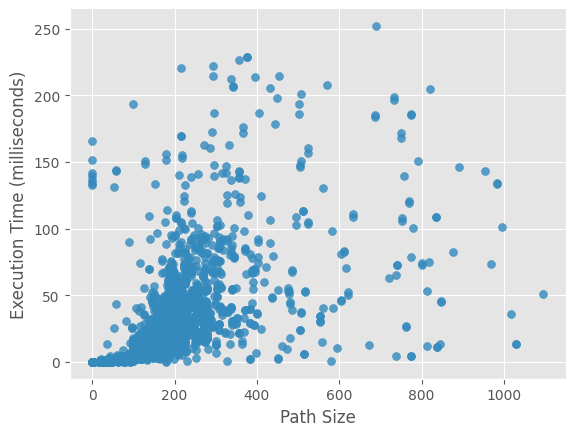

In [17]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Path Size', y='Execution Time (milliseconds)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:966: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:39

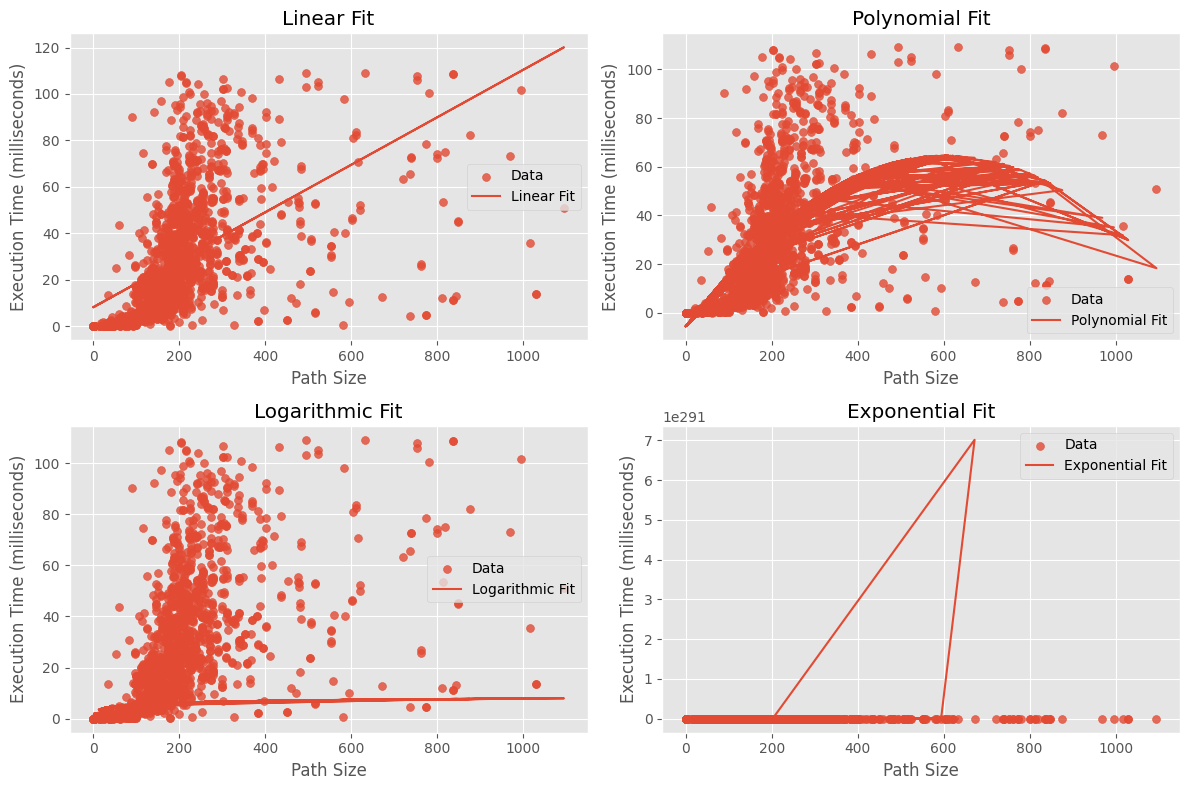

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def plot_curve_fits(df, x_column, y_column):
    # Calculate the first and third quartiles
    Q1 = df[y_column].quantile(0.25)
    Q3 = df[y_column].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the boundaries for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_no_outliers = df[(df[y_column] >= lower_bound) & (df[y_column] <= upper_bound)]

    # Extract x and y data
    x = df_no_outliers[x_column]
    y = df_no_outliers[y_column]

    # Define custom functions for curve fitting
    def linear(x, a, b):
        return a * x + b

    def polynomial(x, a, b, c):
        return a * x**2 + b * x + c

    def logarithmic(x, a, b):
        return a * np.log(x) + b

    def exponential(x, a, b):
        return a * np.exp(b * x)

    # Define initial guesses for the curve fit parameters
    initial_guess_linear = [1, 1]
    initial_guess_poly = [1, 1, 1]
    initial_guess_log = [1, 1]
    initial_guess_exp = [1, 1]

    # Perform curve fitting for each function
    params_linear, _ = curve_fit(linear, x, y, p0=initial_guess_linear)
    params_poly, _ = curve_fit(polynomial, x, y, p0=initial_guess_poly)
    params_log, _ = curve_fit(logarithmic, x, y, p0=initial_guess_log)
    params_exp, _ = curve_fit(exponential, x, y, p0=initial_guess_exp)

    # Set the style
    plt.style.use('ggplot')

    # Create subplots for each type of curve fit
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Linear Fit
    axs[0, 0].scatter(x, y, s=32, alpha=0.8, label='Data')
    axs[0, 0].plot(x, linear(x, *params_linear), label='Linear Fit')
    axs[0, 0].set_title('Linear Fit')
    axs[0, 0].set_xlabel(x_column)
    axs[0, 0].set_ylabel(y_column)
    axs[0, 0].legend()

    # Polynomial Fit
    axs[0, 1].scatter(x, y, s=32, alpha=0.8, label='Data')
    axs[0, 1].plot(x, polynomial(x, *params_poly), label='Polynomial Fit')
    axs[0, 1].set_title('Polynomial Fit')
    axs[0, 1].set_xlabel(x_column)
    axs[0, 1].set_ylabel(y_column)
    axs[0, 1].legend()

    # Logarithmic Fit
    axs[1, 0].scatter(x, y, s=32, alpha=0.8, label='Data')
    axs[1, 0].plot(x, logarithmic(x, *params_log), label='Logarithmic Fit')
    axs[1, 0].set_title('Logarithmic Fit')
    axs[1, 0].set_xlabel(x_column)
    axs[1, 0].set_ylabel(y_column)
    axs[1, 0].legend()

    # Exponential Fit
    axs[1, 1].scatter(x, y, s=32, alpha=0.8, label='Data')
    axs[1, 1].plot(x, exponential(x, *params_exp), label='Exponential Fit')
    axs[1, 1].set_title('Exponential Fit')
    axs[1, 1].set_xlabel(x_column)
    axs[1, 1].set_ylabel(y_column)
    axs[1, 1].legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Assuming df is your DataFrame
plot_curve_fits(df, 'Path Size', 'Execution Time (milliseconds)')


In [19]:
graph_sizes = df['Graph Size'].value_counts()

In [20]:
graph_sizes

Graph Size
194378    1310
352181     333
2255       120
480         10
Name: count, dtype: int64

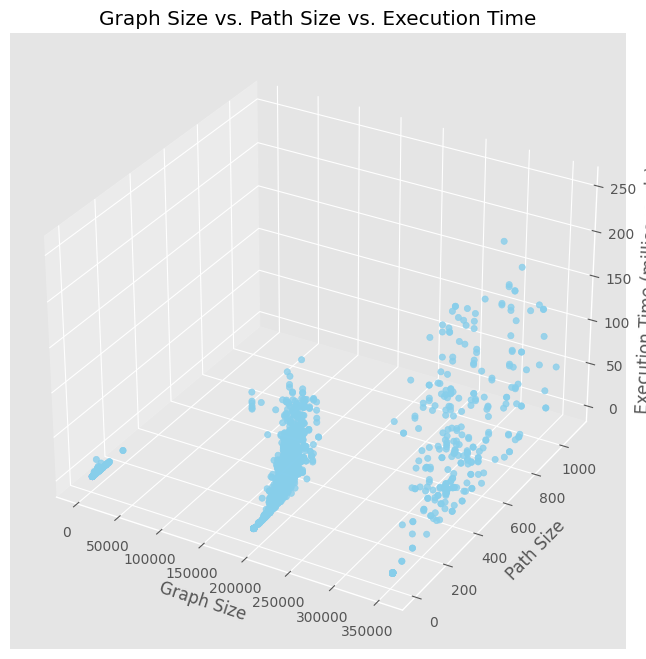

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame containing 'Graph Size', 'Path Size', and 'Execution Time'
graph_sizes = df['Graph Size']
path_sizes = df['Path Size']
execution_times = df['Execution Time (milliseconds)']

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(graph_sizes, path_sizes, execution_times, c='skyblue', marker='o', alpha=0.8)

# Set labels and title
ax.set_xlabel('Graph Size')
ax.set_ylabel('Path Size')
ax.set_zlabel('Execution Time (milliseconds)')
ax.set_title('Graph Size vs. Path Size vs. Execution Time')

# Show plot
plt.show()


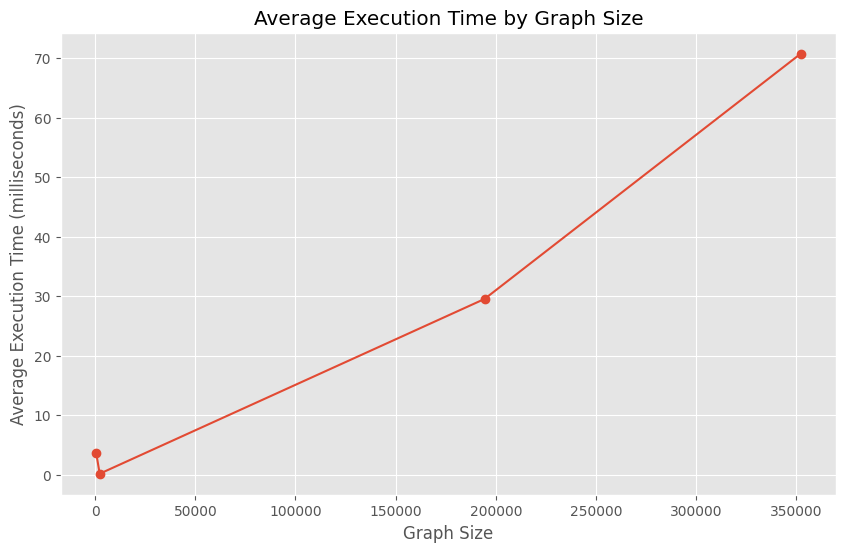

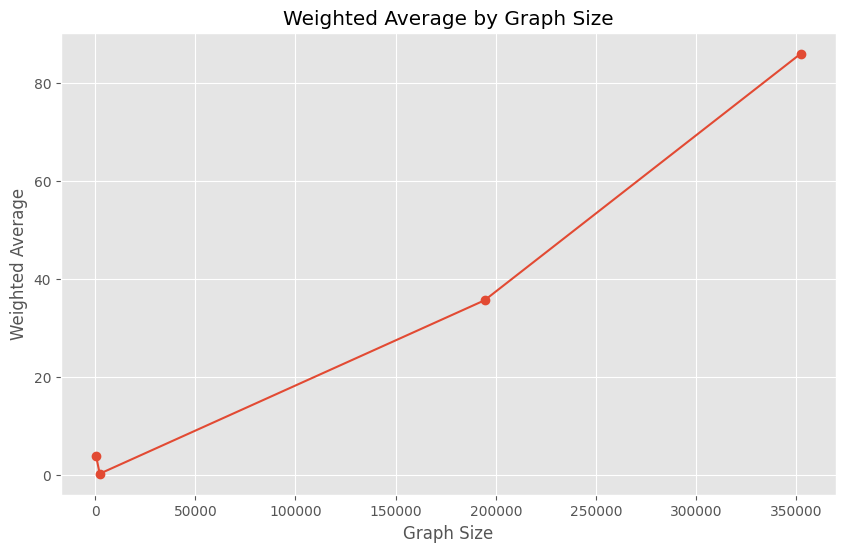

In [22]:

# Calculate the average execution time for each graph size
avg_execution_time = df.groupby('Graph Size')['Execution Time (milliseconds)'].mean()

# Plot average execution time by graph size
plt.figure(figsize=(10, 6))
plt.plot(avg_execution_time.index, avg_execution_time.values, marker='o', linestyle='-')
plt.title('Average Execution Time by Graph Size')
plt.xlabel('Graph Size')
plt.ylabel('Average Execution Time (milliseconds)')
plt.grid(True)
plt.show()

# For the second line graph, let's say you want to calculate a weighted average using path size and execution time
# You can define the weighted average as a combination of path size and execution time, for example:
weighted_avg = df['Path Size'] * df['Execution Time (milliseconds)']

# Group by graph size and calculate the weighted average for each group
weighted_avg_by_graph_size = df.groupby('Graph Size')[['Path Size', 'Execution Time (milliseconds)']].apply(lambda x: (x['Path Size'] * x['Execution Time (milliseconds)']).sum() / x['Path Size'].sum())

# Plot the weighted average by graph size
plt.figure(figsize=(10, 6))
plt.plot(weighted_avg_by_graph_size.index, weighted_avg_by_graph_size.values, marker='o', linestyle='-')
plt.title('Weighted Average by Graph Size')
plt.xlabel('Graph Size')
plt.ylabel('Weighted Average')
plt.grid(True)
plt.show()


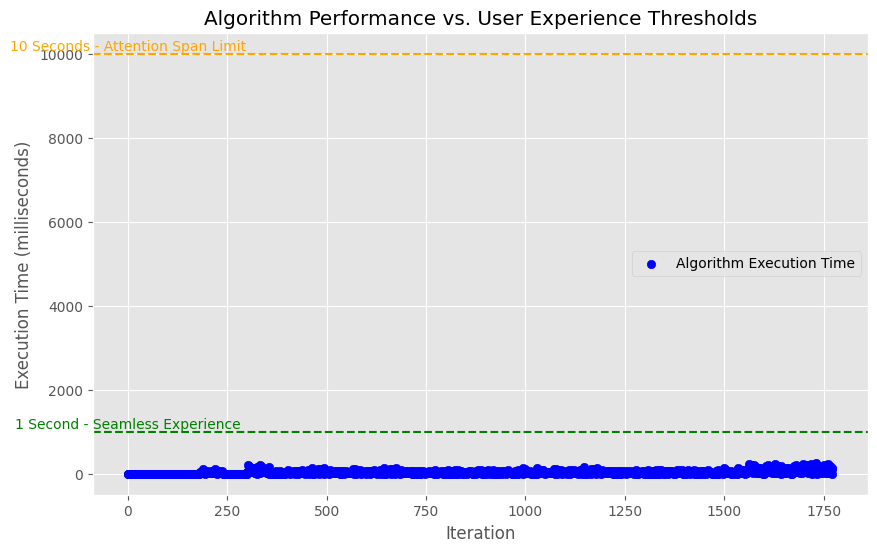

In [23]:


# Define the thresholds in milliseconds
threshold_1_sec = 1000  # Threshold for seamless user experience (1 second)
threshold_10_sec = 10000  # Threshold for keeping user's attention (10 seconds)

# Plot the execution time of your algorithm as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(execution_times)), execution_times, color='blue', marker='o', label='Algorithm Execution Time')

# Plot the thresholds and annotate them
plt.axhline(y=threshold_1_sec, color='green', linestyle='--')
plt.axhline(y=threshold_10_sec, color='orange', linestyle='--')
plt.text(0.5, threshold_1_sec, '1 Second - Seamless Experience', va='bottom', ha='center', color='green')
plt.text(0.5, threshold_10_sec, '10 Seconds - Attention Span Limit', va='bottom', ha='center', color='orange')


# Add labels and title
plt.title('Algorithm Performance vs. User Experience Thresholds')
plt.xlabel('Iteration')
plt.ylabel('Execution Time (milliseconds)')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Select only 'Path Size' and 'Execution Time' columns
selected_columns = df[['Path Size', 'Execution Time (milliseconds)']]

# Save selected columns to an Excel file
selected_columns.to_excel('path_size_execution_time.xlsx', index=False)